# Project Exploratory Data Analysis
- ##### Core Dependencies
- ##### Dataset Inventory Engine
- ##### Dataset Inventory Validation
- ##### Test Execution – Dataset Inventory
- ##### Dataset Inventory Execution
- ##### Dataset Loading Engine
- ##### Dataset Loading Validation
- ##### Test Execution - Dataset Loading Engine
- ##### Dataset Loading Execution
- ##### Data Preview Engine
- ##### Data Preview Engine Validation
- ##### Test Execution - Data Preview Engine
- ##### Data Preview Engine Execution
- ##### Dataset Registry Engine
- ##### Dataset Registry Engine Validation
- ##### Test Execution - Dataset Registry Engine
- ##### Dataset Registry Engine Execution
- ##### Schema Profiling Engine
- ##### Schema Profiling Engine Validation
- ##### Test Execution - Schema Profiling Engine
- ##### Schema Profiling Engine Execution
- ##### Column-Level Description for Each DataFrame

# Core Dependencies

In [177]:
import pandas as pd
import re
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from datetime import datetime
from pathlib import Path
import logging

# Dataset Inventory Engine

In [129]:
class DatasetInventory:
    """
    DatasetInventory

    Responsible for:
    - Locating project root
    - Scanning raw data directory
    - Building dataset metadata inventory
    - Exporting results to CSV inside data/inventory
    """

    def __init__(self, data_folder: str = "data/raw"):
        """
        Initialize inventory builder.

        Parameters
        ----------
        data_folder : str
            Relative path to the raw data directory.
        """
        self.logger = self._configure_logger()
        self.base_dir = self._find_project_root()
        self.data_directory = self.base_dir / data_folder

        self._validate_directory()

    # ==========================================================
    # PRIVATE METHODS
    # ==========================================================

    def _configure_logger(self) -> logging.Logger:
        """Configure logging for the class."""
        logger = logging.getLogger("DatasetInventory")

        if not logger.handlers:
            logger.setLevel(logging.INFO)

            handler = logging.StreamHandler()
            formatter = logging.Formatter(
                "%(asctime)s | %(levelname)s | %(message)s"
            )
            handler.setFormatter(formatter)
            logger.addHandler(handler)

        return logger

    def _find_project_root(self) -> Path:
        """
        Automatically locate project root by searching for 'data' folder.
        Works in notebooks and scripts.
        """
        current_path = Path().resolve()

        while not (current_path / "data").exists() and current_path != current_path.parent:
            current_path = current_path.parent

        self.logger.info(f"Project root located at: {current_path}")
        return current_path

    def _validate_directory(self):
        """Ensure raw data directory exists."""
        if not self.data_directory.exists():
            self.logger.error(f"Data directory not found: {self.data_directory}")
            raise FileNotFoundError(
                f"Directory not found: {self.data_directory}"
            )

        self.logger.info(f"Data directory validated: {self.data_directory}")

    # ==========================================================
    # PUBLIC METHODS
    # ==========================================================

    def build_inventory(self) -> pd.DataFrame:
        """
        Scan folder and build dataset inventory.

        Returns
        -------
        pd.DataFrame
            DataFrame containing metadata of datasets.
        """
        allowed_extensions = [".csv", ".xlsx"]

        files = [
            file for file in self.data_directory.iterdir()
            if file.suffix.lower() in allowed_extensions
        ]

        self.logger.info(f"{len(files)} dataset files found.")

        records = []

        for file in files:
            clean_name = file.stem.split(".", 1)[-1]

            records.append({
                "dataset_name": clean_name,
                "file_name": file.name,
                "extension": file.suffix.lower(),
                "full_path": str(file),
                "file_size_kb": round(file.stat().st_size / 1024, 2)
            })

        df_inventory = pd.DataFrame(records)

        self.logger.info("Dataset inventory successfully built.")
        return df_inventory

    def export_to_csv(
        self,
        df: pd.DataFrame,
        output_filename: str = "dataset_inventory.csv"
    ):
        """
        Export inventory DataFrame to CSV inside:

        project_root/data/inventory/

        Parameters
        ----------
        df : pd.DataFrame
            Inventory DataFrame.
        output_filename : str
            Name of the CSV file.
        """

        # Define export folder
        export_folder = self.base_dir / "data" / "files" / "inventory"

        # Create folder automatically if it does not exist
        export_folder.mkdir(parents=True, exist_ok=True)

        export_path = export_folder / output_filename

        df.to_csv(export_path, index=False)

        self.logger.info(f"Inventory exported to: {export_path}")

# Dataset Inventory Validation

In [130]:
def test_inventory_creation():
    inventory = DatasetInventory()
    df = inventory.build_inventory()

    assert isinstance(df, pd.DataFrame), "Output is not a DataFrame"
    assert not df.empty, "Inventory DataFrame is empty"
    assert "dataset_name" in df.columns, "Missing expected column"

    print("All tests passed successfully!")

# Test Execution – Dataset Inventory

In [131]:
test_inventory_creation()

2026-02-19 10:54:00,139 - INFO - Project root located at: C:\Users\User\Desktop\project-exploratory-data-analysis-framework
2026-02-19 10:54:00,141 - INFO - Data directory validated: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\raw
2026-02-19 10:54:00,144 - INFO - 7 dataset files found.
2026-02-19 10:54:00,148 - INFO - Dataset inventory successfully built.


All tests passed successfully!


# Dataset Inventory Execution

In [132]:
inventory = DatasetInventory()
df_inventory = inventory.build_inventory()
inventory.export_to_csv(df_inventory)
display(df_inventory)

2026-02-19 10:54:04,572 - INFO - Project root located at: C:\Users\User\Desktop\project-exploratory-data-analysis-framework
2026-02-19 10:54:04,574 - INFO - Data directory validated: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\raw
2026-02-19 10:54:04,577 - INFO - 7 dataset files found.
2026-02-19 10:54:04,581 - INFO - Dataset inventory successfully built.
2026-02-19 10:54:04,586 - INFO - Inventory exported to: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\inventory\dataset_inventory.csv


dataset_name                       file_name extension  \
0          sample_dataset           01.sample_dataset.csv      .csv   
1           sales_dataset           02.sales_dataset.xlsx     .xlsx   
2  extra_variable_dataset  03.extra_variable_dataset.xlsx     .xlsx   
3      extra_data_dataset      04.extra_data_dataset.xlsx     .xlsx   
4      fact_sales_dataset       05.fact_sales_dataset.csv      .csv   
5   dim_customers_dataset    06.dim_customers_dataset.csv      .csv   
6    dim_products_dataset     07.dim_products_dataset.csv      .csv   

                                           full_path  file_size_kb  
0  C:\Users\User\Desktop\project-exploratory-data...         97.62  
1  C:\Users\User\Desktop\project-exploratory-data...         84.81  
2  C:\Users\User\Desktop\project-exploratory-data...         32.95  
3  C:\Users\User\Desktop\project-exploratory-data...         10.46  
4  C:\Users\User\Desktop\project-exploratory-data...       3505.06  
5  C:\Users\User\Desktop\project-exploratory-data...       1511.35  
6  C:\Users\User\Desktop\project-exploratory-data...         27.10

#  Dataset Loading Engine

In [148]:
class DatasetLoader:
    """
    DatasetLoader

    Responsible for:
    - Loading datasets dynamically from an inventory DataFrame
    - Supporting CSV and XLSX formats
    - Logging loading process
    """

    def __init__(self, inventory_df: pd.DataFrame):
        """
        Initialize DatasetLoader.

        Parameters
        ----------
        inventory_df : pd.DataFrame
            DataFrame containing dataset metadata with columns:
            - dataset_name
            - full_path
            - extension
        """
        self.logger = self._configure_logger()
        self.inventory_df = inventory_df

        self._validate_inventory()

    # ==========================================================
    # PRIVATE METHODS
    # ==========================================================

    def _configure_logger(self) -> logging.Logger:
        """Configure structured logger."""
        logger = logging.getLogger("DatasetLoader")

        if not logger.handlers:
            logger.setLevel(logging.INFO)
            handler = logging.StreamHandler()
            formatter = logging.Formatter(
                "%(asctime)s | %(levelname)s | %(message)s"
            )
            handler.setFormatter(formatter)
            logger.addHandler(handler)

        return logger

    def _validate_inventory(self):
        """Validate required inventory columns."""
        required_columns = {"dataset_name", "full_path", "extension"}

        if not required_columns.issubset(self.inventory_df.columns):
            missing = required_columns - set(self.inventory_df.columns)
            raise ValueError(f"Missing required inventory columns: {missing}")

        self.logger.info("Inventory validation successful.")

    # ==========================================================
    # PUBLIC METHODS
    # ==========================================================

    def load_datasets(self) -> dict:
        """
        Load all datasets from inventory.

        Returns
        -------
        dict
            Dictionary with dataset_name as key
            and pandas DataFrame as value.
        """
        dfs = {}

        for _, row in self.inventory_df.iterrows():
            dataset_name = row["dataset_name"]
            file_path = row["full_path"]
            extension = row["extension"]

            try:
                if extension == ".csv":
                    dfs[dataset_name] = pd.read_csv(file_path)

                elif extension == ".xlsx":
                    dfs[dataset_name] = pd.read_excel(
                        file_path, engine="openpyxl"
                    )

                self.logger.info(f"Loaded dataset: {dataset_name}")

            except Exception as e:
                self.logger.error(
                    f"Error loading {dataset_name}: {e}"
                )

        self.logger.info("All datasets processed.")
        return dfs

# Dataset Loading Validation

In [149]:
def test_dataset_loader():
    loader = DatasetLoader(df_inventory)
    dfs = loader.load_datasets()

    assert isinstance(dfs, dict), "Output is not a dictionary"
    assert len(dfs) > 0, "No datasets were loaded"

    for name, df in dfs.items():
        assert isinstance(df, pd.DataFrame), f"{name} is not a DataFrame"

    print("DatasetLoader test passed successfully!")

# Test Execution - Dataset Loading Engine

In [150]:
test_dataset_loader()

2026-02-19 11:11:19,128 | INFO | Inventory validation successful.
2026-02-19 11:11:19,142 | INFO | Loaded dataset: sample_dataset
2026-02-19 11:11:19,835 | INFO | Loaded dataset: sales_dataset
2026-02-19 11:11:19,932 | INFO | Loaded dataset: extra_variable_dataset
2026-02-19 11:11:19,961 | INFO | Loaded dataset: extra_data_dataset
2026-02-19 11:11:20,081 | INFO | Loaded dataset: fact_sales_dataset
2026-02-19 11:11:20,140 | INFO | Loaded dataset: dim_customers_dataset
2026-02-19 11:11:20,157 | INFO | Loaded dataset: dim_products_dataset
2026-02-19 11:11:20,159 | INFO | All datasets processed.


DatasetLoader test passed successfully!


# Dataset Loading Execution

In [151]:
loader = DatasetLoader(df_inventory)
loader_dfs = loader.load_datasets()

2026-02-19 11:11:20,758 | INFO | Inventory validation successful.
2026-02-19 11:11:20,768 | INFO | Loaded dataset: sample_dataset
2026-02-19 11:11:21,053 | INFO | Loaded dataset: sales_dataset
2026-02-19 11:11:21,140 | INFO | Loaded dataset: extra_variable_dataset
2026-02-19 11:11:21,172 | INFO | Loaded dataset: extra_data_dataset
2026-02-19 11:11:21,288 | INFO | Loaded dataset: fact_sales_dataset
2026-02-19 11:11:21,369 | INFO | Loaded dataset: dim_customers_dataset
2026-02-19 11:11:21,376 | INFO | Loaded dataset: dim_products_dataset
2026-02-19 11:11:21,377 | INFO | All datasets processed.


# Data Preview Engine

In [152]:
class DatasetPreviewer:
    """
    DatasetPreviewer

    Responsible for:
    - Displaying preview rows from loaded datasets
    - Logging preview operations
    """

    def __init__(self, datasets: dict):
        """
        Parameters
        ----------
        datasets : dict
            Dictionary containing dataset_name -> DataFrame
        """
        self.logger = self._configure_logger()
        self.datasets = datasets

    # ==========================================================
    # PRIVATE METHODS
    # ==========================================================

    def _configure_logger(self) -> logging.Logger:
        logger = logging.getLogger("DatasetPreviewer")

        if not logger.handlers:
            logger.setLevel(logging.INFO)
            handler = logging.StreamHandler()
            formatter = logging.Formatter(
                "%(asctime)s | %(levelname)s | %(message)s"
            )
            handler.setFormatter(formatter)
            logger.addHandler(handler)

        return logger

    # ==========================================================
    # PUBLIC METHODS
    # ==========================================================

    def preview_first_row(self):
        """
        Display the first row of each dataset.
        """
        for dataset_name, df in self.datasets.items():

            if not isinstance(df, pd.DataFrame):
                self.logger.warning(f"{dataset_name} is not a DataFrame.")
                continue

            self.logger.info(f"Previewing dataset: {dataset_name}")

            print("\n")
            print(f"First row of dataset: {dataset_name}")
            display(df.head(1))
            print("\n")

# Data Preview Engine Validation

In [153]:
def test_dataset_previewer():
    previewer = DatasetPreviewer(loader_dfs)
    
    assert isinstance(previewer.datasets, dict), "Datasets is not a dictionary"
    assert len(previewer.datasets) > 0, "No datasets available"

    print("DatasetPreviewer test passed successfully!")

# Test Execution - Data Preview Engine

In [154]:
test_dataset_previewer()

DatasetPreviewer test passed successfully!


# Data Preview Engine Execution

In [155]:
previewer = DatasetPreviewer(loader_dfs)
previewer.preview_first_row()

2026-02-19 11:11:30,953 | INFO | Previewing dataset: sample_dataset




First row of dataset: sample_dataset


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          NaN         10.38           122.8     1001.0           0.1184   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.2776          0.3001               0.1471         0.2419   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33              NaN      2019.0   

  worst smoothness  worst compactness  worst concavity  worst concave points  \
0           0.1622             0.6656           0.7119                0.2654   

   worst symmetry  worst fractal dimension  target  
0          0.4601                   0.1189       0  

[1 rows x 31 columns]

2026-02-19 11:11:30,981 | INFO | Previewing dataset: sales_dataset






First row of dataset: sales_dataset


country  order_value_EUR      cost       date category   customer_name  \
0  Sweden         98320.37  77722.25  8/23/2020    Games  Konopelski LLC   

  sales_manager           sales_rep device_type    order_id  
0  Maxie Marrow  Tarrah Castelletti      Tablet  70-0511466

2026-02-19 11:11:30,996 | INFO | Previewing dataset: extra_variable_dataset






First row of dataset: extra_variable_dataset


order_id  refund
0  70-0511466   43621

2026-02-19 11:11:31,005 | INFO | Previewing dataset: extra_data_dataset






First row of dataset: extra_data_dataset


country  order_value_EUR      cost                 date category  \
0  Sweden         17524.02  14122.61  2020-12-02 00:00:00    Books   

     customer_name sales_manager      sales_rep device_type    order_id  \
0  Goldner-Dibbert  Maxie Marrow  Madelon Bront      Mobile  70-0511466   

   refund  
0    7964

2026-02-19 11:11:31,020 | INFO | Previewing dataset: fact_sales_dataset






First row of dataset: fact_sales_dataset


order_number  product_key  customer_key  order_date shipping_date  \
0      SO54496          282          5400  2013-03-16    2013-03-23   

     due_date  sales_amount  quantity  price  
0  2013-03-28            25         1     25

2026-02-19 11:11:31,035 | INFO | Previewing dataset: dim_customers_dataset






First row of dataset: dim_customers_dataset


customer_key  customer_id customer_number first_name last_name    country  \
0             1        11000      AW00011000        Jon      Yang  Australia   

  marital_status gender   birthdate create_date  
0        Married   Male  1971-10-06  2025-10-06

2026-02-19 11:11:31,052 | INFO | Previewing dataset: dim_products_dataset






First row of dataset: dim_products_dataset


product_key  product_id product_number               product_name  \
0            1         210     FR-R92B-58  HL Road Frame - Black- 58   

  category_id    category  subcategory maintenance  cost product_line  \
0       CO_RF  Components  Road Frames         Yes     0         Road   

   start_date  
0  2003-07-01

# Dataset Registry Engine

In [157]:
class DatasetRegistry:
    """
    DatasetRegistry

    Responsible for:
    - Registering loaded DataFrames
    - Creating a catalog DataFrame of dataset names
    - Exporting registry to CSV
    - Logging registry operations
    """

    def __init__(self, datasets: dict):
        """
        Initialize DatasetRegistry.

        Parameters
        ----------
        datasets : dict
            Dictionary containing dataset_name -> DataFrame
        """
        self.logger = self._configure_logger()
        self.datasets = datasets
        self.base_dir = self._find_project_root()

        self._validate_input()

        # 🔥 Caminho de exportação
        self.export_folder = self.base_dir / "data" / "files" / "dataframes"
        self.export_folder.mkdir(parents=True, exist_ok=True)

        self.logger.info(f"Registry export folder set to: {self.export_folder}")

    # ==========================================================
    # PRIVATE METHODS
    # ==========================================================

    def _configure_logger(self) -> logging.Logger:
        logger = logging.getLogger("DatasetRegistry")

        if not logger.handlers:
            logger.setLevel(logging.INFO)
            handler = logging.StreamHandler()
            formatter = logging.Formatter(
                "%(asctime)s | %(levelname)s | %(message)s"
            )
            handler.setFormatter(formatter)
            logger.addHandler(handler)

        return logger

    def _find_project_root(self) -> Path:
        current_path = Path().resolve()

        while not (current_path / "data").exists() and current_path != current_path.parent:
            current_path = current_path.parent

        self.logger.info(f"Project root located at: {current_path}")
        return current_path

    def _validate_input(self):
        if not isinstance(self.datasets, dict):
            raise TypeError("Datasets must be a dictionary.")

        if len(self.datasets) == 0:
            raise ValueError("Datasets dictionary is empty.")

        self.logger.info("Datasets validated successfully.")

    # ==========================================================
    # PUBLIC METHODS
    # ==========================================================

    def build_registry(self) -> pd.DataFrame:
        """
        Create a registry DataFrame listing loaded DataFrames.

        Returns
        -------
        pd.DataFrame
            DataFrame containing dataset names.
        """
        registry_df = pd.DataFrame({
            "dataframe_name": list(self.datasets.keys())
        })

        self.logger.info("Dataset registry successfully created.")
        return registry_df

    def export_to_csv(self, filename: str = "dataset_registry.csv") -> pd.DataFrame:
        """
        Export registry DataFrame to CSV.

        Parameters
        ----------
        filename : str
            Name of the CSV file.

        Returns
        -------
        pd.DataFrame
            Exported registry DataFrame.
        """
        registry_df = self.build_registry()

        export_path = self.export_folder / filename
        registry_df.to_csv(export_path, index=False)

        self.logger.info(f"Dataset registry exported to: {export_path}")

        return registry_df

# Dataset Registry Engine Validation

In [161]:
def test_dataset_registry():
    """
    Unit test for DatasetRegistry.

    Validates:
    - Correct instantiation
    - Output type
    - Expected columns
    - Registry size consistency
    - CSV file creation
    """

    # Arrange (mock datasets)
    mock_datasets = {
        "dataset_a": pd.DataFrame({"col1": [1, 2]}),
        "dataset_b": pd.DataFrame({"col2": [3, 4]})
    }

    registry = DatasetRegistry(mock_datasets)

    # Act
    registry_df = registry.export_to_csv("test_registry.csv")

    # Assert - tipo de retorno
    assert isinstance(registry_df, pd.DataFrame), "Output is not a DataFrame"

    # Assert - coluna esperada
    assert "dataframe_name" in registry_df.columns, "Missing dataframe_name column"

    # Assert - tamanho consistente
    assert len(registry_df) == len(mock_datasets), "Registry size mismatch"

    # Assert - arquivo criado
    expected_file = registry.export_folder / "test_registry.csv"
    assert expected_file.exists(), "CSV file was not created"

    print("DatasetRegistry test passed successfully!")

# Test Execution - Dataset Registry Engine

In [162]:
test_dataset_registry()

2026-02-19 11:16:42,001 | INFO | Project root located at: C:\Users\User\Desktop\project-exploratory-data-analysis-framework
2026-02-19 11:16:42,002 | INFO | Datasets validated successfully.
2026-02-19 11:16:42,004 | INFO | Registry export folder set to: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\dataframes
2026-02-19 11:16:42,006 | INFO | Dataset registry successfully created.
2026-02-19 11:16:42,011 | INFO | Dataset registry exported to: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\dataframes\test_registry.csv


DatasetRegistry test passed successfully!


# Dataset Registry Engine Execution

In [159]:
registry = DatasetRegistry(loader_dfs)
registry_df = registry.export_to_csv()

2026-02-19 11:14:51,973 | INFO | Project root located at: C:\Users\User\Desktop\project-exploratory-data-analysis-framework
2026-02-19 11:14:51,975 | INFO | Datasets validated successfully.
2026-02-19 11:14:51,977 | INFO | Registry export folder set to: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\dataframes
2026-02-19 11:14:51,979 | INFO | Dataset registry successfully created.
2026-02-19 11:14:51,984 | INFO | Dataset registry exported to: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\dataframes\dataset_registry.csv


# Schema Profiling Engine

In [93]:
class DatasetSchemaProfiler:
    """
    DatasetSchemaProfiler

    Responsible for:
    - Extracting schema (dataset_name + column_name + dtype)
    - Saving schema files inside:
      project_root/data/files/schemas
    """

    def __init__(self, datasets: dict):
        """
        Parameters
        ----------
        datasets : dict
            Dictionary with dataset_name -> DataFrame
        """
        self.logger = self._configure_logger()
        self.datasets = datasets
        self.base_dir = self._find_project_root()

        # Export folder
        self.export_folder = self.base_dir / "data" / "files" / "schemas"
        self.export_folder.mkdir(parents=True, exist_ok=True)

        self.logger.info(f"Export folder set to: {self.export_folder}")

    # ==========================================================
    # PRIVATE METHODS
    # ==========================================================

    def _configure_logger(self) -> logging.Logger:
        logger = logging.getLogger("DatasetSchemaProfiler")

        if not logger.handlers:
            logger.setLevel(logging.INFO)
            handler = logging.StreamHandler()
            formatter = logging.Formatter(
                "%(asctime)s | %(levelname)s | %(message)s"
            )
            handler.setFormatter(formatter)
            logger.addHandler(handler)

        return logger

    def _find_project_root(self) -> Path:
        current_path = Path().resolve()

        while not (current_path / "data").exists() and current_path != current_path.parent:
            current_path = current_path.parent

        self.logger.info(f"Project root located at: {current_path}")
        return current_path

    # ==========================================================
    # PUBLIC METHODS
    # ==========================================================

    def build_schema(self, dataset_name: str, df: pd.DataFrame) -> pd.DataFrame:
        """
        Create schema DataFrame including dataset_name.

        Returns
        -------
        pd.DataFrame
            DataFrame with dataset_name, column_name and data_type.
        """
        schema_df = pd.DataFrame({
            "dataset_name": dataset_name,
            "column_name": df.columns,
            "data_type": df.dtypes.astype(str).values
        })

        return schema_df

    def export_all_schemas(self) -> dict:
        """
        Generate schema CSV for each dataset and save to:
        project_root/data/files/schemas
        """
        schema_results = {}

        for dataset_name, df in self.datasets.items():

            schema_df = self.build_schema(dataset_name, df)

            output_path = self.export_folder / f"{dataset_name}_schema.csv"
            schema_df.to_csv(output_path, index=False)

            self.logger.info(f"Schema exported to: {output_path}")

            schema_results[dataset_name] = schema_df

        self.logger.info("All schemas exported successfully.")
        return schema_results

# Schema Profiling Engine Validation

In [97]:
def test_dataset_schema_profiler():
    """
    Unit test for DatasetSchemaProfiler.

    Validates:
    - Correct return type
    - Expected schema structure
    - Correct number of rows
    - CSV file creation
    """

    # 🔹 Arrange (mock dataset)
    mock_datasets = {
        "test_dataset": pd.DataFrame({
            "col1": [1, 2],
            "col2": ["a", "b"]
        })
    }

    profiler = DatasetSchemaProfiler(mock_datasets)

    # Act
    schemas = profiler.export_all_schemas()

    # Assert - return type
    assert isinstance(schemas, dict), "Output is not a dictionary"

    # Assert - DataFrame existence
    assert "test_dataset" in schemas, "Dataset key missing"

    schema_df = schemas["test_dataset"]

    assert isinstance(schema_df, pd.DataFrame), "Schema is not a DataFrame"

    # Assert - expected columns
    expected_columns = {"dataset_name", "column_name", "data_type"}
    assert expected_columns.issubset(schema_df.columns), "Missing expected schema columns"

    # Assert - number of rows equals number of columns in dataset
    assert len(schema_df) == len(mock_datasets["test_dataset"].columns), \
        "Schema row count does not match dataset column count"

    # Assert - CSV file creation
    expected_file = profiler.export_folder / "test_dataset_schema.csv"
    assert expected_file.exists(), "Schema CSV file was not created"

    print("DatasetSchemaProfiler test passed successfully!")

# Test Execution - Schema Profiling Engine

In [98]:
test_schema_profiler()

2026-02-19 10:24:01,269 | INFO | Project root located at: C:\Users\User\Desktop\project-exploratory-data-analysis-framework
2026-02-19 10:24:01,271 | INFO | Export folder set to: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\schemas
2026-02-19 10:24:01,277 | INFO | Schema exported to: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\schemas\sample_dataset_schema.csv
2026-02-19 10:24:01,283 | INFO | Schema exported to: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\schemas\sales_dataset_schema.csv
2026-02-19 10:24:01,287 | INFO | Schema exported to: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\schemas\extra_variable_dataset_schema.csv
2026-02-19 10:24:01,291 | INFO | Schema exported to: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\schemas\extra_data_dataset_schema.csv
2026-02-19 10:24:01,296 | INFO | Schema exported to: C:\Users\User\De

SchemaProfiler test passed successfully!


# Schema Profiling Engine Execution

In [163]:
schema_profiler = DatasetSchemaProfiler(loader_dfs)
schemas = schema_profiler.export_all_schemas()

2026-02-19 11:16:59,540 | INFO | Project root located at: C:\Users\User\Desktop\project-exploratory-data-analysis-framework
2026-02-19 11:16:59,543 | INFO | Export folder set to: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\schemas
2026-02-19 11:16:59,548 | INFO | Schema exported to: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\schemas\sample_dataset_schema.csv
2026-02-19 11:16:59,553 | INFO | Schema exported to: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\schemas\sales_dataset_schema.csv
2026-02-19 11:16:59,557 | INFO | Schema exported to: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\schemas\extra_variable_dataset_schema.csv
2026-02-19 11:16:59,562 | INFO | Schema exported to: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\schemas\extra_data_dataset_schema.csv
2026-02-19 11:16:59,566 | INFO | Schema exported to: C:\Users\User\De

# Column-Level Description for Each DataFrame

# Dataset: sample
## Medidas mean (média)

- mean radius: Tamanho médio do núcleo.
- mean texture: Variação da cor (irregularidade visual).
- mean perimeter: Comprimento médio da borda.
- mean area: Área média do núcleo.
- mean smoothness: Regularidade da superfície.
- mean compactness: Grau de irregularidade da forma.
- mean concavity: Nível de “entradas” na borda.
- mean concave points: Quantidade de pontos côncavos.
- mean symmetry: Nível de simetria.
- mean fractal dimension: Complexidade da borda.
## Medidas error (variação)
- Mostram o quanto cada medida varia entre as células.
- radius error: Variação do tamanho.
- texture error: Variação da textura.
- perimeter error: Variação do perímetro.
- area error: Variação da área.
- smoothness error: Variação da suavidade.
- compactness error: Variação da compactação.
- concavity error: Variação da concavidade.
- concave points error: Variação dos pontos côncavos.
- symmetry error: Variação da simetria.
- fractal dimension error: Variação da complexidade.
## Medidas worst (pior valor observado)
- Maior valor encontrado em cada característica.
- worst radius: Maior tamanho.
- worst texture: Maior irregularidade.
- worst perimeter: Maior perímetro.
- worst area: Maior área.
- worst smoothness: Maior irregularidade de superfície.
- worst compactness: Maior irregularidade de forma.
- worst concavity: Maior concavidade.
- worst concave points: Maior número de pontos côncavos.
- worst symmetry: Maior assimetria.
- worst fractal dimension: Maior complexidade da borda.

## target
- 0: Benigno
- 1: Maligno

# Dataset: sales

## Dataset transacional de vendas.

- Coluna: Significado
- country: País do cliente
- order_value_EUR: Valor total do pedido em euros
- cost: Custo da venda (⚠️ está como object, deveria ser float)
- date: Data da venda
- category: Categoria do produto
- customer_name: Nome do cliente
- sales_manager: Gerente responsável
- sales_rep: Representante comercial
- device_type: Dispositivo usado na compra
- order_id: dentificador único do pedido

# Dataset: extra_variable
- Coluna:	Significado
- order_id:	Chave de ligação
- refund:	Valor reembolsado ao cliente
###### Complementa o dataset sales.

# Dataset: extra_data

Este dataset já é uma versão enriquecida do sales.

- Coluna: Significado
- country: País
- order_value_EUR: Valor do pedido
- cost: Custo da venda
- date: Data
- category: Categoria
- customer_name: Cliente
- sales_manager: Gerente
- sales_rep: Representante
- device_type: Dispositivo
- order_id	ID do pedido
- refund:	Reembolso

###### É praticamente o sales já consolidado com extra_variable.

# Dataset: fact_sales

###### Tabela Fato (Modelo Star Schema – Data Warehouse)

Representa fatos de vendas.

- Coluna: Significado
- order_number: Número do pedido
- product_key: Chave estrangeira do produto
- customer_key: Chave estrangeira do cliente
- order_date: Data do pedido
- shipping_date: Data de envio
- due_date: Data prevista de entrega
- sales_amount: Valor total da venda
- quantity: Quantidade vendida
- price: Preço unitário

###### Esta é a tabela central do modelo dimensional.

# Dataset: dim_customers

###### Dimensão Cliente

- Coluna: Significado
- customer_key: Chave substituta (Primary Key)
- customer_id: ID original do sistema
- customer_number: Código do cliente
- first_name: Primeiro nome
- last_name: Sobrenome
- country: País
- marital_status: Estado civil
- gender: Gênero
- birthdate: Data de nascimento
- create_date: Data de cadastro

###### Usado para análises demográficas.

# Dataset: dim_products

###### Dimensão Produto

- Coluna: Significado
- product_key: Chave substituta
- product_id: ID original
- product_number: Código do produto
- product_name: Nome do produto
- category_id: ID da categoria
- category: Categoria do produto
- subcategory: Subcategoria
- maintenance: Tipo de manutenção
- cost: Custo do produto
- product_line: Linha de produto
- start_date: Data de início de comercialização

# Dataset Shape Inspection Engine

In [109]:
class DatasetShapeInspector:
    """
    DatasetShapeInspector

    Responsible for:
    - Inspecting dataset shapes
    - Logging inspection operations
    - Exporting shape report to CSV
    """

    def __init__(self, datasets: dict):
        """
        Parameters
        ----------
        datasets : dict
            Dictionary containing dataset_name -> DataFrame
        """
        self.logger = self._configure_logger()
        self.datasets = datasets
        self.base_dir = self._find_project_root()
        self._validate_input()

        # 🔥 Caminho de exportação
        self.export_folder = self.base_dir / "data" / "files" / "shape"
        self.export_folder.mkdir(parents=True, exist_ok=True)

        self.logger.info(f"Shape export folder set to: {self.export_folder}")

    # ==========================================================
    # PRIVATE METHODS
    # ==========================================================

    def _configure_logger(self) -> logging.Logger:
        logger = logging.getLogger("DatasetShapeInspector")

        if not logger.handlers:
            logger.setLevel(logging.INFO)
            handler = logging.StreamHandler()
            formatter = logging.Formatter(
                "%(asctime)s | %(levelname)s | %(message)s"
            )
            handler.setFormatter(formatter)
            logger.addHandler(handler)

        return logger

    def _find_project_root(self) -> Path:
        current_path = Path().resolve()

        while not (current_path / "data").exists() and current_path != current_path.parent:
            current_path = current_path.parent

        self.logger.info(f"Project root located at: {current_path}")
        return current_path

    def _validate_input(self):
        if not isinstance(self.datasets, dict):
            raise TypeError("Datasets must be a dictionary.")

        if len(self.datasets) == 0:
            raise ValueError("Datasets dictionary is empty.")

        self.logger.info("Datasets validated successfully.")

    # ==========================================================
    # PUBLIC METHODS
    # ==========================================================

    def inspect_and_export_shapes(self) -> pd.DataFrame:
        """
        Inspect dataset shapes and export results to CSV.

        Returns
        -------
        pd.DataFrame
            DataFrame containing dataset_name, rows and columns.
        """
        results = []

        for name, df in self.datasets.items():

            if not isinstance(df, pd.DataFrame):
                self.logger.warning(f"{name} is not a DataFrame. Skipping.")
                continue

            rows, cols = df.shape

            self.logger.info(f"Dataset: {name} | Rows: {rows} | Columns: {cols}")

            results.append({
                "dataset_name": name,
                "rows": rows,
                "columns": cols
            })

        shape_df = pd.DataFrame(results)

        # 🔥 Exportar CSV
        export_path = self.export_folder / "datasets_shape_report.csv"
        shape_df.to_csv(export_path, index=False)

        self.logger.info(f"Shape report exported to: {export_path}")

        return shape_df

# Dataset Shape Inspection Engine Validation

In [113]:
def test_dataset_shape_inspector():
    """
    Unit test for DatasetShapeInspector.

    Validates:
    - Return type
    - Expected columns
    - Correct row count
    - Correct shape values
    - CSV file creation
    """

    # Arrange (mock dataset)
    mock_datasets = {
        "dataset_a": pd.DataFrame({"col1": [1, 2, 3]}),
        "dataset_b": pd.DataFrame({
            "col2": [4, 5],
            "col3": [6, 7]
        })
    }

    inspector = DatasetShapeInspector(mock_datasets)

    # Act
    result_df = inspector.inspect_and_export_shapes()

    # Assert - tipo de retorno
    assert isinstance(result_df, pd.DataFrame), "Output is not a DataFrame"

    # Assert - colunas esperadas
    expected_columns = {"dataset_name", "rows", "columns"}
    assert expected_columns.issubset(result_df.columns), "Missing expected columns"

    # Assert - número de datasets
    assert len(result_df) == len(mock_datasets), "Dataset count mismatch"

    # Assert - valores corretos
    row_a = result_df[result_df["dataset_name"] == "dataset_a"].iloc[0]
    assert row_a["rows"] == 3, "Incorrect row count for dataset_a"
    assert row_a["columns"] == 1, "Incorrect column count for dataset_a"

    # Assert - CSV criado
    expected_file = inspector.export_folder / "datasets_shape_report.csv"
    assert expected_file.exists(), "Shape report CSV was not created"

    print("DatasetShapeInspector test passed successfully!")

# Test Execution - Dataset Shape Inspection Engine

In [114]:
test_dataset_shape_inspector()

2026-02-19 10:35:17,854 | INFO | Project root located at: C:\Users\User\Desktop\project-exploratory-data-analysis-framework
2026-02-19 10:35:17,855 | INFO | Datasets validated successfully.
2026-02-19 10:35:17,858 | INFO | Shape export folder set to: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\shape
2026-02-19 10:35:17,860 | INFO | Dataset: dataset_a | Rows: 3 | Columns: 1
2026-02-19 10:35:17,861 | INFO | Dataset: dataset_b | Rows: 2 | Columns: 2
2026-02-19 10:35:17,866 | INFO | Shape report exported to: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\shape\datasets_shape_report.csv


DatasetShapeInspector test passed successfully!


# Dataset Shape Inspection Engine Execution

In [164]:
shape_inspector = DatasetShapeInspector(loader_dfs)
shape_df = shape_inspector.inspect_and_export_shapes()

2026-02-19 11:17:43,095 | INFO | Project root located at: C:\Users\User\Desktop\project-exploratory-data-analysis-framework
2026-02-19 11:17:43,097 | INFO | Datasets validated successfully.
2026-02-19 11:17:43,100 | INFO | Shape export folder set to: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\shape
2026-02-19 11:17:43,102 | INFO | Dataset: sample_dataset | Rows: 569 | Columns: 31
2026-02-19 11:17:43,103 | INFO | Dataset: sales_dataset | Rows: 1000 | Columns: 10
2026-02-19 11:17:43,105 | INFO | Dataset: extra_variable_dataset | Rows: 1000 | Columns: 2
2026-02-19 11:17:43,107 | INFO | Dataset: extra_data_dataset | Rows: 10 | Columns: 11
2026-02-19 11:17:43,109 | INFO | Dataset: fact_sales_dataset | Rows: 60398 | Columns: 9
2026-02-19 11:17:43,111 | INFO | Dataset: dim_customers_dataset | Rows: 18484 | Columns: 10
2026-02-19 11:17:43,112 | INFO | Dataset: dim_products_dataset | Rows: 295 | Columns: 11
2026-02-19 11:17:43,118 | INFO | Shape report exported

In [125]:
class DatasetInfoProfiler:
    """
    DatasetInfoProfiler

    Responsible for:
    - Extracting structured df.info() metadata
    - Exporting two CSVs per dataset:
        1) Column-level structure
        2) Dataset-level metadata
    """

    def __init__(self, datasets: dict):
        self.logger = self._configure_logger()
        self.datasets = datasets
        self.base_dir = self._find_project_root()

        self.export_folder = self.base_dir / "data" / "files" / "info"
        self.export_folder.mkdir(parents=True, exist_ok=True)

        self._validate_input()

        self.logger.info(f"Info export folder set to: {self.export_folder}")

    # ==========================================================
    # PRIVATE METHODS
    # ==========================================================

    def _configure_logger(self) -> logging.Logger:
        logger = logging.getLogger("DatasetInfoProfiler")

        if not logger.handlers:
            logger.setLevel(logging.INFO)
            handler = logging.StreamHandler()
            formatter = logging.Formatter(
                "%(asctime)s | %(levelname)s | %(message)s"
            )
            handler.setFormatter(formatter)
            logger.addHandler(handler)

        return logger

    def _find_project_root(self) -> Path:
        current_path = Path().resolve()

        while not (current_path / "data").exists() and current_path != current_path.parent:
            current_path = current_path.parent

        self.logger.info(f"Project root located at: {current_path}")
        return current_path

    def _validate_input(self):
        if not isinstance(self.datasets, dict):
            raise TypeError("Datasets must be a dictionary.")

        if len(self.datasets) == 0:
            raise ValueError("Datasets dictionary is empty.")

        self.logger.info("Datasets validated successfully.")

    # ==========================================================
    # PUBLIC METHODS
    # ==========================================================

    def build_column_info(self, df: pd.DataFrame) -> pd.DataFrame:
        """
        Build column-level structure DataFrame.
        """
        return pd.DataFrame({
            "#": range(len(df.columns)),
            "Column": df.columns,
            "Non-Null Count": df.notnull().sum().values,
            "Dtype": df.dtypes.astype(str).values
        })

    def build_dataset_metadata(self, df: pd.DataFrame) -> pd.DataFrame:
        """
        Build dataset-level metadata DataFrame.
        """

        range_index = (
            f"{df.index.start} to {df.index.stop - 1}"
            if isinstance(df.index, pd.RangeIndex)
            else "Custom Index"
        )

        total_rows = df.shape[0]
        total_columns = df.shape[1]
        dtype_summary = str(df.dtypes.value_counts().to_dict())
        memory_usage_mb = round(df.memory_usage(deep=True).sum() / (1024 ** 2), 4)

        return pd.DataFrame([{
            "RangeIndex": range_index,
            "Total Rows": total_rows,
            "Total Columns": total_columns,
            "Dtype Summary": dtype_summary,
            "Memory Usage (MB)": memory_usage_mb
        }])

    def export_all_infos(self) -> dict:
        """
        Export two CSV files per dataset:
        - *_columns_info.csv
        - *_metadata_info.csv
        """
        results = {}

        for dataset_name, df in self.datasets.items():

            if not isinstance(df, pd.DataFrame):
                self.logger.warning(f"{dataset_name} is not a DataFrame. Skipping.")
                continue

            # Build reports
            column_info_df = self.build_column_info(df)
            metadata_df = self.build_dataset_metadata(df)

            # Export paths
            column_path = self.export_folder / f"{dataset_name}_columns_info.csv"
            metadata_path = self.export_folder / f"{dataset_name}_metadata_info.csv"

            # Export CSVs
            column_info_df.to_csv(column_path, index=False)
            metadata_df.to_csv(metadata_path, index=False)

            self.logger.info(f"Column info exported: {column_path}")
            self.logger.info(f"Metadata info exported: {metadata_path}")

            results[dataset_name] = {
                "columns_info": column_info_df,
                "metadata_info": metadata_df
            }

        self.logger.info("All dataset info reports exported successfully.")
        return results

In [165]:
info_profiler = DatasetInfoProfiler(loader_dfs)
info_results = info_profiler.export_all_infos()

2026-02-19 11:17:57,884 | INFO | Project root located at: C:\Users\User\Desktop\project-exploratory-data-analysis-framework
2026-02-19 11:17:57,888 | INFO | Datasets validated successfully.
2026-02-19 11:17:57,889 | INFO | Info export folder set to: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\info
2026-02-19 11:17:57,903 | INFO | Column info exported: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\info\sample_dataset_columns_info.csv
2026-02-19 11:17:57,905 | INFO | Metadata info exported: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\info\sample_dataset_metadata_info.csv
2026-02-19 11:17:57,920 | INFO | Column info exported: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\info\sales_dataset_columns_info.csv
2026-02-19 11:17:57,922 | INFO | Metadata info exported: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\info\sales_dataset_metada

# DataFrames Transformations

# Mixed Data Type

# Date Column Profiling Engine

In [174]:
class DateColumnProfiler:
    """
    DateColumnProfiler

    Responsible for:
    - Identifying columns containing 'date'
    - Extracting dataset_name, column_name and dtype
    - Exporting results with sequential versioning
    """

    def __init__(self, datasets: dict):
        self.logger = self._configure_logger()
        self.datasets = datasets
        self.base_dir = self._find_project_root()

        self.export_folder = self.base_dir / "data" / "files" / "date_columns"
        self.export_folder.mkdir(parents=True, exist_ok=True)

        self._validate_input()

        self.logger.info(f"Date columns export folder set to: {self.export_folder}")

    # ==========================================================
    # PRIVATE METHODS
    # ==========================================================

    def _configure_logger(self):
        logger = logging.getLogger("DateColumnProfiler")

        if not logger.handlers:
            logger.setLevel(logging.INFO)
            handler = logging.StreamHandler()
            formatter = logging.Formatter(
                "%(asctime)s | %(levelname)s | %(message)s"
            )
            handler.setFormatter(formatter)
            logger.addHandler(handler)

        return logger

    def _find_project_root(self):
        current_path = Path().resolve()

        while not (current_path / "data").exists() and current_path != current_path.parent:
            current_path = current_path.parent

        self.logger.info(f"Project root located at: {current_path}")
        return current_path

    def _validate_input(self):
        if not isinstance(self.datasets, dict):
            raise TypeError("Datasets must be a dictionary.")

        if len(self.datasets) == 0:
            raise ValueError("Datasets dictionary is empty.")

        self.logger.info("Datasets validated successfully.")

    def _get_next_version_filename(self) -> Path:
        """
        Generate next sequential filename like:
        date_columns_report_01.csv
        date_columns_report_02.csv
        """

        existing_files = list(self.export_folder.glob("date_columns_report_*.csv"))

        if not existing_files:
            next_version = 1
        else:
            versions = []
            pattern = re.compile(r"date_columns_report_(\d+)\.csv")

            for file in existing_files:
                match = pattern.search(file.name)
                if match:
                    versions.append(int(match.group(1)))

            next_version = max(versions) + 1 if versions else 1

        filename = f"date_columns_report_{next_version:02d}.csv"
        return self.export_folder / filename

    # ==========================================================
    # PUBLIC METHODS
    # ==========================================================

    def extract_date_columns(self) -> pd.DataFrame:
        results = []

        for dataset_name, df in self.datasets.items():

            if not isinstance(df, pd.DataFrame):
                self.logger.warning(f"{dataset_name} is not a DataFrame. Skipping.")
                continue

            date_columns = [
                col for col in df.columns
                if "date" in col.lower()
            ]

            for col in date_columns:
                results.append({
                    "dataset_name": dataset_name,
                    "column_name": col,
                    "dtype": str(df[col].dtype)
                })

        return pd.DataFrame(results)

    def export_to_csv(self) -> pd.DataFrame:
        """
        Export date column report with automatic sequential versioning.
        """

        result_df = self.extract_date_columns()

        output_path = self._get_next_version_filename()
        result_df.to_csv(output_path, index=False)

        self.logger.info(f"Date columns report exported to: {output_path}")

        return result_df

# Date Column Profiling Engine Validation

In [181]:
def test_date_column_profiler():
    """
    Unit test for DateColumnProfiler.

    Validates:
    - Output type
    - Correct column extraction
    - Case-insensitive filtering
    - Sequential file generation
    - CSV file creation
    """

    import os

    #  Arrange – mock datasets
    mock_datasets = {
        "dataset_a": pd.DataFrame({
            "order_date": ["2024-01-01", "2024-01-02"],
            "amount": [100, 200],
         "shipDate": ["2024-01-03", "2024-01-04"]
        }),
        "dataset_b": pd.DataFrame({
            "user_id": [1, 2],
            "birth_date": ["1990-01-01", "1992-02-02"],
            "name": ["Ana", "João"]
        })
    }

    profiler = DateColumnProfiler(mock_datasets)

    # Act
    result_df = profiler.export_to_csv()

    # Assert – tipo de retorno
    assert isinstance(result_df, pd.DataFrame), "Output is not a DataFrame"

    # Assert – colunas esperadas
    expected_columns = {"dataset_name", "column_name", "dtype"}
    assert expected_columns.issubset(result_df.columns), "Missing expected columns"

    # Assert – colunas detectadas corretamente
    extracted_columns = set(result_df["column_name"])
    expected_detected = {"order_date", "shipDate", "birth_date"}
    assert extracted_columns == expected_detected, "Date column detection failed"

    # Assert – arquivo criado
    generated_files = list(profiler.export_folder.glob("date_columns_report_*.csv"))
    assert len(generated_files) >= 1, "CSV file was not generated"

    # Assert – versionamento sequencial funcionando
    versions = [
        int(file.stem.split("_")[-1])
        for file in generated_files
    ]
    assert max(versions) >= 1, "Sequential versioning failed"

    print("DateColumnProfiler test passed successfully!")

# Test Execution - Date Column Profiling Engine

In [182]:
test_date_column_profiler()

2026-02-19 11:29:38,382 | INFO | Project root located at: C:\Users\User\Desktop\project-exploratory-data-analysis-framework
2026-02-19 11:29:38,385 | INFO | Datasets validated successfully.
2026-02-19 11:29:38,386 | INFO | Date columns export folder set to: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\date_columns
2026-02-19 11:29:38,393 | INFO | Date columns report exported to: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\date_columns\date_columns_report_03.csv


DateColumnProfiler test passed successfully!


# Date Column Profiling Engine Execution

In [175]:
date_profiler = DateColumnProfiler(loader_dfs)
date_columns_df = date_profiler.export_to_csv()

2026-02-19 11:25:28,537 | INFO | Project root located at: C:\Users\User\Desktop\project-exploratory-data-analysis-framework
2026-02-19 11:25:28,540 | INFO | Datasets validated successfully.
2026-02-19 11:25:28,541 | INFO | Date columns export folder set to: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\date_columns
2026-02-19 11:25:28,548 | INFO | Date columns report exported to: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\date_columns\date_columns_report_01.csv


# Date Type Converter Engine

In [187]:
class DateTypeConverter:
    """
    DateTypeConverter

    Responsible for:
    - Identifying object columns containing 'date'
    - Converting them to datetime64[ns]
    - Returning a new transformed dictionary (immutable input)
    """

    def __init__(self, loader_dfs: dict):
        """
        Parameters
        ----------
        loader_dfs : dict
            Dictionary containing dataset_name -> DataFrame
        """
        self.logger = self._configure_logger()
        self.loader_dfs = loader_dfs
        self._validate_input()

    # ==========================================================
    # PRIVATE METHODS
    # ==========================================================

    def _configure_logger(self):
        logger = logging.getLogger("DateTypeConverter")

        if not logger.handlers:
            logger.setLevel(logging.INFO)
            handler = logging.StreamHandler()
            formatter = logging.Formatter(
                "%(asctime)s | %(levelname)s | %(message)s"
            )
            handler.setFormatter(formatter)
            logger.addHandler(handler)

        return logger

    def _validate_input(self):
        if not isinstance(self.loader_dfs, dict):
            raise TypeError("Input must be a dictionary of DataFrames.")

        if len(self.loader_dfs) == 0:
            raise ValueError("Input dictionary is empty.")

        self.logger.info("Input datasets validated successfully.")

    # ==========================================================
    # PUBLIC METHODS
    # ==========================================================

    def transform(self) -> dict:
        """
        Convert object columns containing 'date'
        to datetime64[ns] in a NEW dictionary.

        Returns
        -------
        dict
            New transformed dictionary.
        """

        # Deep copy to avoid mutating original
        transformed_dfs = {
            name: df.copy(deep=True)
            for name, df in self.loader_dfs.items()
        }

        for dataset_name, df in transformed_dfs.items():

            if not isinstance(df, pd.DataFrame):
                self.logger.warning(f"{dataset_name} is not a DataFrame. Skipping.")
                continue

            for col in df.columns:

                if (
                    "date" in col.lower()
                    and df[col].dtype == "object"
                ):
                    self.logger.info(
                        f"Converting '{col}' in '{dataset_name}' to datetime64[ns]"
                    )

                    df[col] = pd.to_datetime(df[col], errors="coerce")

        self.logger.info("Date conversion completed successfully.")

        return transformed_dfs

# Date Type Converter Engine Validation

In [188]:
converter = DateTypeConverter(loader_dfs)
transformed_dfs = converter.transform()

2026-02-19 11:30:55,031 | INFO | Input datasets validated successfully.
2026-02-19 11:30:55,046 | INFO | Converting 'date' in 'sales_dataset' to datetime64[ns]
2026-02-19 11:30:55,055 | INFO | Converting 'date' in 'extra_data_dataset' to datetime64[ns]
2026-02-19 11:30:55,059 | INFO | Converting 'order_date' in 'fact_sales_dataset' to datetime64[ns]
2026-02-19 11:30:55,075 | INFO | Converting 'shipping_date' in 'fact_sales_dataset' to datetime64[ns]
2026-02-19 11:30:55,093 | INFO | Converting 'due_date' in 'fact_sales_dataset' to datetime64[ns]
2026-02-19 11:30:55,113 | INFO | Converting 'birthdate' in 'dim_customers_dataset' to datetime64[ns]
2026-02-19 11:30:55,145 | INFO | Converting 'create_date' in 'dim_customers_dataset' to datetime64[ns]
2026-02-19 11:30:55,152 | INFO | Converting 'start_date' in 'dim_products_dataset' to datetime64[ns]
2026-02-19 11:30:55,156 | INFO | Date conversion completed successfully.


# Date Column Profiling Engine Execution

In [178]:
date_profiler = DateColumnProfiler(transformed_dfs)
date_columns_df = date_profiler.export_to_csv()

2026-02-19 11:26:54,686 | INFO | Project root located at: C:\Users\User\Desktop\project-exploratory-data-analysis-framework
2026-02-19 11:26:54,689 | INFO | Datasets validated successfully.
2026-02-19 11:26:54,691 | INFO | Date columns export folder set to: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\date_columns
2026-02-19 11:26:54,698 | INFO | Date columns report exported to: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\date_columns\date_columns_report_02.csv


In [193]:
class CostColumnProfiler:
    """
    CostColumnProfiler

    Responsible for:
    - Identifying columns containing 'cost'
    - Extracting dataset_name, column_name and dtype
    - Exporting results with sequential versioning
    """

    def __init__(self, datasets: dict):
        self.logger = self._configure_logger()
        self.datasets = datasets
        self.base_dir = self._find_project_root()

        # 🔥 Nova pasta
        self.export_folder = self.base_dir / "data" / "files" / "cost_columns"
        self.export_folder.mkdir(parents=True, exist_ok=True)

        self._validate_input()

        self.logger.info(f"Cost columns export folder set to: {self.export_folder}")

    # ==========================================================
    # PRIVATE METHODS
    # ==========================================================

    def _configure_logger(self):
        logger = logging.getLogger("CostColumnProfiler")

        if not logger.handlers:
            logger.setLevel(logging.INFO)
            handler = logging.StreamHandler()
            formatter = logging.Formatter(
                "%(asctime)s | %(levelname)s | %(message)s"
            )
            handler.setFormatter(formatter)
            logger.addHandler(handler)

        return logger

    def _find_project_root(self):
        current_path = Path().resolve()

        while not (current_path / "data").exists() and current_path != current_path.parent:
            current_path = current_path.parent

        self.logger.info(f"Project root located at: {current_path}")
        return current_path

    def _validate_input(self):
        if not isinstance(self.datasets, dict):
            raise TypeError("Datasets must be a dictionary.")

        if len(self.datasets) == 0:
            raise ValueError("Datasets dictionary is empty.")

        self.logger.info("Datasets validated successfully.")

    def _get_next_version_filename(self) -> Path:
        """
        Generate next sequential filename like:
        cost_columns_report_01.csv
        cost_columns_report_02.csv
        """

        existing_files = list(self.export_folder.glob("cost_columns_report_*.csv"))

        if not existing_files:
            next_version = 1
        else:
            versions = []
            pattern = re.compile(r"cost_columns_report_(\d+)\.csv")

            for file in existing_files:
                match = pattern.search(file.name)
                if match:
                    versions.append(int(match.group(1)))

            next_version = max(versions) + 1 if versions else 1

        filename = f"cost_columns_report_{next_version:02d}.csv"
        return self.export_folder / filename

    # ==========================================================
    # PUBLIC METHODS
    # ==========================================================

    def extract_cost_columns(self) -> pd.DataFrame:
        """
        Extract columns containing 'cost' in their name (case-insensitive).
        """
        results = []

        for dataset_name, df in self.datasets.items():

            if not isinstance(df, pd.DataFrame):
                self.logger.warning(f"{dataset_name} is not a DataFrame. Skipping.")
                continue

            cost_columns = [
                col for col in df.columns
                if "cost" in col.lower()
            ]

            for col in cost_columns:
                results.append({
                    "dataset_name": dataset_name,
                    "column_name": col,
                    "dtype": str(df[col].dtype)
                })

        return pd.DataFrame(results)

    def export_to_csv(self) -> pd.DataFrame:
        """
        Export cost column report with automatic sequential versioning.
        """

        result_df = self.extract_cost_columns()

        output_path = self._get_next_version_filename()
        result_df.to_csv(output_path, index=False)

        self.logger.info(f"Cost columns report exported to: {output_path}")

        return result_df

In [195]:
loader_dfs['sales_dataset'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          1000 non-null   object 
 1   order_value_EUR  995 non-null    float64
 2   cost             1000 non-null   object 
 3   date             1000 non-null   object 
 4   category         1000 non-null   object 
 5   customer_name    1000 non-null   object 
 6   sales_manager    1000 non-null   object 
 7   sales_rep        1000 non-null   object 
 8   device_type      995 non-null    object 
 9   order_id         1000 non-null   object 
dtypes: float64(1), object(9)
memory usage: 78.2+ KB


In [198]:
cost_profiler = CostColumnProfiler(transformed_dfs)
cost_df = cost_profiler.export_to_csv()

2026-02-19 11:49:05,002 | INFO | Project root located at: C:\Users\User\Desktop\project-exploratory-data-analysis-framework
2026-02-19 11:49:05,004 | INFO | Datasets validated successfully.
2026-02-19 11:49:05,006 | INFO | Cost columns export folder set to: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\cost_columns
2026-02-19 11:49:05,013 | INFO | Cost columns report exported to: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\cost_columns\cost_columns_report_02.csv


dataset_name column_name    dtype
0         sales_dataset        cost   object
1    extra_data_dataset        cost  float64
2  dim_products_dataset        cost    int64

In [199]:
class CostTypeConverter:
    """
    CostTypeConverter

    Responsible for:
    - Identifying non-numeric columns containing 'cost'
    - Converting them safely to float
    - Returning a new transformed dictionary (no mutation)
    """

    def __init__(self, transformed_dfs: dict):
        """
        Parameters
        ----------
        transformed_dfs : dict
            Dictionary containing dataset_name -> DataFrame
        """
        self.logger = self._configure_logger()
        self.transformed_dfs = transformed_dfs
        self._validate_input()

    # ==========================================================
    # PRIVATE METHODS
    # ==========================================================

    def _configure_logger(self):
        logger = logging.getLogger("CostTypeConverter")

        if not logger.handlers:
            logger.setLevel(logging.INFO)
            handler = logging.StreamHandler()
            formatter = logging.Formatter(
                "%(asctime)s | %(levelname)s | %(message)s"
            )
            handler.setFormatter(formatter)
            logger.addHandler(handler)

        return logger

    def _validate_input(self):
        if not isinstance(self.transformed_dfs, dict):
            raise TypeError("Input must be a dictionary of DataFrames.")

        if len(self.transformed_dfs) == 0:
            raise ValueError("Input dictionary is empty.")

        self.logger.info("Input datasets validated successfully.")

    # ==========================================================
    # PUBLIC METHODS
    # ==========================================================

    def transform(self) -> dict:
        """
        Convert non-numeric 'cost' columns to float.

        Returns
        -------
        dict
            New dictionary with transformed DataFrames.
        """

        # 🔹 Deep copy to avoid mutating original
        new_dfs = {
            name: df.copy(deep=True)
            for name, df in self.transformed_dfs.items()
        }

        for dataset_name, df in new_dfs.items():

            if not isinstance(df, pd.DataFrame):
                self.logger.warning(f"{dataset_name} is not a DataFrame. Skipping.")
                continue

            for col in df.columns:

                if "cost" in col.lower():

                    if not pd.api.types.is_numeric_dtype(df[col]):

                        self.logger.info(
                            f"Converting '{col}' in '{dataset_name}' to float"
                        )

                        df[col] = pd.to_numeric(
                            df[col],
                            errors="coerce"
                        ).astype(float)

        self.logger.info("Cost type conversion completed successfully.")

        return new_dfs

In [200]:
converter = CostTypeConverter(transformed_dfs)
converted_dfs = converter.transform()

2026-02-19 11:49:31,824 | INFO | Input datasets validated successfully.
2026-02-19 11:49:31,837 | INFO | Converting 'cost' in 'sales_dataset' to float
2026-02-19 11:49:31,838 | INFO | Cost type conversion completed successfully.


In [201]:
cost_profiler = CostColumnProfiler(converted_dfs)
cost_df = cost_profiler.export_to_csv()

2026-02-19 11:50:04,584 | INFO | Project root located at: C:\Users\User\Desktop\project-exploratory-data-analysis-framework
2026-02-19 11:50:04,587 | INFO | Datasets validated successfully.
2026-02-19 11:50:04,587 | INFO | Cost columns export folder set to: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\cost_columns
2026-02-19 11:50:04,594 | INFO | Cost columns report exported to: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\cost_columns\cost_columns_report_03.csv


# ELIMINATING DUPLICATE VALUES

In [13]:
for name, df in dfs.items():
    
    original_rows = df.shape[0]
    
    df_no_duplicates = df.drop_duplicates()
    
    new_rows = df_no_duplicates.shape[0]
    
    removed_rows = original_rows - new_rows
    
    print(f"{name}: {removed_rows} duplicated rows removed")
    
    dfs[name] = df_no_duplicates


sample: 0 duplicated rows removed
sales: 0 duplicated rows removed
extra_variable: 0 duplicated rows removed
extra_data: 0 duplicated rows removed
fact_sales: 0 duplicated rows removed
dim_customers: 0 duplicated rows removed
dim_products: 0 duplicated rows removed


# SUMMARIZATION BEFORE IMPUTER VALUES BY CLEANING DATA

In [14]:
for name, df in dfs.items():
    print(f"\n===== Dataset: {name} =====")
    display(df.describe())


===== Dataset: sample =====


mean radius  mean texture  mean perimeter    mean area  \
count   482.000000    492.000000      513.000000   403.000000   
mean     14.059548     19.311829       92.039025   661.522581   
std       3.501791      4.347769       24.028669   356.669534   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.672500     16.170000       75.270000   428.100000   
50%      13.280000     18.860000       86.340000   556.700000   
75%      15.745000     21.802500      104.700000   796.000000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       384.000000        480.000000      439.000000           382.000000   
mean          0.097156          0.104531        0.094063             0.049115   
std           0.014502          0.053335        0.083301             0.038449   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086688          0.064815        0.030410             0.020682   
50%           0.096565          0.093125        0.068240             0.033770   
75%           0.106825          0.130325        0.135100             0.074122   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  ...  worst texture  \
count     471.000000              504.000000  ...     414.000000   
mean        0.181405                0.062626  ...      25.599058   
std         0.027633                0.007102  ...       6.186596   
min         0.106000                0.049960  ...      12.490000   
25%         0.161950                0.057530  ...      20.842500   
50%         0.179100                0.061300  ...      25.225000   
75%         0.196600                0.066003  ...      29.485000   
max         0.290600                0.097440  ...      49.540000   

       worst perimeter   worst area  worst smoothness  worst compactness  \
count       460.000000   512.000000        468.000000         474.000000   
mean        107.322848   893.873828          0.133065           0.256748   
std          33.967766   587.297571          0.023000           0.160373   
min          54.490000   185.200000          0.071170           0.034320   
25%          84.147500   510.275000          0.117175           0.144500   
50%          97.455000   686.550000          0.131450           0.211850   
75%         126.950000  1141.000000          0.147125           0.343800   
max         251.200000  4254.000000          0.222600           1.058000   

       worst concavity  worst concave points  worst symmetry  \
count       507.000000            495.000000      410.000000   
mean          0.267936              0.116579        0.291797   
std           0.209779              0.066426        0.066327   
min           0.000000              0.000000        0.156600   
25%           0.106450              0.065280        0.248725   
50%           0.212300              0.101500        0.282050   
75%           0.384100              0.165650        0.319750   
max           1.252000              0.291000        0.663800   

       worst fractal dimension      target  
count               470.000000  569.000000  
mean                  0.084363    0.627417  
std                   0.018683    0.483918  
min                   0.055040    0.000000  
25%                   0.071857    0.000000  
50%                   0.079870    1.000000  
75%                   0.092172    1.000000  
max                   0.207500    1.000000  

[8 rows x 30 columns]


===== Dataset: sales =====


order_value_EUR           cost                           date
count       994.000000     999.000000                            999
mean     113299.844125   94414.070140  2020-01-01 05:22:52.972973056
min       15100.570000   12113.680000            2019-01-02 00:00:00
25%       65346.557500   54425.950000            2019-07-05 00:00:00
50%      105419.425000   87261.490000            2020-01-08 00:00:00
75%      151116.857500  125740.565000            2020-06-27 00:00:00
max      383996.760000  304701.430000            2020-12-30 00:00:00
std       61616.277749   51546.387518                            NaN


===== Dataset: extra_variable =====


refund
count   1000.00000
mean   49643.83500
std    28552.31939
min     1009.00000
25%    25032.50000
50%    49349.50000
75%    74860.75000
max    99539.00000


===== Dataset: extra_data =====


order_value_EUR           cost                 date       refund
count        10.000000      10.000000                   10    10.000000
mean     114046.289000   95291.232000  2020-02-03 07:12:00  5505.500000
min       17524.020000   14122.610000  2019-01-20 00:00:00  2809.000000
25%       72348.065000   60375.492500  2019-10-06 12:00:00  4031.250000
50%       81680.685000   68619.860000  2020-01-13 00:00:00  5063.500000
75%      146579.765000  118151.307500  2020-08-18 06:00:00  7208.000000
max      296685.560000  257480.340000  2020-12-02 00:00:00  9376.000000
std       79286.730924   68219.130639                  NaN  2210.173259


===== Dataset: fact_sales =====


product_key  customer_key                     order_date  \
count  60398.000000  60398.000000                          60379   
mean     212.284331   7842.685420  2013-06-09 11:46:05.034200832   
min        3.000000      1.000000            2010-12-29 00:00:00   
25%      138.000000   3004.000000            2013-04-03 00:00:00   
50%      246.000000   7144.000000            2013-07-14 00:00:00   
75%      285.000000  12430.750000            2013-10-18 00:00:00   
max      295.000000  18484.000000            2014-01-28 00:00:00   
std       80.073598   5432.430404                            NaN   

                       shipping_date                       due_date  \
count                          60398                          60398   
mean   2013-06-16 12:21:38.903937280  2013-06-21 12:21:38.903937280   
min              2011-01-05 00:00:00            2011-01-10 00:00:00   
25%              2013-04-10 00:00:00            2013-04-15 00:00:00   
50%              2013-07-21 00:00:00            2013-07-26 00:00:00   
75%              2013-10-25 00:00:00            2013-10-30 00:00:00   
max              2014-02-04 00:00:00            2014-02-09 00:00:00   
std                              NaN                            NaN   

       sales_amount      quantity         price  
count  60398.000000  60398.000000  60398.000000  
mean     486.046723      1.000414    486.037783  
min        2.000000      1.000000      2.000000  
25%        8.000000      1.000000      8.000000  
50%       30.000000      1.000000     30.000000  
75%      540.000000      1.000000    540.000000  
max     3578.000000     10.000000   3578.000000  
std      928.450537      0.044011    928.454329


===== Dataset: dim_customers =====


customer_key   customer_id                      birthdate  \
count  18484.000000  18484.000000                          18467   
mean    9242.500000  20241.500000  1969-04-28 13:02:11.196187796   
min        1.000000  11000.000000            1916-02-10 00:00:00   
25%     4621.750000  15620.750000            1961-10-05 12:00:00   
50%     9242.500000  20241.500000            1971-07-13 00:00:00   
75%    13863.250000  24862.250000            1978-08-31 00:00:00   
max    18484.000000  29483.000000            1986-06-25 00:00:00   
std     5336.015523   5336.015523                            NaN   

                         create_date  
count                          18484  
mean   2025-12-18 23:09:54.416792832  
min              2025-10-06 00:00:00  
25%              2026-01-04 00:00:00  
50%              2026-01-05 00:00:00  
75%              2026-01-05 00:00:00  
max              2026-01-27 00:00:00  
std                              NaN


===== Dataset: dim_products =====


product_key  product_id         cost           start_date
count    295.00000  295.000000   295.000000                  295
mean     148.00000  440.325424   431.067797  2012-12-31 00:00:00
min        1.00000  210.000000     0.000000  2003-07-01 00:00:00
25%       74.50000  352.000000    33.500000  2012-07-01 00:00:00
50%      148.00000  456.000000   200.000000  2013-07-01 00:00:00
75%      221.50000  532.500000   602.000000  2013-07-01 00:00:00
max      295.00000  606.000000  2171.000000  2013-07-01 00:00:00
std       85.30338  108.974389   533.624861                  NaN

# MISSING VALUES

In [15]:
for name, df in dfs.items():
    isna_df = (df.isna().sum()/df.shape[0]).sort_values()

    print(f"\n")
    print(f"\nDataset: {name}")
    display(isna_df)
    print(f"\n")




Dataset: sample


target                     0.000000
mean perimeter             0.098418
worst area                 0.100176
worst concavity            0.108963
concave points error       0.108963
mean fractal dimension     0.114236
worst concave points       0.130053
area error                 0.131810
mean texture               0.135325
smoothness error           0.135325
symmetry error             0.144112
mean radius                0.152900
mean compactness           0.156415
radius error               0.165202
worst radius               0.165202
worst compactness          0.166960
mean symmetry              0.172232
worst fractal dimension    0.173989
worst smoothness           0.177504
worst perimeter            0.191564
compactness error          0.198594
mean concavity             0.228471
texture error              0.237258
worst texture              0.272408
fractal dimension error    0.275923
worst symmetry             0.279438
mean area                  0.291740
mean smoothness            0






Dataset: sales


country            0.000000
cost               0.000000
date               0.000000
category           0.000000
customer_name      0.000000
sales_manager      0.000000
sales_rep          0.000000
order_id           0.000000
order_value_EUR    0.005005
device_type        0.005005
dtype: float64






Dataset: extra_variable


order_id    0.0
refund      0.0
dtype: float64






Dataset: extra_data


country            0.0
order_value_EUR    0.0
cost               0.0
date               0.0
category           0.0
customer_name      0.0
sales_manager      0.0
sales_rep          0.0
order_id           0.0
refund             0.0
device_type        0.1
dtype: float64






Dataset: fact_sales


order_number     0.000000
product_key      0.000000
customer_key     0.000000
shipping_date    0.000000
due_date         0.000000
sales_amount     0.000000
quantity         0.000000
price            0.000000
order_date       0.000315
dtype: float64






Dataset: dim_customers


customer_key       0.000000
customer_id        0.000000
customer_number    0.000000
first_name         0.000000
last_name          0.000000
marital_status     0.000000
create_date        0.000000
gender             0.000812
birthdate          0.000920
country            0.018232
dtype: float64






Dataset: dim_products


product_key       0.000000
product_id        0.000000
product_number    0.000000
product_name      0.000000
category_id       0.000000
cost              0.000000
start_date        0.000000
category          0.023729
subcategory       0.023729
maintenance       0.023729
product_line      0.057627
dtype: float64

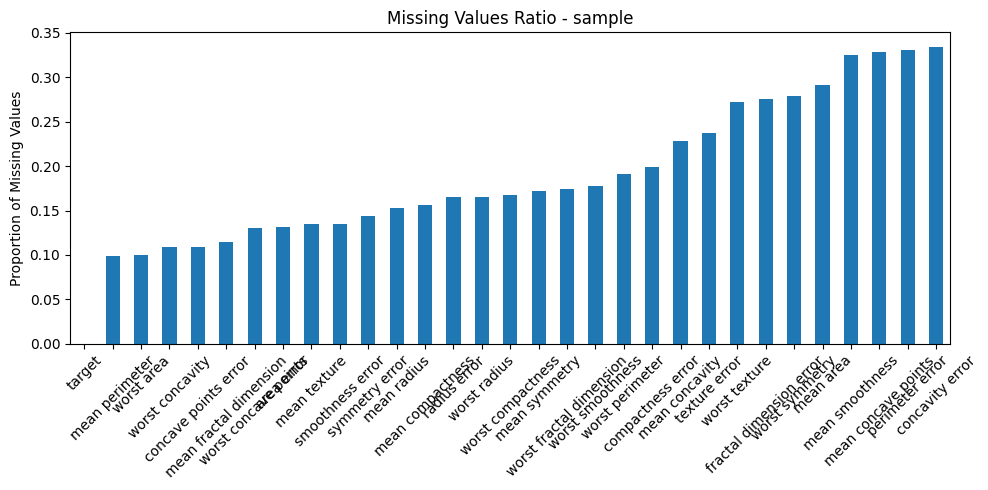

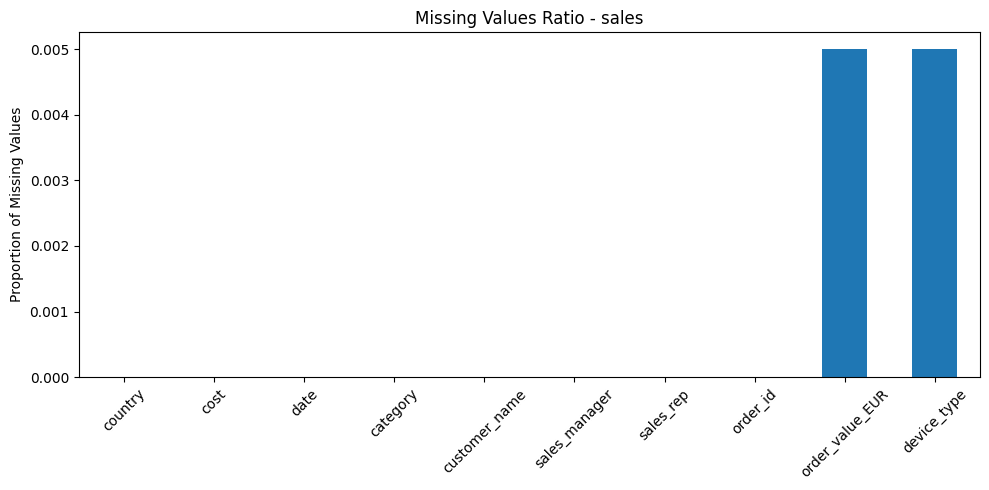

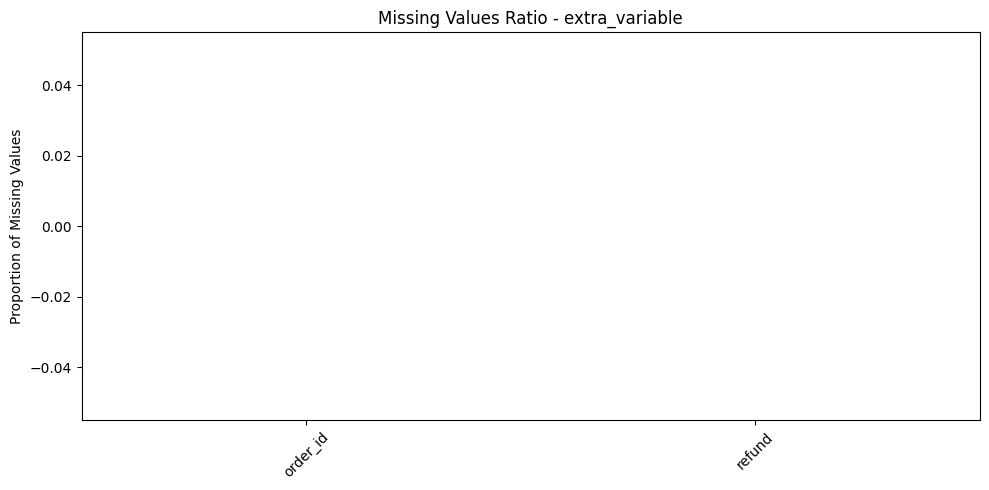

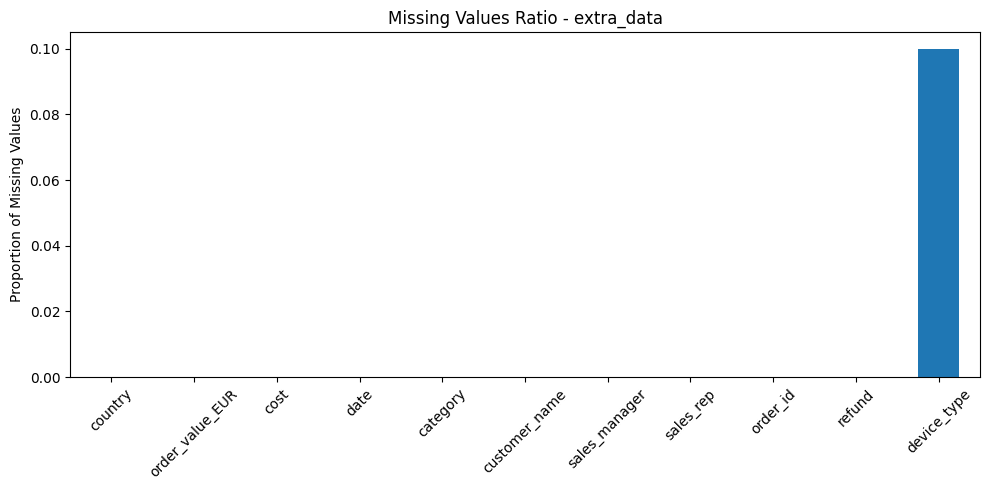

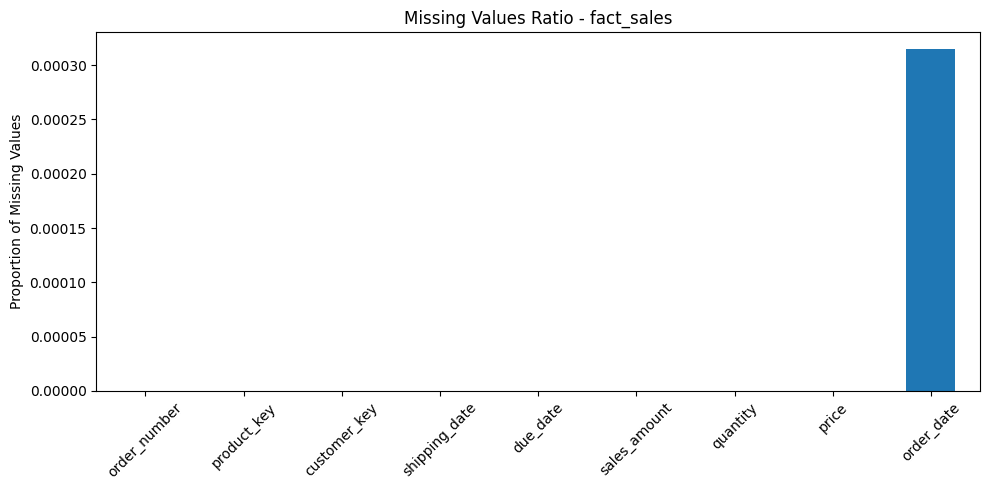

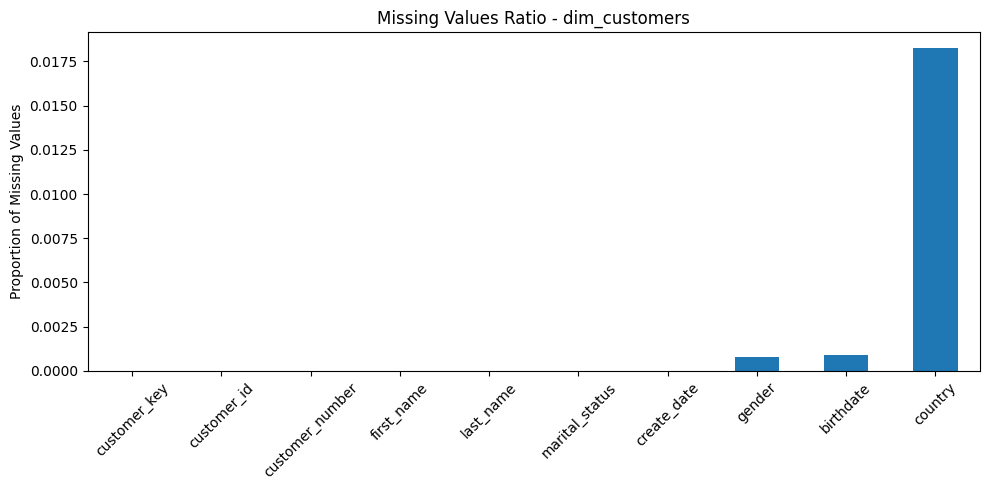

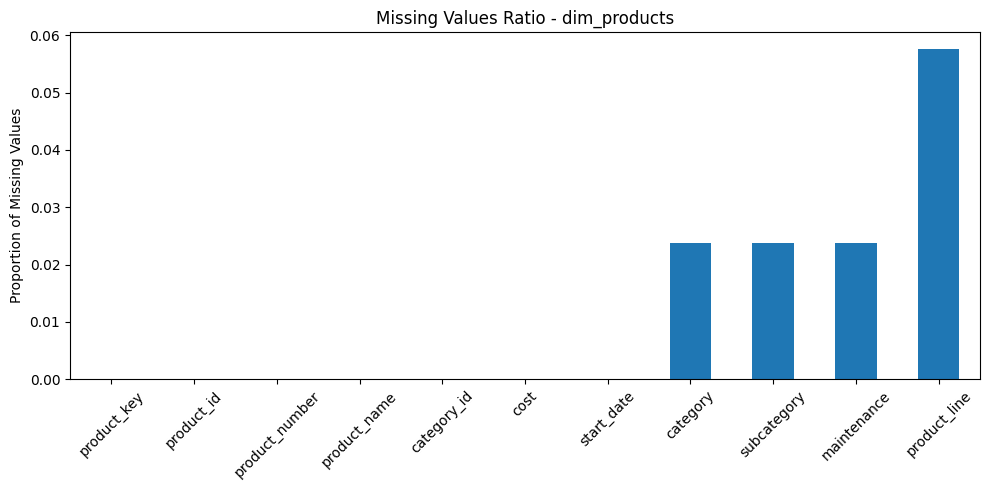

In [16]:
for name, df in dfs.items():
    
    plt.figure(figsize=(10,5))
    
    (df.isna().sum() / df.shape[0]) \
        .sort_values() \
        .plot(kind="bar")
    
    plt.title(f"Missing Values Ratio - {name}")
    plt.ylabel("Proportion of Missing Values")
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    plt.show()

# SIMPLE INPUTER

In [17]:
dfs_imputed = {}

for name, df in dfs.items():
    
    df_imputed = df.copy()
    
    # Separar colunas por tipo
    numeric_cols = df_imputed.select_dtypes(include=["float64", "int64"]).columns
    categorical_cols = df_imputed.select_dtypes(include=["object"]).columns
    
    # Imputar numéricas
    if len(numeric_cols) > 0:
        numeric_imputer = SimpleImputer(strategy="median")
        df_imputed[numeric_cols] = numeric_imputer.fit_transform(df_imputed[numeric_cols])
    
    # Imputar categóricas
    if len(categorical_cols) > 0:
        categorical_imputer = SimpleImputer(strategy="most_frequent")
        df_imputed[categorical_cols] = categorical_imputer.fit_transform(df_imputed[categorical_cols])
    
    dfs_imputed[name] = df_imputed

In [18]:
for name, df in dfs_imputed.items():
    info_df = df.info()

    print(f"\n")
    print(f"\nInformation dataset: {name}")
    display(info_df)
    print(f"\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    object 
 14  smoothness error         5

None



<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   country          999 non-null    object        
 1   order_value_EUR  999 non-null    float64       
 2   cost             999 non-null    float64       
 3   date             999 non-null    datetime64[ns]
 4   category         999 non-null    object        
 5   customer_name    999 non-null    object        
 6   sales_manager    999 non-null    object        
 7   sales_rep        999 non-null    object        
 8   device_type      999 non-null    object        
 9   order_id         999 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 85.9+ KB



Information dataset: sales


None



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   order_id  1000 non-null   object 
 1   refund    1000 non-null   float64
dtypes: float64(1), object(1)
memory usage: 15.8+ KB



Information dataset: extra_variable


None



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   country          10 non-null     object        
 1   order_value_EUR  10 non-null     float64       
 2   cost             10 non-null     float64       
 3   date             10 non-null     datetime64[ns]
 4   category         10 non-null     object        
 5   customer_name    10 non-null     object        
 6   sales_manager    10 non-null     object        
 7   sales_rep        10 non-null     object        
 8   device_type      10 non-null     object        
 9   order_id         10 non-null     object        
 10  refund           10 non-null     float64       
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 1008.0+ bytes



Information dataset: extra_data


None



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60398 entries, 0 to 60397
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_number   60398 non-null  object        
 1   product_key    60398 non-null  float64       
 2   customer_key   60398 non-null  float64       
 3   order_date     60379 non-null  datetime64[ns]
 4   shipping_date  60398 non-null  datetime64[ns]
 5   due_date       60398 non-null  datetime64[ns]
 6   sales_amount   60398 non-null  float64       
 7   quantity       60398 non-null  float64       
 8   price          60398 non-null  float64       
dtypes: datetime64[ns](3), float64(5), object(1)
memory usage: 4.1+ MB



Information dataset: fact_sales


None



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18484 entries, 0 to 18483
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   customer_key     18484 non-null  float64       
 1   customer_id      18484 non-null  float64       
 2   customer_number  18484 non-null  object        
 3   first_name       18484 non-null  object        
 4   last_name        18484 non-null  object        
 5   country          18484 non-null  object        
 6   marital_status   18484 non-null  object        
 7   gender           18484 non-null  object        
 8   birthdate        18467 non-null  datetime64[ns]
 9   create_date      18484 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), object(6)
memory usage: 1.4+ MB



Information dataset: dim_customers


None



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   product_key     295 non-null    float64       
 1   product_id      295 non-null    float64       
 2   product_number  295 non-null    object        
 3   product_name    295 non-null    object        
 4   category_id     295 non-null    object        
 5   category        295 non-null    object        
 6   subcategory     295 non-null    object        
 7   maintenance     295 non-null    object        
 8   cost            295 non-null    float64       
 9   product_line    295 non-null    object        
 10  start_date      295 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 25.5+ KB



Information dataset: dim_products


None

In [19]:
for name, df in dfs_imputed.items():
    isna_df = (df.isna().sum()/df.shape[0]).sort_values()

    print(f"\n")
    print(f"\nDataset: {name}")
    display(isna_df)
    print(f"\n")




Dataset: sample


mean radius                0.0
worst symmetry             0.0
worst concave points       0.0
worst concavity            0.0
worst compactness          0.0
worst smoothness           0.0
worst area                 0.0
worst perimeter            0.0
worst texture              0.0
worst radius               0.0
fractal dimension error    0.0
symmetry error             0.0
concave points error       0.0
concavity error            0.0
worst fractal dimension    0.0
compactness error          0.0
area error                 0.0
perimeter error            0.0
texture error              0.0
radius error               0.0
mean fractal dimension     0.0
mean symmetry              0.0
mean concave points        0.0
mean concavity             0.0
mean compactness           0.0
mean smoothness            0.0
mean area                  0.0
mean perimeter             0.0
mean texture               0.0
smoothness error           0.0
target                     0.0
dtype: float64






Dataset: sales


country            0.0
order_value_EUR    0.0
cost               0.0
date               0.0
category           0.0
customer_name      0.0
sales_manager      0.0
sales_rep          0.0
device_type        0.0
order_id           0.0
dtype: float64






Dataset: extra_variable


order_id    0.0
refund      0.0
dtype: float64






Dataset: extra_data


country            0.0
order_value_EUR    0.0
cost               0.0
date               0.0
category           0.0
customer_name      0.0
sales_manager      0.0
sales_rep          0.0
device_type        0.0
order_id           0.0
refund             0.0
dtype: float64






Dataset: fact_sales


order_number     0.000000
product_key      0.000000
customer_key     0.000000
shipping_date    0.000000
due_date         0.000000
sales_amount     0.000000
quantity         0.000000
price            0.000000
order_date       0.000315
dtype: float64






Dataset: dim_customers


customer_key       0.00000
customer_id        0.00000
customer_number    0.00000
first_name         0.00000
last_name          0.00000
country            0.00000
marital_status     0.00000
gender             0.00000
create_date        0.00000
birthdate          0.00092
dtype: float64






Dataset: dim_products


product_key       0.0
product_id        0.0
product_number    0.0
product_name      0.0
category_id       0.0
category          0.0
subcategory       0.0
maintenance       0.0
cost              0.0
product_line      0.0
start_date        0.0
dtype: float64

# SUMMARIZATION AFTER IMPUTER VALUES BY CLEANING DATA

In [20]:
for name, df in dfs_imputed.items():
    print(f"\n===== Dataset: {name} =====")
    display(df.describe())


===== Dataset: sample =====


mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     13.940355     19.250685       91.478137   630.941652   
std       3.234679      4.045301       22.876614   303.824027   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.930000     16.670000       76.530000   471.300000   
50%      13.280000     18.860000       86.340000   556.700000   
75%      15.060000     21.460000      102.400000   664.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096964          0.102747        0.088163             0.044072   
std           0.011912          0.049153        0.073951             0.032306   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.091360          0.069450        0.039740             0.026450   
50%           0.096565          0.093125        0.068240             0.033770   
75%           0.101500          0.123000        0.111500             0.053970   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  ...  worst texture  \
count     569.000000              569.000000  ...     569.000000   
mean        0.181008                0.062475  ...      25.497162   
std         0.025152                0.006697  ...       5.277999   
min         0.106000                0.049960  ...      12.490000   
25%         0.166100                0.058350  ...      22.460000   
50%         0.179100                0.061300  ...      25.225000   
75%         0.193400                0.065400  ...      27.680000   
max         0.290600                0.097440  ...      49.540000   

       worst perimeter   worst area  worst smoothness  worst compactness  \
count       569.000000   569.000000        569.000000         569.000000   
mean        105.432522   873.105009          0.132779           0.249252   
std          30.781459   560.523409          0.020865           0.147304   
min          54.490000   185.200000          0.071170           0.034320   
25%          86.600000   522.900000          0.121600           0.158200   
50%          97.455000   686.550000          0.131450           0.211850   
75%         114.200000   993.600000          0.143200           0.306400   
max         251.200000  4254.000000          0.222600           1.058000   

       worst concavity  worst concave points  worst symmetry  \
count       569.000000            569.000000      569.000000   
mean          0.261874              0.114618        0.289073   
std           0.198758              0.062156        0.056453   
min           0.000000              0.000000        0.156600   
25%           0.121100              0.070250        0.262200   
50%           0.212300              0.101500        0.282050   
75%           0.366000              0.156100        0.303800   
max           1.252000              0.291000        0.663800   

       worst fractal dimension      target  
count               569.000000  569.000000  
mean                  0.083581    0.627417  
std                   0.017062    0.483918  
min                   0.055040    0.000000  
25%                   0.073760    0.000000  
50%                   0.079870    1.000000  
75%                   0.088390    1.000000  
max                   0.207500    1.000000  

[8 rows x 30 columns]


===== Dataset: sales =====


order_value_EUR           cost                           date
count       999.000000     999.000000                            999
mean     113260.402588   94414.070140  2020-01-01 05:22:52.972973056
min       15100.570000   12113.680000            2019-01-02 00:00:00
25%       65578.835000   54425.950000            2019-07-05 00:00:00
50%      105419.425000   87261.490000            2020-01-08 00:00:00
75%      150662.655000  125740.565000            2020-06-27 00:00:00
max      383996.760000  304701.430000            2020-12-30 00:00:00
std       61464.252892   51546.387518                            NaN


===== Dataset: extra_variable =====


refund
count   1000.00000
mean   49643.83500
std    28552.31939
min     1009.00000
25%    25032.50000
50%    49349.50000
75%    74860.75000
max    99539.00000


===== Dataset: extra_data =====


order_value_EUR           cost                 date       refund
count        10.000000      10.000000                   10    10.000000
mean     114046.289000   95291.232000  2020-02-03 07:12:00  5505.500000
min       17524.020000   14122.610000  2019-01-20 00:00:00  2809.000000
25%       72348.065000   60375.492500  2019-10-06 12:00:00  4031.250000
50%       81680.685000   68619.860000  2020-01-13 00:00:00  5063.500000
75%      146579.765000  118151.307500  2020-08-18 06:00:00  7208.000000
max      296685.560000  257480.340000  2020-12-02 00:00:00  9376.000000
std       79286.730924   68219.130639                  NaN  2210.173259


===== Dataset: fact_sales =====


product_key  customer_key                     order_date  \
count  60398.000000  60398.000000                          60379   
mean     212.284331   7842.685420  2013-06-09 11:46:05.034200832   
min        3.000000      1.000000            2010-12-29 00:00:00   
25%      138.000000   3004.000000            2013-04-03 00:00:00   
50%      246.000000   7144.000000            2013-07-14 00:00:00   
75%      285.000000  12430.750000            2013-10-18 00:00:00   
max      295.000000  18484.000000            2014-01-28 00:00:00   
std       80.073598   5432.430404                            NaN   

                       shipping_date                       due_date  \
count                          60398                          60398   
mean   2013-06-16 12:21:38.903937280  2013-06-21 12:21:38.903937280   
min              2011-01-05 00:00:00            2011-01-10 00:00:00   
25%              2013-04-10 00:00:00            2013-04-15 00:00:00   
50%              2013-07-21 00:00:00            2013-07-26 00:00:00   
75%              2013-10-25 00:00:00            2013-10-30 00:00:00   
max              2014-02-04 00:00:00            2014-02-09 00:00:00   
std                              NaN                            NaN   

       sales_amount      quantity         price  
count  60398.000000  60398.000000  60398.000000  
mean     486.046723      1.000414    486.037783  
min        2.000000      1.000000      2.000000  
25%        8.000000      1.000000      8.000000  
50%       30.000000      1.000000     30.000000  
75%      540.000000      1.000000    540.000000  
max     3578.000000     10.000000   3578.000000  
std      928.450537      0.044011    928.454329


===== Dataset: dim_customers =====


customer_key   customer_id                      birthdate  \
count  18484.000000  18484.000000                          18467   
mean    9242.500000  20241.500000  1969-04-28 13:02:11.196187796   
min        1.000000  11000.000000            1916-02-10 00:00:00   
25%     4621.750000  15620.750000            1961-10-05 12:00:00   
50%     9242.500000  20241.500000            1971-07-13 00:00:00   
75%    13863.250000  24862.250000            1978-08-31 00:00:00   
max    18484.000000  29483.000000            1986-06-25 00:00:00   
std     5336.015523   5336.015523                            NaN   

                         create_date  
count                          18484  
mean   2025-12-18 23:09:54.416792832  
min              2025-10-06 00:00:00  
25%              2026-01-04 00:00:00  
50%              2026-01-05 00:00:00  
75%              2026-01-05 00:00:00  
max              2026-01-27 00:00:00  
std                              NaN


===== Dataset: dim_products =====


product_key  product_id         cost           start_date
count    295.00000  295.000000   295.000000                  295
mean     148.00000  440.325424   431.067797  2012-12-31 00:00:00
min        1.00000  210.000000     0.000000  2003-07-01 00:00:00
25%       74.50000  352.000000    33.500000  2012-07-01 00:00:00
50%      148.00000  456.000000   200.000000  2013-07-01 00:00:00
75%      221.50000  532.500000   602.000000  2013-07-01 00:00:00
max      295.00000  606.000000  2171.000000  2013-07-01 00:00:00
std       85.30338  108.974389   533.624861                  NaN

In [21]:
for name, df in dfs_imputed.items():
    print(f"\n===== Dataset: {name} =====")
    display(df.describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95]))


===== Dataset: sample =====


mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     13.940355     19.250685       91.478137   630.941652   
std       3.234679      4.045301       22.876614   303.824027   
min       6.981000      9.710000       43.790000   143.500000   
5%        9.670600     13.218000       61.490000   294.080000   
25%      11.930000     16.670000       76.530000   471.300000   
50%      13.280000     18.860000       86.340000   556.700000   
75%      15.060000     21.460000      102.400000   664.700000   
95%      20.278000     27.122000      134.700000  1256.000000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096964          0.102747        0.088163             0.044072   
std           0.011912          0.049153        0.073951             0.032306   
min           0.052630          0.019380        0.000000             0.000000   
5%            0.078226          0.043172        0.008557             0.010246   
25%           0.091360          0.069450        0.039740             0.026450   
50%           0.096565          0.093125        0.068240             0.033770   
75%           0.101500          0.123000        0.111500             0.053970   
95%           0.117300          0.199760        0.241580             0.107280   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  ...  worst texture  \
count     569.000000              569.000000  ...     569.000000   
mean        0.181008                0.062475  ...      25.497162   
std         0.025152                0.006697  ...       5.277999   
min         0.106000                0.049960  ...      12.490000   
5%          0.142720                0.053998  ...      17.174000   
25%         0.166100                0.058350  ...      22.460000   
50%         0.179100                0.061300  ...      25.225000   
75%         0.193400                0.065400  ...      27.680000   
95%         0.228100                0.074618  ...      35.312000   
max         0.290600                0.097440  ...      49.540000   

       worst perimeter   worst area  worst smoothness  worst compactness  \
count       569.000000   569.000000        569.000000         569.000000   
mean        105.432522   873.105009          0.132779           0.249252   
std          30.781459   560.523409          0.020865           0.147304   
min          54.490000   185.200000          0.071170           0.034320   
5%           69.070000   350.700000          0.099388           0.076624   
25%          86.600000   522.900000          0.121600           0.158200   
50%          97.455000   686.550000          0.131450           0.211850   
75%         114.200000   993.600000          0.143200           0.306400   
95%         167.640000  1999.800000          0.169780           0.549880   
max         251.200000  4254.000000          0.222600           1.058000   

       worst concavity  worst concave points  worst symmetry  \
count       569.000000            569.000000      569.000000   
mean          0.261874              0.114618        0.289073   
std           0.198758              0.062156        0.056453   
min           0.000000              0.000000        0.156600   
5%            0.018360              0.026194        0.216200   
25%           0.121100              0.070250        0.262200   
50%           0.212300              0.101500        0.282050   
75%           0.366000              0.156100        0.303800   
95%           0.656200              0.231960        0.397340   
max           1.252000              0.291000        0.663800   

       worst fractal dimension      target  
count               569.000000  569.000000  
mean              


===== Dataset: sales =====


order_value_EUR           cost                           date
count       999.000000     999.000000                            999
mean     113260.402588   94414.070140  2020-01-01 05:22:52.972973056
min       15100.570000   12113.680000            2019-01-02 00:00:00
5%        33172.335000   27278.022000            2019-02-04 16:48:00
25%       65578.835000   54425.950000            2019-07-05 00:00:00
50%      105419.425000   87261.490000            2020-01-08 00:00:00
75%      150662.655000  125740.565000            2020-06-27 00:00:00
95%      238143.332000  199410.185000            2020-11-23 00:00:00
max      383996.760000  304701.430000            2020-12-30 00:00:00
std       61464.252892   51546.387518                            NaN


===== Dataset: extra_variable =====


refund
count   1000.00000
mean   49643.83500
std    28552.31939
min     1009.00000
5%      5555.95000
25%    25032.50000
50%    49349.50000
75%    74860.75000
95%    93632.00000
max    99539.00000


===== Dataset: extra_data =====


order_value_EUR           cost                 date       refund
count        10.000000      10.000000                   10    10.000000
mean     114046.289000   95291.232000  2020-02-03 07:12:00  5505.500000
min       17524.020000   14122.610000  2019-01-20 00:00:00  2809.000000
5%        38810.721000   32987.069000  2019-03-06 21:36:00  2862.550000
25%       72348.065000   60375.492500  2019-10-06 12:00:00  4031.250000
50%       81680.685000   68619.860000  2020-01-13 00:00:00  5063.500000
75%      146579.765000  118151.307500  2020-08-18 06:00:00  7208.000000
95%      243620.597000  207593.979000  2020-11-05 21:36:00  8740.600000
max      296685.560000  257480.340000  2020-12-02 00:00:00  9376.000000
std       79286.730924   68219.130639                  NaN  2210.173259


===== Dataset: fact_sales =====


product_key  customer_key                     order_date  \
count  60398.000000  60398.000000                          60379   
mean     212.284331   7842.685420  2013-06-09 11:46:05.034200832   
min        3.000000      1.000000            2010-12-29 00:00:00   
5%        49.000000    415.000000            2012-04-11 00:00:00   
25%      138.000000   3004.000000            2013-04-03 00:00:00   
50%      246.000000   7144.000000            2013-07-14 00:00:00   
75%      285.000000  12430.750000            2013-10-18 00:00:00   
95%      295.000000  17109.150000            2013-12-24 00:00:00   
max      295.000000  18484.000000            2014-01-28 00:00:00   
std       80.073598   5432.430404                            NaN   

                       shipping_date                       due_date  \
count                          60398                          60398   
mean   2013-06-16 12:21:38.903937280  2013-06-21 12:21:38.903937280   
min              2011-01-05 00:00:00            2011-01-10 00:00:00   
5%               2012-04-18 00:00:00            2012-04-23 00:00:00   
25%              2013-04-10 00:00:00            2013-04-15 00:00:00   
50%              2013-07-21 00:00:00            2013-07-26 00:00:00   
75%              2013-10-25 00:00:00            2013-10-30 00:00:00   
95%              2013-12-31 00:00:00            2014-01-05 00:00:00   
max              2014-02-04 00:00:00            2014-02-09 00:00:00   
std                              NaN                            NaN   

       sales_amount      quantity         price  
count  60398.000000  60398.000000  60398.000000  
mean     486.046723      1.000414    486.037783  
min        2.000000      1.000000      2.000000  
5%         2.000000      1.000000      2.000000  
25%        8.000000      1.000000      8.000000  
50%       30.000000      1.000000     30.000000  
75%      540.000000      1.000000    540.000000  
95%     2443.000000      1.000000   2443.000000  
max     3578.000000     10.000000   3578.000000  
std      928.450537      0.044011    928.454329


===== Dataset: dim_customers =====


customer_key   customer_id                      birthdate  \
count  18484.000000  18484.000000                          18467   
mean    9242.500000  20241.500000  1969-04-28 13:02:11.196187796   
min        1.000000  11000.000000            1916-02-10 00:00:00   
5%       925.150000  11924.150000            1947-08-23 00:00:00   
25%     4621.750000  15620.750000            1961-10-05 12:00:00   
50%     9242.500000  20241.500000            1971-07-13 00:00:00   
75%    13863.250000  24862.250000            1978-08-31 00:00:00   
95%    17559.850000  28558.850000            1984-05-08 00:00:00   
max    18484.000000  29483.000000            1986-06-25 00:00:00   
std     5336.015523   5336.015523                            NaN   

                         create_date  
count                          18484  
mean   2025-12-18 23:09:54.416792832  
min              2025-10-06 00:00:00  
5%               2025-10-08 00:00:00  
25%              2026-01-04 00:00:00  
50%              2026-01-05 00:00:00  
75%              2026-01-05 00:00:00  
95%              2026-01-25 00:00:00  
max              2026-01-27 00:00:00  
std                              NaN


===== Dataset: dim_products =====


product_key  product_id         cost           start_date
count    295.00000  295.000000   295.000000                  295
mean     148.00000  440.325424   431.067797  2012-12-31 00:00:00
min        1.00000  210.000000     0.000000  2003-07-01 00:00:00
5%        15.70000  248.100000     6.700000  2011-07-01 00:00:00
25%       74.50000  352.000000    33.500000  2012-07-01 00:00:00
50%      148.00000  456.000000   200.000000  2013-07-01 00:00:00
75%      221.50000  532.500000   602.000000  2013-07-01 00:00:00
95%      280.30000  591.300000  1555.000000  2013-07-01 00:00:00
max      295.00000  606.000000  2171.000000  2013-07-01 00:00:00
std       85.30338  108.974389   533.624861                  NaN

# SUMMARIZATION OF OBJECT

In [22]:
for name, df in dfs_imputed.items():
    
    object_cols = df.select_dtypes(include=['object'])
    
    if not object_cols.empty:
        print(f"\n===== Dataset: {name} =====")
        display(object_cols.describe().T)


===== Dataset: sample =====


count unique top freq
area error   569      3   A  564


===== Dataset: sales =====


count unique                  top freq
country         999     15             Portugal  238
category        999     10             Clothing  155
customer_name   999     75       Johns and Sons  142
sales_manager   999     15      Celine Tumasian  238
sales_rep       999     35  Amelina Piscopiello   56
device_type     999      3                   PC  784
order_id        999    999           70-0511466    1


===== Dataset: extra_variable =====


count unique         top freq
order_id  1000   1000  70-0511466    1


===== Dataset: extra_data =====


count unique                 top freq
country          10      6            Portugal    4
category         10      6               Books    2
customer_name    10      9   Hessel-Stiedemann    2
sales_manager    10      6     Celine Tumasian    4
sales_rep        10      8  Smitty Culverhouse    3
device_type      10      3                  PC    6
order_id         10     10          70-0511466    1


===== Dataset: fact_sales =====


count unique      top freq
order_number  60398  27659  SO58845    8


===== Dataset: dim_customers =====


count unique            top   freq
customer_number  18484  18484     AW00011000      1
first_name       18484    670      Katherine     97
last_name        18484    375           Diaz    209
country          18484      6  United States   7819
marital_status   18484      2        Married  10011
gender           18484      2           Male   9356


===== Dataset: dim_products =====


count unique                        top freq
product_number   295    295                 FR-R92B-58    1
product_name     295    295  HL Road Frame - Black- 58    1
category_id      295     37                      BI_RB   43
category         295      4                 Components  134
subcategory      295     36                 Road Bikes   50
maintenance      295      2                        Yes  233
product_line     295      4                       Road  117

In [23]:
for name, df in dfs_imputed.items():
    
    print(f"\n===== Dataset: {name} =====")
    
    object_cols = df.select_dtypes(include=['object'])
    
    for col in object_cols.columns:
        print(f"\n--- Column: {col} ---")
        display(df[col].value_counts())


===== Dataset: sample =====

--- Column: area error ---


area error
A    564
B      4
C      1
Name: count, dtype: int64


===== Dataset: sales =====

--- Column: country ---


country
Portugal       238
France         232
Sweden         182
UK             101
Finland         44
Ireland         43
Bulgaria        30
Netherlands     28
Spain           26
Germany         24
Luxembourg      22
Denmark         11
Italy           10
Belgium          6
Austria          2
Name: count, dtype: int64


--- Column: category ---


category
Clothing       155
Games          138
Electronics    134
Appliances     131
Books          117
Beauty         115
Smartphones     95
Outdoors        50
Accessories     35
Other           29
Name: count, dtype: int64


--- Column: customer_name ---


customer_name
Johns and Sons                       142
Hessel-Stiedemann                     55
Swaniawski, Runolfsson and Green      25
Dickinson, Hyatt and Berge            24
Murray, Reichel and Nolan             23
                                    ... 
Baumbach Group                         2
Parisian, Steuber and Satterfield      2
Gorczany-Lehner                        1
Lind, Mueller and Stoltenberg          1
Littel-Blick                           1
Name: count, Length: 75, dtype: int64


--- Column: sales_manager ---


sales_manager
Celine Tumasian     238
Othello Bowes       232
Maxie Marrow        182
Jessamine Apark     101
Hube Corey           44
Glenine Suttaby      43
Charil Alpe          30
Denice Amberg        28
Emalia Dinse         26
Rickard Doogood      24
Ilsa Kob             22
Modestia Byfford     11
Piggy Roscrigg       10
Lambert Norheny       6
Orsa Geekin           2
Name: count, dtype: int64


--- Column: sales_rep ---


sales_rep
Amelina Piscopiello    56
Corene Shirer          53
Hortense Gerring       52
Aurelie Wren           51
Ora Grennan            50
Crysta Halls           47
Avrit Chanders         43
Brynn Dempster         41
Smitty Culverhouse     41
Alyosha Meah           40
Madelon Bront          39
Tarrah Castelletti     38
Winny Agnolo           38
Genevra Charrisson     37
Anita Woakes           36
Maighdiln Upcraft      36
Caro Morfield          29
Nero Harbisher         28
Jay Morefield          26
Casie MacBain          24
Bunnie Tonbridge       23
Wat Bowkley            23
Jocelyn Laurentino     22
Mellicent Mattys       21
Palm Wetherald         20
Bernadine Fullagar     15
Shermy McGready        15
Perri Aldersley        12
Joshua Prevost         10
Bertha Walbrook         9
Case Desorts            6
Collin Mackness         6
Manuel Goudie           5
Cobby Andersen          5
Bank Coumbe             2
Name: count, dtype: int64


--- Column: device_type ---


device_type
PC        784
Mobile    142
Tablet     73
Name: count, dtype: int64


--- Column: order_id ---


order_id
70-0511466    1
73-9246627    1
40-5308505    1
84-1745028    1
03-3965480    1
             ..
77-4566105    1
17-3178991    1
25-9913528    1
96-0020600    1
60-6986682    1
Name: count, Length: 999, dtype: int64


===== Dataset: extra_variable =====

--- Column: order_id ---


order_id
70-0511466    1
80-4161102    1
16-2824654    1
40-5308505    1
84-1745028    1
             ..
77-4566105    1
17-3178991    1
25-9913528    1
96-0020600    1
60-6986682    1
Name: count, Length: 1000, dtype: int64


===== Dataset: extra_data =====

--- Column: country ---


country
Portugal    4
Spain       2
Sweden      1
France      1
Finland     1
UK          1
Name: count, dtype: int64


--- Column: category ---


category
Books          2
Appliances     2
Clothing       2
Games          2
Beauty         1
Accessories    1
Name: count, dtype: int64


--- Column: customer_name ---


customer_name
Hessel-Stiedemann                2
Goldner-Dibbert                  1
Gislason-Stanton                 1
Schoen-Keeling                   1
Farrell, Swaniawski and Crist    1
Hilll-Vandervort                 1
Hermiston, Simonis and Wisoky    1
Johns and Sons                   1
Larkin-Collier                   1
Name: count, dtype: int64


--- Column: sales_manager ---


sales_manager
Celine Tumasian    4
Emalia Dinse       2
Maxie Marrow       1
Othello Bowes      1
Hube Corey         1
Jessamine Apark    1
Name: count, dtype: int64


--- Column: sales_rep ---


sales_rep
Smitty Culverhouse    3
Madelon Bront         1
Maighdiln Upcraft     1
Aurelie Wren          1
Perri Aldersley       1
Wat Bowkley           1
Winny Agnolo          1
Bertha Walbrook       1
Name: count, dtype: int64


--- Column: device_type ---


device_type
PC        6
Mobile    3
Tablet    1
Name: count, dtype: int64


--- Column: order_id ---


order_id
70-0511466    1
62-3312495    1
69-6259390    1
14-6700183    1
91-4126746    1
60-6998932    1
28-6585323    1
64-5761908    1
15-8765160    1
58-7703341    1
Name: count, dtype: int64


===== Dataset: fact_sales =====

--- Column: order_number ---


order_number
SO58845    8
SO70714    8
SO72656    8
SO74869    7
SO60233    7
          ..
SO45087    1
SO45088    1
SO45089    1
SO45090    1
SO69321    1
Name: count, Length: 27659, dtype: int64


===== Dataset: dim_customers =====

--- Column: customer_number ---


customer_number
AW00011000    1
AW00023419    1
AW00023327    1
AW00023326    1
AW00023325    1
             ..
AW00017160    1
AW00017159    1
AW00017158    1
AW00017157    1
AW00029483    1
Name: count, Length: 18484, dtype: int64


--- Column: first_name ---


first_name
Katherine    97
Marcus       97
Richard      94
Lucas        93
Dalton       93
             ..
Kirk          1
Birgit        1
Ram├│n        1
Mike          1
Jeff          1
Name: count, Length: 670, dtype: int64


--- Column: last_name ---


last_name
Diaz           209
Hernandez      186
Sanchez        175
Torres         172
Perez          170
              ... 
Sneath           1
Smith-Bates      1
Palit            1
Shakespear       1
Pulipalyam       1
Name: count, Length: 375, dtype: int64


--- Column: country ---


country
United States     7819
Australia         3591
United Kingdom    1913
France            1810
Germany           1780
Canada            1571
Name: count, dtype: int64


--- Column: marital_status ---


marital_status
Married    10011
Single      8473
Name: count, dtype: int64


--- Column: gender ---


gender
Male      9356
Female    9128
Name: count, dtype: int64


===== Dataset: dim_products =====

--- Column: product_number ---


product_number
FR-R92B-58    1
FR-M63S-40    1
FR-R72Y-40    1
FR-R72Y-38    1
FR-R38B-62    1
             ..
TG-W091-M     1
TG-W091-L     1
SH-M897-X     1
SH-M897-S     1
WB-H098       1
Name: count, Length: 295, dtype: int64


--- Column: product_name ---


product_name
HL Road Frame - Black- 58           1
ML Mountain Frame-W - Silver- 40    1
ML Road Frame-W - Yellow- 40        1
ML Road Frame-W - Yellow- 38        1
LL Road Frame - Black- 62           1
                                   ..
Women's Tights- M                   1
Women's Tights- L                   1
Men's Sports Shorts- XL             1
Men's Sports Shorts- S              1
Water Bottle - 30 oz.               1
Name: count, Length: 295, dtype: int64


--- Column: category_id ---


category_id
BI_RB    43
CO_RF    33
BI_MB    32
CO_MF    28
BI_TB    22
CO_TF    18
CO_WH    14
AC_TT    11
CO_SA     9
CL_JE     8
CO_HB     8
CO_PE     7
CL_SH     7
CL_GL     6
CL_SO     4
CO_FO     3
AC_HE     3
CO_CS     3
CL_VE     3
AC_LI     3
AC_BC     3
CO_BB     3
CL_TI     3
CL_BS     3
CO_HS     3
AC_PU     2
CO_BR     2
CO_DE     2
AC_BS     1
AC_BR     1
AC_LO     1
CL_CA     1
AC_PA     1
AC_HP     1
CO_CH     1
AC_FE     1
AC_CL     1
Name: count, dtype: int64


--- Column: category ---


category
Components     134
Bikes           97
Clothing        35
Accessories     29
Name: count, dtype: int64


--- Column: subcategory ---


subcategory
Road Bikes           50
Road Frames          33
Mountain Bikes       32
Mountain Frames      28
Touring Bikes        22
Touring Frames       18
Wheels               14
Tires and Tubes      11
Saddles               9
Jerseys               8
Handlebars            8
Shorts                7
Gloves                6
Socks                 4
Forks                 3
Helmets               3
Cranksets             3
Vests                 3
Bottles and Cages     3
Bib-Shorts            3
Bottom Brackets       3
Headsets              3
Tights                3
Lights                3
Pumps                 2
Derailleurs           2
Brakes                2
Fenders               1
Caps                  1
Panniers              1
Hydration Packs       1
Locks                 1
Bike Racks            1
Cleaners              1
Bike Stands           1
Chains                1
Name: count, dtype: int64


--- Column: maintenance ---


maintenance
Yes    233
No      62
Name: count, dtype: int64


--- Column: product_line ---


product_line
Road           117
Mountain        91
Touring         52
Other Sales     35
Name: count, dtype: int64

# DIMENSION x MEASURE
- Dimesion is not a numeric value and If is, it is can not be aggregated
- Examples: category, product, birthdate, id
- Measure is numeric value and can be aggregated
- Examples: sales, quantity, age

# UNIQUES VALUES PER OBJECT
- Identifying he unique values (or categories) in each dimension.
- Recognizing hw data might be grouped or segmented which is useful for later analysis
- DISTINCT (DIMENSION) IN SQL
  

# DATASETS AND DIMENSIONS COLUMNS

In [24]:
result_rows = []

# Lista de colunas a ignorar
ignored_columns = ["cost", "quantity", "order_value_eur", "refund"]

for dataset_name, df in dfs_imputed.items():
    for col in df.columns:
        
        # Ignorar colunas específicas
        if col.lower() in ignored_columns:
            continue
        
        dtype = df[col].dtype
        
        # Se não for numérico
        if not pd.api.types.is_numeric_dtype(dtype):
            
            result_rows.append({
                "dataset": dataset_name,
                "column": col,
                "dtype": dtype
            })
        
        else:
            # Se for numérico mas tiver poucos valores únicos
            unique_count = df[col].nunique()
            
            if unique_count <= 20:
                result_rows.append({
                    "dataset": dataset_name,
                    "column": col,
                    "dtype": dtype
                })

# Criar DataFrame final
result_df = pd.DataFrame(result_rows)

result_df

dataset           column           dtype
0           sample       area error          object
1           sample           target         float64
2            sales          country          object
3            sales             date  datetime64[ns]
4            sales         category          object
5            sales    customer_name          object
6            sales    sales_manager          object
7            sales        sales_rep          object
8            sales      device_type          object
9            sales         order_id          object
10  extra_variable         order_id          object
11      extra_data          country          object
12      extra_data             date  datetime64[ns]
13      extra_data         category          object
14      extra_data    customer_name          object
15      extra_data    sales_manager          object
16      extra_data        sales_rep          object
17      extra_data      device_type          object
18      extra_data         order_id          object
19      fact_sales     order_number          object
20      fact_sales       order_date  datetime64[ns]
21      fact_sales    shipping_date  datetime64[ns]
22      fact_sales         due_date  datetime64[ns]
23   dim_customers  customer_number          object
24   dim_customers       first_name          object
25   dim_customers        last_name          object
26   dim_customers          country          object
27   dim_customers   marital_status          object
28   dim_customers           gender          object
29   dim_customers        birthdate  datetime64[ns]
30   dim_customers      create_date  datetime64[ns]
31    dim_products   product_number          object
32    dim_products     product_name          object
33    dim_products      category_id          object
34    dim_products         category          object
35    dim_products      subcategory          object
36    dim_products      maintenance          object
37    dim_products     product_line          object
38    dim_products       start_date  datetime64[ns]

# DATASETS AND DIMENSIONS VALUES

In [25]:
filtered_dfs = {}

for dataset_name, df in dfs_imputed.items():
    
    # Pegar colunas categóricas desse dataset
    cols = result_df[result_df["dataset"] == dataset_name]["column"].tolist()
    
    if cols:  # Só cria se ainda restarem colunas
        filtered_dfs[dataset_name] = df[cols]

In [26]:
for name, df in filtered_dfs.items():
    print(f"\n===== Dataset: {name} =====")
    display(df)


===== Dataset: sample =====


area error  target
0            A     0.0
1            A     0.0
2            A     0.0
3            A     0.0
4            A     0.0
..         ...     ...
564          A     0.0
565          A     0.0
566          A     0.0
567          A     0.0
568          A     1.0

[569 rows x 2 columns]


===== Dataset: sales =====


country       date     category                     customer_name  \
0         Sweden 2020-08-23        Games                    Konopelski LLC   
1         France 2020-05-15        Games                        Wisoky Inc   
2       Portugal 2020-04-09   Appliances                     Hegmann Group   
3         France 2019-06-26  Electronics                   Kirlin and Sons   
4          Italy 2019-09-24     Clothing                  Labadie and Sons   
..           ...        ...          ...                               ...   
995       France 2019-08-12  Electronics     Farrell, Swaniawski and Crist   
996       France 2020-05-28   Appliances                  Armstrong-Little   
997       France 2020-05-22  Electronics  Swaniawski, Runolfsson and Green   
998      Germany 2020-12-27  Electronics                Romaguera-Dietrich   
999  Netherlands 2020-06-24     Outdoors                   Kirlin and Sons   

       sales_manager            sales_rep device_type    order_id  
0       Maxie Marrow   Tarrah Castelletti      Tablet  70-0511466  
1      Othello Bowes  Amelina Piscopiello      Tablet  77-3489084  
2    Celine Tumasian        Corene Shirer          PC  65-8218141  
3      Othello Bowes         Crysta Halls      Mobile  29-5478106  
4     Piggy Roscrigg       Joshua Prevost          PC  57-6602854  
..               ...                  ...         ...         ...  
995    Othello Bowes       Avrit Chanders          PC  07-3201531  
996    Othello Bowes       Avrit Chanders      Tablet  77-0650807  
997    Othello Bowes          Ora Grennan      Tablet  44-2757396  
998  Rickard Doogood        Casie MacBain          PC  22-7259031  
999    Denice Amberg       Nero Harbisher          PC  60-6986682  

[999 rows x 8 columns]


===== Dataset: extra_variable =====


order_id
0    70-0511466
1    77-3489084
2    65-8218141
3    29-5478106
4    57-6602854
..          ...
995  07-3201531
996  77-0650807
997  44-2757396
998  22-7259031
999  60-6986682

[1000 rows x 1 columns]


===== Dataset: extra_data =====


country       date     category                  customer_name  \
0    Sweden 2020-12-02        Books                Goldner-Dibbert   
1    France 2019-01-20   Appliances               Gislason-Stanton   
2  Portugal 2019-05-02        Books                 Schoen-Keeling   
3  Portugal 2020-02-04       Beauty              Hessel-Stiedemann   
4  Portugal 2020-10-05   Appliances              Hessel-Stiedemann   
5     Spain 2020-07-14     Clothing  Farrell, Swaniawski and Crist   
6   Finland 2019-09-26        Games               Hilll-Vandervort   
7        UK 2020-08-30  Accessories  Hermiston, Simonis and Wisoky   
8     Spain 2019-12-22        Games                 Johns and Sons   
9  Portugal 2019-11-07     Clothing                 Larkin-Collier   

     sales_manager           sales_rep device_type    order_id  
0     Maxie Marrow       Madelon Bront      Mobile  70-0511466  
1    Othello Bowes   Maighdiln Upcraft          PC  62-3312495  
2  Celine Tumasian  Smitty Culverhouse          PC  69-6259390  
3  Celine Tumasian        Aurelie Wren          PC  14-6700183  
4  Celine Tumasian  Smitty Culverhouse      Mobile  91-4126746  
5     Emalia Dinse     Perri Aldersley          PC  60-6998932  
6       Hube Corey         Wat Bowkley      Mobile  28-6585323  
7  Jessamine Apark        Winny Agnolo          PC  64-5761908  
8     Emalia Dinse     Bertha Walbrook      Tablet  15-8765160  
9  Celine Tumasian  Smitty Culverhouse          PC  58-7703341


===== Dataset: fact_sales =====


order_number order_date shipping_date   due_date
0          SO54496 2013-03-16    2013-03-23 2013-03-28
1          SO54496 2013-03-16    2013-03-23 2013-03-28
2          SO54496 2013-03-16    2013-03-23 2013-03-28
3          SO54497 2013-03-16    2013-03-23 2013-03-28
4          SO54497 2013-03-16    2013-03-23 2013-03-28
...            ...        ...           ...        ...
60393      SO54494 2013-03-16    2013-03-23 2013-03-28
60394      SO54495 2013-03-16    2013-03-23 2013-03-28
60395      SO54495 2013-03-16    2013-03-23 2013-03-28
60396      SO54495 2013-03-16    2013-03-23 2013-03-28
60397      SO54495 2013-03-16    2013-03-23 2013-03-28

[60398 rows x 4 columns]


===== Dataset: dim_customers =====


customer_number first_name last_name         country marital_status  \
0          AW00011000        Jon      Yang       Australia        Married   
1          AW00011001     Eugene     Huang       Australia         Single   
2          AW00011002      Ruben    Torres       Australia        Married   
3          AW00011003    Christy       Zhu       Australia         Single   
4          AW00011004  Elizabeth   Johnson       Australia         Single   
...               ...        ...       ...             ...            ...   
18479      AW00029479      Tommy      Tang          France        Married   
18480      AW00029480       Nina      Raji  United Kingdom         Single   
18481      AW00029481       Ivan      Suri         Germany         Single   
18482      AW00029482    Clayton     Zhang          France        Married   
18483      AW00029483       Marc   Navarro          France        Married   

       gender  birthdate create_date  
0        Male 1971-10-06  2025-10-06  
1        Male 1976-05-10  2025-10-06  
2        Male 1971-02-09  2025-10-06  
3      Female 1973-08-14  2025-10-06  
4      Female 1979-08-05  2025-10-06  
...       ...        ...         ...  
18479    Male 1969-06-30  2026-01-25  
18480    Male 1977-05-06  2026-01-25  
18481    Male 1965-07-04  2026-01-25  
18482    Male 1964-09-01  2026-01-25  
18483    Male        NaT  2026-01-27  

[18484 rows x 8 columns]


===== Dataset: dim_products =====


product_number               product_name category_id     category  \
0       FR-R92B-58  HL Road Frame - Black- 58       CO_RF   Components   
1       FR-R92R-58    HL Road Frame - Red- 58       CO_RF   Components   
2       BK-M82B-38     Mountain-100 Black- 38       BI_MB        Bikes   
3       BK-M82B-42     Mountain-100 Black- 42       BI_MB        Bikes   
4       BK-M82B-44     Mountain-100 Black- 44       BI_MB        Bikes   
..             ...                        ...         ...          ...   
290        TT-T092          Touring Tire Tube       AC_TT  Accessories   
291      VE-C304-L            Classic Vest- L       CL_VE     Clothing   
292      VE-C304-M            Classic Vest- M       CL_VE     Clothing   
293      VE-C304-S            Classic Vest- S       CL_VE     Clothing   
294        WB-H098      Water Bottle - 30 oz.       AC_BC  Accessories   

           subcategory maintenance product_line start_date  
0          Road Frames         Yes         Road 2003-07-01  
1          Road Frames         Yes         Road 2003-07-01  
2       Mountain Bikes         Yes     Mountain 2011-07-01  
3       Mountain Bikes         Yes     Mountain 2011-07-01  
4       Mountain Bikes         Yes     Mountain 2011-07-01  
..                 ...         ...          ...        ...  
290    Tires and Tubes         Yes      Touring 2013-07-01  
291              Vests          No  Other Sales 2013-07-01  
292              Vests          No  Other Sales 2013-07-01  
293              Vests          No  Other Sales 2013-07-01  
294  Bottles and Cages          No  Other Sales 2013-07-01  

[295 rows x 8 columns]

# UNIQUES COLUMNS VALUES

In [27]:
unique_dfs = {}

for dataset_name, df in filtered_dfs.items():
    
    col_dfs = []
    
    for col in df.columns:
        temp_df = pd.DataFrame({
            "column": col,
            "value": df[col].dropna().unique()
        })
        
        col_dfs.append(temp_df)
    
    # Concatenar todas as colunas desse dataset
    unique_dfs[dataset_name] = pd.concat(col_dfs, ignore_index=True)

In [28]:
for name, df in unique_dfs.items():
    print(f"\n===== Dataset: {name} =====")
    display(df)


===== Dataset: sample =====


column value
0  area error     A
1  area error     B
2  area error     C
3      target   0.0
4      target   1.0


===== Dataset: sales =====


column       value
0      country      Sweden
1      country      France
2      country    Portugal
3      country       Italy
4      country     Germany
...        ...         ...
1682  order_id  07-3201531
1683  order_id  77-0650807
1684  order_id  44-2757396
1685  order_id  22-7259031
1686  order_id  60-6986682

[1687 rows x 2 columns]


===== Dataset: extra_variable =====


column       value
0    order_id  70-0511466
1    order_id  77-3489084
2    order_id  65-8218141
3    order_id  29-5478106
4    order_id  57-6602854
..        ...         ...
995  order_id  07-3201531
996  order_id  77-0650807
997  order_id  44-2757396
998  order_id  22-7259031
999  order_id  60-6986682

[1000 rows x 2 columns]


===== Dataset: extra_data =====


column                          value
0         country                         Sweden
1         country                         France
2         country                       Portugal
3         country                          Spain
4         country                        Finland
5         country                             UK
6            date            2020-12-02 00:00:00
7            date            2019-01-20 00:00:00
8            date            2019-05-02 00:00:00
9            date            2020-02-04 00:00:00
10           date            2020-10-05 00:00:00
11           date            2020-07-14 00:00:00
12           date            2019-09-26 00:00:00
13           date            2020-08-30 00:00:00
14           date            2019-12-22 00:00:00
15           date            2019-11-07 00:00:00
16       category                          Books
17       category                     Appliances
18       category                         Beauty
19       category                       Clothing
20       category                          Games
21       category                    Accessories
22  customer_name                Goldner-Dibbert
23  customer_name               Gislason-Stanton
24  customer_name                 Schoen-Keeling
25  customer_name              Hessel-Stiedemann
26  customer_name  Farrell, Swaniawski and Crist
27  customer_name               Hilll-Vandervort
28  customer_name  Hermiston, Simonis and Wisoky
29  customer_name                 Johns and Sons
30  customer_name                 Larkin-Collier
31  sales_manager                   Maxie Marrow
32  sales_manager                  Othello Bowes
33  sales_manager                Celine Tumasian
34  sales_manager                   Emalia Dinse
35  sales_manager                     Hube Corey
36  sales_manager                Jessamine Apark
37      sales_rep                  Madelon Bront
38      sales_rep              Maighdiln Upcraft
39      sales_rep             Smitty Culverhouse
40      sales_rep                   Aurelie Wren
41      sales_rep                Perri Aldersley
42      sales_rep                    Wat Bowkley
43      sales_rep                   Winny Agnolo
44      sales_rep                Bertha Walbrook
45    device_type                         Mobile
46    device_type                             PC
47    device_type                         Tablet
48       order_id                     70-0511466
49       order_id                     62-3312495
50       order_id                     69-6259390
51       order_id                     14-6700183
52       order_id                     91-4126746
53       order_id                     60-6998932
54       order_id                     28-6585323
55       order_id                     64-5761908
56       order_id                     15-8765160
57       order_id                     58-7703341


===== Dataset: fact_sales =====


column                value
0      order_number              SO54496
1      order_number              SO54497
2      order_number              SO54498
3      order_number              SO54499
4      order_number              SO54500
...             ...                  ...
31026      due_date  2013-03-23 00:00:00
31027      due_date  2013-03-24 00:00:00
31028      due_date  2013-03-25 00:00:00
31029      due_date  2013-03-26 00:00:00
31030      due_date  2013-03-27 00:00:00

[31031 rows x 2 columns]


===== Dataset: dim_customers =====


column                value
0      customer_number           AW00011000
1      customer_number           AW00011001
2      customer_number           AW00011002
3      customer_number           AW00011003
4      customer_number           AW00011004
...                ...                  ...
25783      create_date  2026-01-23 00:00:00
25784      create_date  2026-01-24 00:00:00
25785      create_date  2026-01-25 00:00:00
25786      create_date  2026-01-27 00:00:00
25787      create_date  2026-01-26 00:00:00

[25788 rows x 2 columns]


===== Dataset: dim_products =====


column                value
0    product_number           FR-R92B-58
1    product_number           FR-R92R-58
2    product_number           BK-M82B-38
3    product_number           BK-M82B-42
4    product_number           BK-M82B-44
..              ...                  ...
672    product_line          Other Sales
673      start_date  2003-07-01 00:00:00
674      start_date  2011-07-01 00:00:00
675      start_date  2012-07-01 00:00:00
676      start_date  2013-07-01 00:00:00

[677 rows x 2 columns]

# COUNT THE DATASETS IN THE DICTIONARY

In [29]:
len(unique_dfs)

7

# COUNT THE TOTAL NUMBER OF UNIQUE VALUES PER DATASET

In [30]:
for dataset_name, df in unique_dfs.items():
    
    print(f"\n===== Dataset: {dataset_name} =====")
    
    counts = df.groupby("column")["value"].count()
    
    for col, count in counts.items():
        print(f"{col}: {count} unique values")


===== Dataset: sample =====
area error: 3 unique values
target: 2 unique values

===== Dataset: sales =====
category: 10 unique values
country: 15 unique values
customer_name: 75 unique values
date: 535 unique values
device_type: 3 unique values
order_id: 999 unique values
sales_manager: 15 unique values
sales_rep: 35 unique values

===== Dataset: extra_variable =====
order_id: 1000 unique values

===== Dataset: extra_data =====
category: 6 unique values
country: 6 unique values
customer_name: 9 unique values
date: 10 unique values
device_type: 3 unique values
order_id: 10 unique values
sales_manager: 6 unique values
sales_rep: 8 unique values

===== Dataset: fact_sales =====
due_date: 1124 unique values
order_date: 1124 unique values
order_number: 27659 unique values
shipping_date: 1124 unique values

===== Dataset: dim_customers =====
birthdate: 6135 unique values
country: 6 unique values
create_date: 114 unique values
customer_number: 18484 unique values
first_name: 670 unique valu

# COUNT THE TOTAL NUMBER OF UNIQUE VALUES PER DATASET BY FILTERING THE "OBJECT" TYPE DATA

In [31]:
for dataset_name, df_original in dfs_imputed.items():
    
    print(f"\n===== Dataset: {dataset_name} =====")
    
    # pegar apenas colunas object do dataframe original
    object_cols = df_original.select_dtypes(include="object").columns
    
    # agora usar unique_dfs para contar apenas dessas colunas
    df_unique = unique_dfs[dataset_name]
    
    counts = (
        df_unique[df_unique["column"].isin(object_cols)]
        .groupby("column")["value"]
        .count()
    )
    
    for col, count in counts.items():
        print(f"{col}: {count} unique values")



===== Dataset: sample =====
area error: 3 unique values

===== Dataset: sales =====
category: 10 unique values
country: 15 unique values
customer_name: 75 unique values
device_type: 3 unique values
order_id: 999 unique values
sales_manager: 15 unique values
sales_rep: 35 unique values

===== Dataset: extra_variable =====
order_id: 1000 unique values

===== Dataset: extra_data =====
category: 6 unique values
country: 6 unique values
customer_name: 9 unique values
device_type: 3 unique values
order_id: 10 unique values
sales_manager: 6 unique values
sales_rep: 8 unique values

===== Dataset: fact_sales =====
order_number: 27659 unique values

===== Dataset: dim_customers =====
country: 6 unique values
customer_number: 18484 unique values
first_name: 670 unique values
gender: 2 unique values
last_name: 375 unique values
marital_status: 2 unique values

===== Dataset: dim_products =====
category: 4 unique values
category_id: 37 unique values
maintenance: 2 unique values
product_line: 4 un

# SORTING DATASET

In [32]:
for name, df in dfs_imputed.items():
    
    if 'cost' in df.columns:
        dfs_imputed[name] = df.sort_values('cost', ascending=True)

In [33]:
for name, df in dfs_imputed.items():
    display(df)

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          13.28         10.38          122.80     1001.0         0.118400   
1          20.57         17.77          132.90     1326.0         0.096565   
2          19.69         21.25          130.00     1203.0         0.109600   
3          11.42         20.38           77.58      386.1         0.142500   
4          20.29         14.34           86.34      556.7         0.096565   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0         0.111000   
565        13.28         28.25          131.20     1261.0         0.097800   
566        16.60         28.08          108.30      556.7         0.084550   
567        20.60         29.33          140.10     1265.0         0.117800   
568         7.76         18.86           47.92      181.0         0.052630   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.277600         0.30010              0.14710         0.2419   
1            0.093125         0.08690              0.07017         0.1791   
2            0.159900         0.06824              0.03377         0.1791   
3            0.283900         0.24140              0.03377         0.2597   
4            0.132800         0.19800              0.03377         0.1809   
..                ...             ...                  ...            ...   
564          0.093125         0.24390              0.13890         0.1726   
565          0.103400         0.14400              0.09791         0.1752   
566          0.102300         0.06824              0.05302         0.1590   
567          0.277000         0.35140              0.15200         0.2397   
568          0.043620         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                   0.07871  ...         17.330           97.455     2019.00   
1                   0.05667  ...         23.410          158.800     1956.00   
2                   0.05999  ...         25.530           97.455     1709.00   
3                   0.09744  ...         26.500           97.455      567.70   
4                   0.06130  ...         16.670          152.200     1575.00   
..                      ...  ...            ...              ...         ...   
564                 0.05623  ...         26.400          166.100     2027.00   
565                 0.06130  ...         38.250          155.000     1731.00   
566                 0.05648  ...         34.120          126.700     1124.00   
567                 0.06130  ...         25.225          184.600     1821.00   
568                 0.05884  ...         30.370           59.160      686.55   

    worst smoothness  worst compactness  worst concavity  \
0            0.16220            0.66560           0.7119   
1            0.12380            0.18660           0.2416   
2            0.14440            0.42450           0.4504   
3            0.20980            0.86630           0.6869   
4            0.13740            0.21185           0.4000   
..               ...                ...              ...   
564          0.14100            0.21130           0.4107   
565          0.11660            0.19220           0.3215   
566          0.11390            0.21185           0.3403   
567          0.16500            0.86810           0.9387   
568          0.08996            0.21185           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  target  
0                  0.2654          0.4601                  0.11890     0.0  
1                  0.1860          0.2750                  0.07987     0.0  
2                  0.2430          0.3613                  0.08758     0.0  
3                  0.2575          0.6638                  0.17300     0.0  
4                  0.1625          0.2364                  0.07678     0.0  

country  order_value_EUR       cost       date     category  \
421       Sweden        15100.570   12113.68 2019-02-20        Games   
274       France        16388.900   13430.70 2020-03-15  Electronics   
16        Sweden        15817.050   13743.44 2019-10-03     Clothing   
970  Netherlands       105419.425   14102.75 2020-07-02     Clothing   
137       Sweden        17524.020   14122.61 2020-12-02        Books   
..           ...              ...        ...        ...          ...   
765       Sweden       325331.990  264592.51 2019-12-23        Games   
241   Luxembourg       312928.720  270401.71 2019-12-12       Beauty   
412  Netherlands       353925.060  287528.72 2020-04-12     Clothing   
83       Ireland       361182.870  288368.40 2019-02-12        Books   
985           UK       383996.760  304701.43 2019-12-19        Other   

                 customer_name    sales_manager           sales_rep  \
421  Murray, Reichel and Nolan     Maxie Marrow  Tarrah Castelletti   
274              West-Cummings    Othello Bowes        Crysta Halls   
16                    Kihn Inc     Maxie Marrow        Anita Woakes   
970             Johns and Sons    Denice Amberg      Nero Harbisher   
137            Goldner-Dibbert     Maxie Marrow       Madelon Bront   
..                         ...              ...                 ...   
765      Altenwerth-Konopelski     Maxie Marrow       Caro Morfield   
241      Altenwerth-Konopelski         Ilsa Kob  Jocelyn Laurentino   
412            Corwin and Sons    Denice Amberg      Nero Harbisher   
83                 Smith Group  Glenine Suttaby    Bunnie Tonbridge   
985             Johns and Sons  Jessamine Apark        Winny Agnolo   

    device_type    order_id  
421          PC  89-2424262  
274          PC  30-9690927  
16           PC  26-9787272  
970          PC  38-5910704  
137      Mobile  02-3364199  
..          ...         ...  
765      Mobile  57-4142025  
241      Tablet  98-5257166  
412          PC  36-2694099  
83           PC  44-1953194  
985          PC  42-7823733  

[999 rows x 10 columns]

order_id   refund
0    70-0511466  43621.0
1    77-3489084  13385.0
2    65-8218141  69535.0
3    29-5478106  90064.0
4    57-6602854  61736.0
..          ...      ...
995  07-3201531  27600.0
996  77-0650807  69762.0
997  44-2757396  60614.0
998  22-7259031  23360.0
999  60-6986682  85008.0

[1000 rows x 2 columns]

country  order_value_EUR       cost       date     category  \
0    Sweden         17524.02   14122.61 2020-12-02        Books   
1    France         64827.80   56043.63 2019-01-20   Appliances   
3  Portugal         74532.02   59752.32 2020-02-04       Beauty   
2  Portugal         71620.08   62245.01 2019-05-02        Books   
4  Portugal         78461.13   63537.82 2020-10-05   Appliances   
5     Spain         84900.24   73701.90 2020-07-14     Clothing   
6   Finland        116563.40   92807.78 2019-09-26        Games   
7        UK        156585.22  126599.15 2020-08-30  Accessories   
8     Spain        178763.42  146621.76 2019-12-22        Games   
9  Portugal        296685.56  257480.34 2019-11-07     Clothing   

                   customer_name    sales_manager           sales_rep  \
0                Goldner-Dibbert     Maxie Marrow       Madelon Bront   
1               Gislason-Stanton    Othello Bowes   Maighdiln Upcraft   
3              Hessel-Stiedemann  Celine Tumasian        Aurelie Wren   
2                 Schoen-Keeling  Celine Tumasian  Smitty Culverhouse   
4              Hessel-Stiedemann  Celine Tumasian  Smitty Culverhouse   
5  Farrell, Swaniawski and Crist     Emalia Dinse     Perri Aldersley   
6               Hilll-Vandervort       Hube Corey         Wat Bowkley   
7  Hermiston, Simonis and Wisoky  Jessamine Apark        Winny Agnolo   
8                 Johns and Sons     Emalia Dinse     Bertha Walbrook   
9                 Larkin-Collier  Celine Tumasian  Smitty Culverhouse   

  device_type    order_id  refund  
0      Mobile  70-0511466  7964.0  
1          PC  62-3312495  4974.0  
3          PC  14-6700183  4260.0  
2          PC  69-6259390  2809.0  
4      Mobile  91-4126746  6038.0  
5          PC  60-6998932  7598.0  
6      Mobile  28-6585323  2928.0  
7          PC  64-5761908  9376.0  
8      Tablet  15-8765160  5153.0  
9          PC  58-7703341  3955.0

order_number  product_key  customer_key order_date shipping_date  \
0          SO54496        282.0        5400.0 2013-03-16    2013-03-23   
1          SO54496        289.0        5400.0 2013-03-16    2013-03-23   
2          SO54496        259.0        5400.0 2013-03-16    2013-03-23   
3          SO54497        174.0        9281.0 2013-03-16    2013-03-23   
4          SO54497        280.0        9281.0 2013-03-16    2013-03-23   
...            ...          ...           ...        ...           ...   
60393      SO54494        259.0       11279.0 2013-03-16    2013-03-23   
60394      SO54495        289.0        3750.0 2013-03-16    2013-03-23   
60395      SO54495        244.0        3750.0 2013-03-16    2013-03-23   
60396      SO54495        248.0        3750.0 2013-03-16    2013-03-23   
60397      SO54495        166.0        3750.0 2013-03-16    2013-03-23   

        due_date  sales_amount  quantity  price  
0     2013-03-28          25.0       1.0   25.0  
1     2013-03-28           5.0       1.0    5.0  
2     2013-03-28           2.0       1.0    2.0  
3     2013-03-28          22.0       1.0   22.0  
4     2013-03-28           9.0       1.0    9.0  
...          ...           ...       ...    ...  
60393 2013-03-28           2.0       1.0    2.0  
60394 2013-03-28           5.0       1.0    5.0  
60395 2013-03-28          35.0       1.0   35.0  
60396 2013-03-28          50.0       1.0   50.0  
60397 2013-03-28           9.0       1.0    9.0  

[60398 rows x 9 columns]

customer_key  customer_id customer_number first_name last_name  \
0               1.0      11000.0      AW00011000        Jon      Yang   
1               2.0      11001.0      AW00011001     Eugene     Huang   
2               3.0      11002.0      AW00011002      Ruben    Torres   
3               4.0      11003.0      AW00011003    Christy       Zhu   
4               5.0      11004.0      AW00011004  Elizabeth   Johnson   
...             ...          ...             ...        ...       ...   
18479       18480.0      29479.0      AW00029479      Tommy      Tang   
18480       18481.0      29480.0      AW00029480       Nina      Raji   
18481       18482.0      29481.0      AW00029481       Ivan      Suri   
18482       18483.0      29482.0      AW00029482    Clayton     Zhang   
18483       18484.0      29483.0      AW00029483       Marc   Navarro   

              country marital_status  gender  birthdate create_date  
0           Australia        Married    Male 1971-10-06  2025-10-06  
1           Australia         Single    Male 1976-05-10  2025-10-06  
2           Australia        Married    Male 1971-02-09  2025-10-06  
3           Australia         Single  Female 1973-08-14  2025-10-06  
4           Australia         Single  Female 1979-08-05  2025-10-06  
...               ...            ...     ...        ...         ...  
18479          France        Married    Male 1969-06-30  2026-01-25  
18480  United Kingdom         Single    Male 1977-05-06  2026-01-25  
18481         Germany         Single    Male 1965-07-04  2026-01-25  
18482          France        Married    Male 1964-09-01  2026-01-25  
18483          France        Married    Male        NaT  2026-01-27  

[18484 rows x 10 columns]

product_key  product_id product_number               product_name  \
0            1.0       210.0     FR-R92B-58  HL Road Frame - Black- 58   
1            2.0       211.0     FR-R92R-58    HL Road Frame - Red- 58   
289        290.0       529.0        TT-R982             Road Tire Tube   
258        259.0       480.0        PK-7098        Patch Kit/8 Patches   
290        291.0       530.0        TT-T092          Touring Tire Tube   
..           ...         ...            ...                        ...   
16          17.0       312.0     BK-R93R-48           Road-150 Red- 48   
15          16.0       311.0     BK-R93R-44           Road-150 Red- 44   
18          19.0       314.0     BK-R93R-56           Road-150 Red- 56   
19          20.0       310.0     BK-R93R-62           Road-150 Red- 62   
17          18.0       313.0     BK-R93R-52           Road-150 Red- 52   

    category_id     category      subcategory maintenance    cost  \
0         CO_RF   Components      Road Frames         Yes     0.0   
1         CO_RF   Components      Road Frames         Yes     0.0   
289       AC_TT  Accessories  Tires and Tubes         Yes     1.0   
258       AC_TT  Accessories  Tires and Tubes         Yes     1.0   
290       AC_TT  Accessories  Tires and Tubes         Yes     2.0   
..          ...          ...              ...         ...     ...   
16        BI_RB        Bikes       Road Bikes         Yes  2171.0   
15        BI_RB        Bikes       Road Bikes         Yes  2171.0   
18        BI_RB        Bikes       Road Bikes         Yes  2171.0   
19        BI_RB        Bikes       Road Bikes         Yes  2171.0   
17        BI_RB        Bikes       Road Bikes         Yes  2171.0   

    product_line start_date  
0           Road 2003-07-01  
1           Road 2003-07-01  
289         Road 2013-07-01  
258  Other Sales 2013-07-01  
290      Touring 2013-07-01  
..           ...        ...  
16          Road 2011-07-01  
15          Road 2011-07-01  
18          Road 2011-07-01  
19          Road 2011-07-01  
17          Road 2011-07-01  

[295 rows x 11 columns]

# MERGING DATAFRAMES

In [34]:
dfs_imputed.keys()

dict_keys(['sample', 'sales', 'extra_variable', 'extra_data', 'fact_sales', 'dim_customers', 'dim_products'])

In [35]:
dfs_imputed['sales_extra_variables'] = dfs_imputed['sales'].merge(
    dfs_imputed['extra_variable'],
    on='order_id',
    how='left'
)

dfs_imputed['sales_extra_variables'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   country          999 non-null    object        
 1   order_value_EUR  999 non-null    float64       
 2   cost             999 non-null    float64       
 3   date             999 non-null    datetime64[ns]
 4   category         999 non-null    object        
 5   customer_name    999 non-null    object        
 6   sales_manager    999 non-null    object        
 7   sales_rep        999 non-null    object        
 8   device_type      999 non-null    object        
 9   order_id         999 non-null    object        
 10  refund           999 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 86.0+ KB


# CONCAT DATAFRAMES

In [36]:
dfs_imputed['sales_extra_variables'].head(0)

Empty DataFrame
Columns: [country, order_value_EUR, cost, date, category, customer_name, sales_manager, sales_rep, device_type, order_id, refund]
Index: []

In [37]:
dfs_imputed['extra_data'].head(0)

Empty DataFrame
Columns: [country, order_value_EUR, cost, date, category, customer_name, sales_manager, sales_rep, device_type, order_id, refund]
Index: []

In [38]:
dfs_imputed['sales_extra_variables_extra_data'] = pd.concat(
    [dfs_imputed['sales_extra_variables'], dfs_imputed['extra_data']],
    ignore_index=True
)

In [39]:
dfs_imputed['sales_extra_variables_extra_data'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   country          1009 non-null   object        
 1   order_value_EUR  1009 non-null   float64       
 2   cost             1009 non-null   float64       
 3   date             1009 non-null   datetime64[ns]
 4   category         1009 non-null   object        
 5   customer_name    1009 non-null   object        
 6   sales_manager    1009 non-null   object        
 7   sales_rep        1009 non-null   object        
 8   device_type      1009 non-null   object        
 9   order_id         1009 non-null   object        
 10  refund           1009 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 86.8+ KB


# INSIGHTFUL DATA FILTERING BY COLUMN

# COUNTRY COLUMN DATASET

#  FRANCE DATASET

In [40]:
france_list = []

for name, df in dfs_imputed.items():

    if name in ['sales', 'extra_variable', 'extra_data']:
        if 'country' in df.columns:
            france_list.append(df[df['country'] == 'France'])

france_df = pd.concat(france_list, ignore_index=True)

display(france_df)

country  order_value_EUR       cost       date     category  \
0    France         16388.90   13430.70 2020-03-15  Electronics   
1    France         18326.41   15067.97 2019-03-02        Games   
2    France         19366.75   15857.49 2020-03-28        Games   
3    France         19814.86   16787.15 2020-03-20   Appliances   
4    France         26713.46   22043.95 2020-12-10       Beauty   
..      ...              ...        ...        ...          ...   
228  France        274242.36  227950.25 2020-09-12     Outdoors   
229  France        271411.92  231514.37 2019-09-12     Clothing   
230  France        268779.03  233676.49 2019-12-27  Smartphones   
231  France        310539.00  248275.93 2020-11-12  Electronics   
232  France         64827.80   56043.63 2019-01-20   Appliances   

                  customer_name  sales_manager            sales_rep  \
0                 West-Cummings  Othello Bowes         Crysta Halls   
1    Schmitt, Purdy and Johnson  Othello Bowes          Ora Grennan   
2                    Wisoky Inc  Othello Bowes       Avrit Chanders   
3     Murray, Reichel and Nolan  Othello Bowes       Avrit Chanders   
4                    Wisoky Inc  Othello Bowes          Ora Grennan   
..                          ...            ...                  ...   
228           Hessel-Stiedemann  Othello Bowes  Amelina Piscopiello   
229           Hessel-Stiedemann  Othello Bowes  Amelina Piscopiello   
230          O'Connell-Mitchell  Othello Bowes          Ora Grennan   
231              Johns and Sons  Othello Bowes          Ora Grennan   
232            Gislason-Stanton  Othello Bowes    Maighdiln Upcraft   

    device_type    order_id  refund  
0            PC  30-9690927     NaN  
1            PC  25-6638623     NaN  
2            PC  01-6107437     NaN  
3            PC  84-0460695     NaN  
4            PC  81-4176165     NaN  
..          ...         ...     ...  
228      Mobile  80-5258827     NaN  
229      Tablet  56-9241023     NaN  
230      Mobile  13-0624842     NaN  
231          PC  57-2495984     NaN  
232          PC  62-3312495  4974.0  

[233 rows x 11 columns]

# NOT FRANCE DATASET

In [41]:
not_france_list = []

for name, df in dfs_imputed.items():

    if name in ['sales', 'extra_variable', 'extra_data']:
        if 'country' in df.columns:
            not_france_list.append(df[df['country'] != 'France'])

not_france_list = pd.concat(not_france_list, ignore_index=True)

display(not_france_list)

country  order_value_EUR       cost       date     category  \
0         Sweden        15100.570   12113.68 2019-02-20        Games   
1         Sweden        15817.050   13743.44 2019-10-03     Clothing   
2    Netherlands       105419.425   14102.75 2020-07-02     Clothing   
3         Sweden        17524.020   14122.61 2020-12-02        Books   
4             UK        19949.110   16364.25 2019-02-25       Beauty   
..           ...              ...        ...        ...          ...   
771        Spain        84900.240   73701.90 2020-07-14     Clothing   
772      Finland       116563.400   92807.78 2019-09-26        Games   
773           UK       156585.220  126599.15 2020-08-30  Accessories   
774        Spain       178763.420  146621.76 2019-12-22        Games   
775     Portugal       296685.560  257480.34 2019-11-07     Clothing   

                     customer_name    sales_manager           sales_rep  \
0        Murray, Reichel and Nolan     Maxie Marrow  Tarrah Castelletti   
1                         Kihn Inc     Maxie Marrow        Anita Woakes   
2                   Johns and Sons    Denice Amberg      Nero Harbisher   
3                  Goldner-Dibbert     Maxie Marrow       Madelon Bront   
4                      Smith Group  Jessamine Apark        Winny Agnolo   
..                             ...              ...                 ...   
771  Farrell, Swaniawski and Crist     Emalia Dinse     Perri Aldersley   
772               Hilll-Vandervort       Hube Corey         Wat Bowkley   
773  Hermiston, Simonis and Wisoky  Jessamine Apark        Winny Agnolo   
774                 Johns and Sons     Emalia Dinse     Bertha Walbrook   
775                 Larkin-Collier  Celine Tumasian  Smitty Culverhouse   

    device_type    order_id  refund  
0            PC  89-2424262     NaN  
1            PC  26-9787272     NaN  
2            PC  38-5910704     NaN  
3        Mobile  02-3364199     NaN  
4        Tablet  23-0941629     NaN  
..          ...         ...     ...  
771          PC  60-6998932  7598.0  
772      Mobile  28-6585323  2928.0  
773          PC  64-5761908  9376.0  
774      Tablet  15-8765160  5153.0  
775          PC  58-7703341  3955.0  

[776 rows x 11 columns]

# DATE EXPLORATION
- Identify he earliest and atest dates (boundaries).
- Unerstand the scope of data and the timespan.
- Example:
- MIN/MAX(Date Dimesion)
- Min Order-date
- Max Create_date
- Min Birthdate
- DIFFDATE

# LIST OF ALL DATETIMES COLUMNS

In [42]:
results_dataframe_column_dtype = []

for dataset_name, df in dfs_imputed.items():
    
    for col in df.columns:
        
        is_datetime = pd.api.types.is_datetime64_any_dtype(df[col])
        has_date_in_name = "date" in col.lower()
        
        if is_datetime or has_date_in_name:
            results_dataframe_column_dtype.append({
                "dataframe": dataset_name,
                "column": col,
                "dtype": df[col].dtype
            })

results_dataframe_column_dtype_df = pd.DataFrame(results_dataframe_column_dtype)

results_dataframe_column_dtype_df

dataframe         column           dtype
0                             sales           date  datetime64[ns]
1                        extra_data           date  datetime64[ns]
2                        fact_sales     order_date  datetime64[ns]
3                        fact_sales  shipping_date  datetime64[ns]
4                        fact_sales       due_date  datetime64[ns]
5                     dim_customers      birthdate  datetime64[ns]
6                     dim_customers    create_date  datetime64[ns]
7                      dim_products     start_date  datetime64[ns]
8             sales_extra_variables           date  datetime64[ns]
9  sales_extra_variables_extra_data           date  datetime64[ns]

# QUESTIONS ABOUT THESE DATETIMES COLUMNS TO DO 

### Sales (sales.date, fact_sales.order_date)

Strategic Questions:

- How have sales evolved over the years?
- Is there monthly or quarterly seasonality?
- What is the best month for sales?
- Are there declines during specific periods?
- Year-over-Year (YoY) growth?
- What is the average monthly ticket size?
- Are there sales peaks on specific dates?
- Possible insight: Identify strong periods for campaigns and demand forecasting.

### Logistics (shipping_date, due_date)

Operational Questions:

- What is the average time between order placement and shipment?
- What is the average time between order placement and delivery?
- How many orders were delivered after the due date?
- Has logistics performance improved over time?
- Are there specific months with more delays?
- Possible insight: Logistics efficiency and its impact on customer satisfaction.

### Customers (birthdate, create_date)

Strategic Questions:

- What is the average age of customers?
- Which age group purchases the most?
- How many new customers are acquired per month?
- Is there churn (decline in new registrations)?
- What is the average time between registration and first purchase?
- Do older customers spend more?

Possible insight: Age-based segmentation and customer retention strategies.

### Products (start_date)
Portfolio Questions:

- Do newer products sell more?
- How long does it take for a product to gain traction?
- Do older products lose performance over time?
- Revenue by product lifetime?
- Possible insight: Product life cycle analysis.

### Cross Insights (Most Valuable)

- Here are the truly strategic questions:
- Do new customers purchase more than long-term customers?
- Do younger customers generate higher ticket values?
- Do delivery delays impact repurchase behavior?
- Which age group buys newly launched products the most?
- Is seasonality different across age groups?
- What is the average time between purchases per customer?
- Revenue by cohort (based on registration month)?

### Executive-Level Questions

- If presenting to the board:
- What is the compound annual growth rate (CAGR)?
- What is the average logistics service time?
- What is the average customer lifetime (temporal LTV)?
- Are we accelerating customer acquisition?
- Is there a risk of an aging customer base?

### Conclusion

- These date-related columns allow analysis of:
- Sales performance
- Operational efficiency
- Customer profile and lifecycle
- Portfolio performance
- Seasonality
- Business growthprofile and lifecycle
Portfolio performance
Seasonality
Business growthPerformance do portfólio
- Sazonalidade
- Crescimento do negócio

In [43]:
dfs_imputed.keys()

dict_keys(['sample', 'sales', 'extra_variable', 'extra_data', 'fact_sales', 'dim_customers', 'dim_products', 'sales_extra_variables', 'sales_extra_variables_extra_data'])

In [44]:
# Acessando o dataframe dentro do dicionário
df_fact_sales = dfs_imputed["fact_sales"]

# Garantir formato datetime
df_fact_sales["order_date"] = pd.to_datetime(df_fact_sales["order_date"])

# Calcular métricas
result_df_date_years = pd.DataFrame({
    "first_order_date": [df_fact_sales["order_date"].min()],
    "last_order_date": [df_fact_sales["order_date"].max()],
    "order_range_years": [
        df_fact_sales["order_date"].max().year - df_fact_sales["order_date"].min().year
    ]
})

result_df_date_years


first_order_date last_order_date  order_range_years
0       2010-12-29      2014-01-28                  4

In [45]:
df_fact_sales = dfs_imputed["fact_sales"]

# Garantir datetime
df_fact_sales["order_date"] = pd.to_datetime(df_fact_sales["order_date"])

first_date = df_fact_sales["order_date"].min()
last_date = df_fact_sales["order_date"].max()

# Diferença em meses
order_range_months = (
    (last_date.year - first_date.year) * 12
    + (last_date.month - first_date.month)
)

result_df_date_months = pd.DataFrame({
    "first_order_date": [first_date],
    "last_order_date": [last_date],
    "order_range_months": [order_range_months]
})

result_df_date_months


first_order_date last_order_date  order_range_months
0       2010-12-29      2014-01-28                  37

In [46]:
# Acessando o dataframe no dicionário
df_customers = dfs_imputed["dim_customers"]

# Garantir formato datetime
df_customers["birthdate"] = pd.to_datetime(df_customers["birthdate"])

# Datas extrema
oldest_birthdate = df_customers["birthdate"].min()
youngest_birthdate = df_customers["birthdate"].max()

# Data atual
today = pd.Timestamp.today()

# Cálculo idade (equivalente ao DATEDIFF(year,...))
oldest_age = today.year - oldest_birthdate.year
youngest_age = today.year - youngest_birthdate.year

# Resultado final
result_df_age_oldest_youngest = pd.DataFrame({
    "oldest_birthdate": [oldest_birthdate],
    "oldest_age": [oldest_age],
    "youngest_birthdate": [youngest_birthdate],
    "youngest_age": [youngest_age]
})

result_df_age_oldest_youngest


oldest_birthdate  oldest_age youngest_birthdate  youngest_age
0       1916-02-10         110         1986-06-25            40

# MEASURE EXPLORATION
- Calculate the key metric of the Business (Big numbers)
- Highest level of aggregation | lowerst level of details
- SUM(Measure)

### BIG NUMBERS (Top-Level KPIs)
### Revenue & Volume

- What is the total revenue generated?
- What is the total quantity sold?
- What is the average selling price?
- What is the total number of orders?
- What is the total number of active customers?
- What percentage of customers actually placed orders?
- What is revenue per order?
- What is revenue per customer?
- Is revenue growing faster th
### DRILL DOWN (Aggregation by Dimension)
### Geography

- Which country generates the highest revenue?
- Which country has the highest average order value?
- Which country has the highest customer concentration?
- Are we over-dependent on a single country?

### Product & Category

- Which product generates the most revenue?
- Which category generates the highest revenue?
- Which subcategory has the highest margin potential?
- Do a small number of products drive most of the revenue (Pareto 80/20)?

### Sales Team

- Which sales manager generates the most revenue?
- Which sales rep closes the most deals?
- Who generates the highest revenue per order?
- Is performance evenly distributed across the sales team?

### Channel / Device

- Which device generates the highest revenue?
- Which device has the highest average order value?
- Is mobile revenue growing faster than desktop?

### COST, PROFIT & MARGIN ANALYSIS

- What is total product cost?
- What is gross revenue vs total cost?
- What is total refund amount?
- What percentage of revenue is lost due to refunds?
- Which products have the highest cost-to-revenue ratio?
- Which categories have the best margin potential?
- Are we selling high volume but low margin products?

### CUSTOMER VALUE & CONCENTRATION

- What is revenue per customer?
- What is the revenue distribution across customers?
- Do the top 10% of customers generate most revenue?
- Is revenue highly concentrated in a few customers?
- Are older customers more valuable?
- Which demographic group generates the highest revenue?
- What is the average order frequency per customer?

### PRODUCT PERFORMANCE & PORTFOLIO STRATEGY

- Which product line sustains the business?
- Do new products outperform old ones?
- Which product has the highest revenue per unit sold?
- Are we carrying low-performing products?
- Which products should be discontinued?
- Which product lines drive cross-selling opportunities?

### RISK & DEPENDENCY ANALYSIS

- Is revenue concentrated in one product line?
- Is revenue dependent on one country?
- Is revenue dependent on one sales manager?
- What happens if the top 5 customers churn?
- Are refunds concentrated in specific products?
- Are high-priced products more likely to be refunded?

### STRATEGIC EXECUTIVE QUESTIONS (Board Level)

- What is the compound annual growth rate (CAGR)?
- Are we scaling revenue sustainably?
- Is growth driven by price increase or volume increase?
- Are we maximizing margin or focusing only on sales volume?
- What is the long-term customer value potential?
- Where should we allocate investment: geography, product, or sales team?
- Are we operationally efficient relative to revenue growth?
- What are the biggest drivers of revenue volatility?

### Advanced Measure Exploration Mindset

Instead of only asking:

"What is the total revenue?"

We also ask:

- What drives revenue?
- Where is revenue concentrated?
- What is the risk exposure?
- What is the profitability structure?
- What is scalable?
- What is fragile? is the risk exposure?
- What is the profitability structure?
- What is scalable?
- What is fragile?
What is the risk exposure?
What is the profitability structure?
What is scalable?
What is fragile?

In [47]:
df_fact = dfs_imputed["fact_sales"]
df_products = dfs_imputed["dim_products"]
df_customers = dfs_imputed["dim_customers"]

result = pd.DataFrame({

    # Total Sales
    "total_sales": [df_fact["sales_amount"].sum()],
    
    # Total Quantity Sold
    "total_quantity": [df_fact["quantity"].sum()],
    
    # Average Selling Price
    "avg_price": [df_fact["price"].mean()],
    
    # Total number of orders
    "total_orders": [df_fact["order_number"].count()],
    
    # Total distinct orders
    "total_distinct_orders": [df_fact["order_number"].nunique()],
    
    # Total number of products
    "total_products": [df_products["product_name"].count()],
    
    # Total number of customers
    "total_customers": [df_customers["customer_key"].count()],
    
    # Customers who placed at least one order
    "customers_with_orders": [df_fact["customer_key"].nunique()]

})

result


total_sales  total_quantity   avg_price  total_orders  \
0   29356250.0         60423.0  486.037783         60398   

   total_distinct_orders  total_products  total_customers  \
0                  27659             295            18484   

   customers_with_orders  
0                  18484

In [48]:
results = []

for dataset_name, df in dfs_imputed.items():
    
    for col in df.columns:
        
        is_datetime = pd.api.types.is_datetime64_any_dtype(df[col])
        has_date_in_name = "date" in col.lower()
        
        # condição negativa
        if not is_datetime and not has_date_in_name:
            results.append({
                "dataframe": dataset_name,
                "column": col,
                "dtype": df[col].dtype
            })

result_df = pd.DataFrame(results)

In [49]:
result_df.to_csv("../data/files/arquivo.txt", index=False)

# Magnitude Analsis
- Compare the measure values by categories
- It heps us understand the importanc eof different categories
- Example:
- sum(Measure) By (Dimension)

### Revenue Magnitude Analysis
Using fact_sales.sales_amount

- What is the total revenue by product_key?
- What is the total revenue by customer_key?
- What is the total revenue by country (via join with dim_customers)?
- What is the total revenue by product category (via join with dim_products.category)?
- What is the total revenue by product line?
- What is the total revenue by subcategory?
- What is the total revenue by sales_manager (via sales dataset)?
- What is the total revenue by sales_rep?
- What is the total revenue by device_type?
- What is the total revenue by gender?

### Quantity Magnitude Analysis
Using fact_sales.quantity

- What is the total quantity sold by product?
- What is the total quantity sold by category?
- What is the total quantity sold by country?
- What is the total quantity sold by sales_rep?
- What is the total quantity sold by product_line?
- Which category drives the highest sales volume?

### Price Magnitude Analysis
Using fact_sales.price

- What is the total revenue impact by price segment?
- What is the total price contribution by category?
- What is the total price contribution by country?

### Refund Magnitude Analysis
Using extra_data.refund

- What is the total refund amount by country?
- What is the total refund amount by category?
- What is the total refund amount by sales_rep?
- Which device type generates the highest refund value?

Are refunds concentrated in specific product categories?

### Cost Magnitude Analysis
Using dim_products.cost or extra_data.cost

- What is the total cost by category?
- What is the total cost by product_line?
- What is the total cost by subcategory?
- Which category has the highest total cost structure?

### Customer Magnitude Analysis
Using fact_sales.sales_amount

- What is the total revenue by marital_status?
- What is the total revenue by marital_status?
- What is the total revenue by gender?
- What is the total revenue by country (customer dimension)?
- Which demographic segment contributes most to total revenue?

### Clinical Dataset (sample dataset)

Although not business-focused, magnitude can still be applied:
Using sample.mean area or sample.worst area
- What is the total mean area by target (benign vs malignant)?
- What is the total worst perimeter by target?
- What is the total concavity by target?

### Strategic Magnitude Questions

- Is revenue concentrated in one product category?
- Is volume concentrated in one country?
- Is refund magnitude higher in specific segments?
- Which dimension explains the largest revenue magnitude?
- Do a small number of customers generate most of the revenue?
- Which product line sustains the business financially?

### Why Magnitude Analysis Matters

- Magnitude Analysis helps:
- Identify dominant categories
- Detect revenue concentration risk
- Understand structural dependency
- Prioritize strategic focus areas
- Detect imbalance in business structureendency
Prioritize strategic focus areas
Detect imbalance in business structureexposure?
- What is the profitability structure?
- What is scalable?
- What is fragile?

In [50]:
df_customers = dfs_imputed["dim_customers"]

total_customers_country = (
    df_customers
    .groupby("country")["customer_key"]
    .count()
    .reset_index(name="total_customers")
    .sort_values(by="total_customers", ascending=False)
)

total_customers_country

country  total_customers
5   United States             7819
0       Australia             3591
4  United Kingdom             1913
2          France             1810
3         Germany             1780
1          Canada             1571

In [51]:
total_customers_gender = (
    df_customers
    .groupby("gender")["customer_key"]
    .count()
    .reset_index(name="total_customers")
    .sort_values(by="total_customers", ascending=False)
)

total_customers_gender

gender  total_customers
1    Male             9356
0  Female             9128

In [52]:
df_products = dfs_imputed["dim_products"]

total_products_category = (
    df_products
    .groupby("category")["product_key"]
    .count()
    .reset_index(name="total_products")
    .sort_values(by="total_products", ascending=False)
)

total_products_category

category  total_products
3   Components             134
1        Bikes              97
2     Clothing              35
0  Accessories              29

In [53]:
avg_cost_category = (
    df_products
    .groupby("category")["cost"]
    .mean()
    .reset_index(name="avg_cost")
    .sort_values(by="avg_cost", ascending=False)
)

avg_cost_category

category    avg_cost
1        Bikes  949.443299
3   Components  252.380597
2     Clothing   24.800000
0  Accessories   13.172414

In [54]:
df_fact = dfs_imputed["fact_sales"]

revenue_by_category = (
    df_fact
    .merge(df_products, on="product_key", how="left")
    .groupby("category")["sales_amount"]
    .sum()
    .reset_index(name="total_revenue")
    .sort_values(by="total_revenue", ascending=False)
)

revenue_by_category


category  total_revenue
1        Bikes     28316272.0
0  Accessories       700262.0
2     Clothing       339716.0

In [55]:
revenue_by_customer = (
    df_fact
    .merge(df_customers, on="customer_key", how="left")
    .groupby(["customer_key", "first_name", "last_name"])["sales_amount"]
    .sum()
    .reset_index(name="total_revenue")
    .sort_values(by="total_revenue", ascending=False)
)

revenue_by_customer


customer_key first_name  last_name  total_revenue
1132         1133.0    Kaitlyn  Henderson        13294.0
1301         1302.0    Nichole       Nara        13294.0
1308         1309.0   Margaret         He        13268.0
1131         1132.0    Randall  Dominguez        13265.0
1300         1301.0    Adriana   Gonzalez        13242.0
...             ...        ...        ...            ...
16993       16994.0     Hunter     Miller            2.0
17094       17095.0    Melanie   Peterson            2.0
17093       17094.0       Brad      Kumar            2.0
17300       17301.0    Abigail    Bennett            2.0
17016       17017.0       Cody    Sanders            2.0

[18484 rows x 4 columns]

In [56]:
sold_items_by_country = (
    df_fact
    .merge(df_customers, on="customer_key", how="left")
    .groupby("country")["quantity"]
    .sum()
    .reset_index(name="total_sold_items")
    .sort_values(by="total_sold_items", ascending=False)
)

sold_items_by_country


country  total_sold_items
5   United States           21352.0
0       Australia           13346.0
1          Canada            7630.0
4  United Kingdom            6910.0
3         Germany            5626.0
2          France            5559.0

# Ranking Analysis
- Order the values of dimensions by measure.
- Top N performers | Bottom N Performers
- Example
- Rank (Dimension) By Sum(Measure)

### Revenue Ranking (Core Business Ranking)
Using fact_sales.sales_amount

- What are the Top 10 products ranked by total revenue?
- What are the Bottom 10 products ranked by total revenue?
- Which Top 5 product categories generate the highest revenue?
- Which categories are the lowest revenue contributors?
- What are the Top 10 customers ranked by total revenue?
- Which customers generate the least revenue?
- Which Top 5 countries generate the most revenue?
- Which countries contribute the least to total revenue?
- Who are the Top 5 sales reps ranked by revenue?
- Who are the lowest-performing sales reps?

### Volume Ranking (Sales Quantity Perspective)
Using fact_sales.quantity

- Which products are the Top 10 best-selling by quantity?
- Which products are the least sold by quantity?
- Which country ranks highest in total units sold?
- Which category ranks highest in sales volume?
- Which sales rep sells the most units?
- Which product line drives the highest volume?

### Refund Ranking (Risk & Loss Analysis)
Using extra_data.refund

- Which categories have the highest total refund amounts?
- Which products generate the most refunds?
- Which sales rep is associated with the highest refund value?
- Which country has the highest refund magnitude?
- Which device type leads in total refund value?
- What are the bottom 5 categories with the lowest refund impact?

### Cost Ranking (Cost Structure Analysis)
Using dim_products.cost

- Which categories have the highest total cost?
- Which product line has the highest cost structure?
- Which products have the highest unit cost?
- Which categories have the lowest cost structure?
 
### Customer Ranking (Customer Value Analysis)
Using fact_sales.sales_amount

- Rank customers by total revenue contribution.
- Who are the top 10% customers by revenue?
- Who are the bottom 10% customers?
- Which gender ranks highest in total revenue?
- Which marital status group generates the highest revenue?
- Which country ranks highest in number of customers?

### Product Portfolio Ranking
Using sales_amount + dim_products.category

- Which product lines sustain the business financially?
- Which subcategories underperform?
- Are there products generating revenue but at very low ranking?
- Which products dominate their category ranking?

### Concentration & Dependency Ranking

- Does the Top 5 products represent more than 50% of revenue?
- Does the Top 10 customers represent the majority of revenue?
- Is revenue concentrated in one country?
- Are refunds concentrated in specific products?
- Is volume concentrated in low-margin products?

### Clinical Dataset Ranking (sample dataset)

- Although non-business, ranking still applies:
- Rank tumors by worst area.
- Rank cases by mean concavity.
- Rank patients by worst perimeter.
- Compare top 5 highest concave points between malignant vs benign.

### Strategic Business Value of Ranking Analysis

- Ranking helps you:
- Identify performance leaders
- Detect underperformers
- Reveal revenue concentration risk
- Prioritize investment decisions
- Optimize portfolio strategy
- Improve sales team performance

In [57]:
df_fact = dfs_imputed["fact_sales"]
df_products = dfs_imputed["dim_products"]

top_5_products = (
    df_fact
    .merge(df_products, on="product_key", how="left")
    .groupby("product_name")["sales_amount"]
    .sum()
    .reset_index(name="total_revenue")
    .sort_values(by="total_revenue", ascending=False)
    .head(5)
)

top_5_products

product_name  total_revenue
34   Mountain-200 Black- 46      1373454.0
33   Mountain-200 Black- 42      1363128.0
35  Mountain-200 Silver- 38      1339394.0
37  Mountain-200 Silver- 46      1301029.0
32   Mountain-200 Black- 38      1294854.0

In [58]:
ranked_products = (
    df_fact
    .merge(df_products, on="product_key", how="left")
    .groupby("product_name")["sales_amount"]
    .sum()
    .reset_index(name="total_revenue")
)

ranked_products["rank_products"] = (
    ranked_products["total_revenue"]
    .rank(method="dense", ascending=False)
)

top_5_ranked = ranked_products[ranked_products["rank_products"] <= 5] \
    .sort_values(by="rank_products")

top_5_ranked

product_name  total_revenue  rank_products
34   Mountain-200 Black- 46      1373454.0            1.0
33   Mountain-200 Black- 42      1363128.0            2.0
35  Mountain-200 Silver- 38      1339394.0            3.0
37  Mountain-200 Silver- 46      1301029.0            4.0
32   Mountain-200 Black- 38      1294854.0            5.0

In [59]:
worst_5_products = (
    df_fact
    .merge(df_products, on="product_key", how="left")
    .groupby("product_name")["sales_amount"]
    .sum()
    .reset_index(name="total_revenue")
    .sort_values(by="total_revenue", ascending=True)
    .head(5)
)

worst_5_products

product_name  total_revenue
53         Racing Socks- L         2430.0
54         Racing Socks- M         2682.0
52     Patch Kit/8 Patches         6382.0
2    Bike Wash - Dissolver         7272.0
103      Touring Tire Tube         7440.0

In [60]:
df_customers = dfs_imputed["dim_customers"]

top_10_customers = (
    df_fact
    .merge(df_customers, on="customer_key", how="left")
    .groupby(["customer_key", "first_name", "last_name"])["sales_amount"]
    .sum()
    .reset_index(name="total_revenue")
    .sort_values(by="total_revenue", ascending=False)
    .head(10)
)

top_10_customers

customer_key first_name  last_name  total_revenue
1132        1133.0    Kaitlyn  Henderson        13294.0
1301        1302.0    Nichole       Nara        13294.0
1308        1309.0   Margaret         He        13268.0
1131        1132.0    Randall  Dominguez        13265.0
1300        1301.0    Adriana   Gonzalez        13242.0
1321        1322.0       Rosa         Hu        13215.0
1124        1125.0     Brandi       Gill        13195.0
1307        1308.0       Brad        She        13172.0
1296        1297.0  Francisco       Sara        13164.0
433          434.0    Maurice       Shan        12914.0

In [61]:
bottom_3_customers_orders = (
    df_fact
    .merge(df_customers, on="customer_key", how="left")
    .groupby(["customer_key", "first_name", "last_name"])["order_number"]
    .nunique()
    .reset_index(name="total_orders")
    .sort_values(by="total_orders", ascending=True)
    .head(3)
)

bottom_3_customers_orders

customer_key first_name  last_name  total_orders
18483       18484.0       Marc    Navarro             1
13561       13562.0      Megan    Sherman             1
13560       13561.0   Veronica  Fernandez             1

In [62]:
dfs_imputed.keys()

dict_keys(['sample', 'sales', 'extra_variable', 'extra_data', 'fact_sales', 'dim_customers', 'dim_products', 'sales_extra_variables', 'sales_extra_variables_extra_data'])

In [63]:
#What is the primary country of residence for the majority of our customers?

country_frequencies = dfs_imputed['sales_extra_variables_extra_data']['country'].value_counts()

In [64]:
country_frequencies

country
Portugal       242
France         233
Sweden         183
UK             102
Finland         45
Ireland         43
Bulgaria        30
Netherlands     28
Spain           28
Germany         24
Luxembourg      22
Denmark         11
Italy           10
Belgium          6
Austria          2
Name: count, dtype: int64

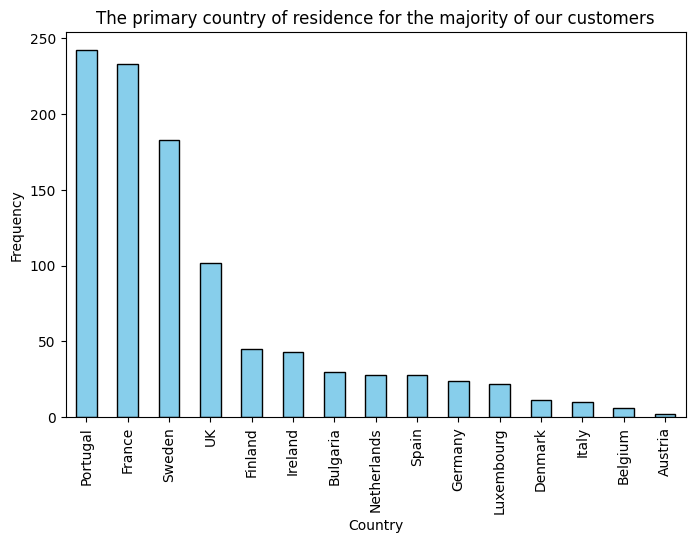

In [65]:
# Create a bar plot for the frequencies
plt.figure(figsize=(8, 5))
country_frequencies.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('The primary country of residence for the majority of our customers')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()

In [66]:
#Which product category has the highest frequency of sales?

productcat_frequencies = dfs_imputed['sales_extra_variables_extra_data']['category'].value_counts()
productcat_frequencies

category
Clothing       157
Games          140
Electronics    134
Appliances     133
Books          119
Beauty         116
Smartphones     95
Outdoors        50
Accessories     36
Other           29
Name: count, dtype: int64

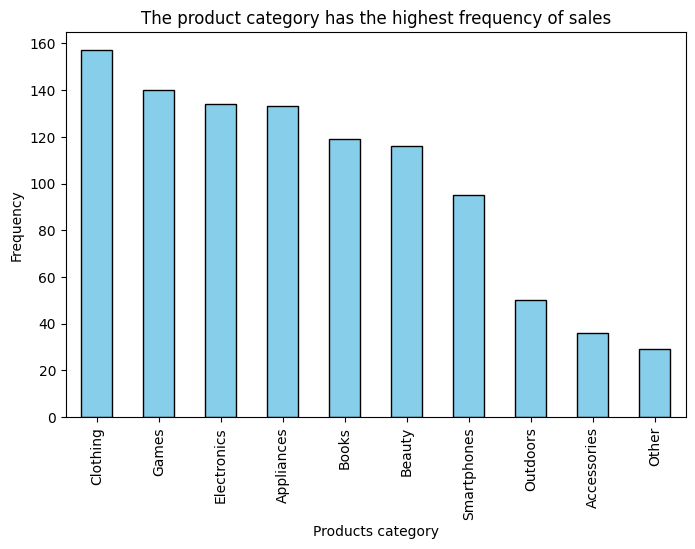

In [67]:
plt.figure(figsize=(8, 5))
productcat_frequencies.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('The product category has the highest frequency of sales')
plt.xlabel('Products category')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()

In [68]:
#Identify the top 5 customers with the most repeat purchases.

customers_frequencies = dfs_imputed['sales_extra_variables_extra_data']['customer_name'].value_counts()

In [69]:
customers_frequencies

customer_name
Johns and Sons                       143
Hessel-Stiedemann                     57
Swaniawski, Runolfsson and Green      25
Dickinson, Hyatt and Berge            24
Murray, Reichel and Nolan             23
                                    ... 
Abbott, Roberts and Torp               2
Parisian, Steuber and Satterfield      2
Lind, Mueller and Stoltenberg          1
Gorczany-Lehner                        1
Littel-Blick                           1
Name: count, Length: 75, dtype: int64

In [70]:
#Who among the sales managers has achieved the highest number of sales?

salesman_frequencies = dfs_imputed['sales_extra_variables_extra_data']['sales_manager'].value_counts()
salesman_frequencies

sales_manager
Celine Tumasian     242
Othello Bowes       233
Maxie Marrow        183
Jessamine Apark     102
Hube Corey           45
Glenine Suttaby      43
Charil Alpe          30
Denice Amberg        28
Emalia Dinse         28
Rickard Doogood      24
Ilsa Kob             22
Modestia Byfford     11
Piggy Roscrigg       10
Lambert Norheny       6
Orsa Geekin           2
Name: count, dtype: int64

In [71]:
#Who are the top 5 sales representatives with the highest number of sales?

salesrep_frequencies = dfs_imputed['sales_extra_variables_extra_data']['sales_rep'].value_counts()
salesrep_frequencies

sales_rep
Amelina Piscopiello    56
Corene Shirer          53
Hortense Gerring       52
Aurelie Wren           52
Ora Grennan            50
Crysta Halls           47
Smitty Culverhouse     44
Avrit Chanders         43
Brynn Dempster         41
Madelon Bront          40
Alyosha Meah           40
Winny Agnolo           39
Tarrah Castelletti     38
Genevra Charrisson     37
Maighdiln Upcraft      37
Anita Woakes           36
Caro Morfield          29
Nero Harbisher         28
Jay Morefield          26
Wat Bowkley            24
Casie MacBain          24
Bunnie Tonbridge       23
Jocelyn Laurentino     22
Mellicent Mattys       21
Palm Wetherald         20
Shermy McGready        15
Bernadine Fullagar     15
Perri Aldersley        13
Bertha Walbrook        10
Joshua Prevost         10
Case Desorts            6
Collin Mackness         6
Manuel Goudie           5
Cobby Andersen          5
Bank Coumbe             2
Name: count, dtype: int64

In [72]:
#Which device is predominantly used for making product purchases?

devtype_frequencies = dfs_imputed['sales_extra_variables_extra_data']['device_type'].value_counts()
devtype_frequencies

device_type
PC        790
Mobile    145
Tablet     74
Name: count, dtype: int64

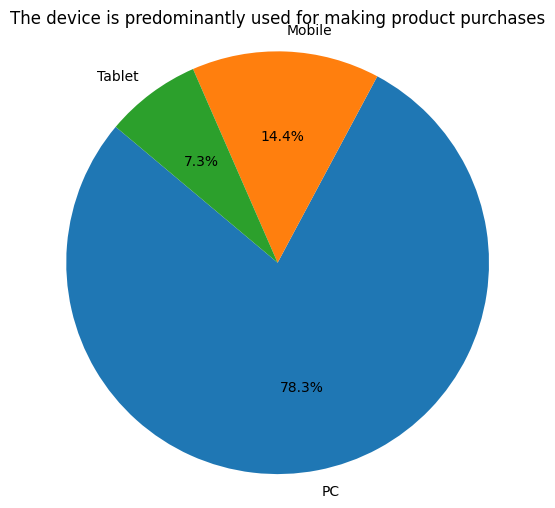

In [73]:
# Calculate relative frequencies (percentages)
devtype_percentages = (devtype_frequencies / devtype_frequencies.sum()) * 100

# Create a pie chart for the percentages
plt.figure(figsize=(6, 6))
plt.pie(devtype_percentages, labels=devtype_percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('The device is predominantly used for making product purchases')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

In [74]:
#Identify the top 3 product categories based on both order value and cost.

median_order_value = dfs_imputed['sales_extra_variables_extra_data'].groupby('category')['order_value_EUR'].median()
median_order_value.sort_values(ascending = False)

category
Accessories    139619.740
Outdoors       111875.915
Smartphones    111639.290
Games          108125.365
Clothing       103726.570
Beauty         103345.925
Appliances     100978.490
Electronics     99809.630
Books           99518.860
Other           77087.840
Name: order_value_EUR, dtype: float64

In [75]:
median_cost = dfs_imputed['sales_extra_variables_extra_data'].groupby('category')['cost'].median()
median_cost.sort_values(ascending = False)

category
Accessories    116395.415
Smartphones     96566.370
Outdoors        94660.390
Games           92756.590
Clothing        86581.390
Beauty          86442.810
Books           84761.750
Appliances      84128.530
Electronics     83245.005
Other           65894.690
Name: cost, dtype: float64

In [76]:
#Determine the top 3 customers who contribute the most to profitability and have the highest expenses.

median_customers = dfs_imputed['sales_extra_variables_extra_data'].groupby('customer_name')['order_value_EUR'].median()
median_customers.sort_values(ascending = False)

customer_name
Schuster Inc                     201573.230
Tromp LLC                        172340.860
Jacobson, Marvin and Brown       158011.300
O'Connell-Mitchell               156441.185
West-Cummings                    153823.740
                                    ...    
Rath-Schroeder                    69664.885
Homenick-Marvin                   57748.435
Lind, Mueller and Stoltenberg     57115.990
Lueilwitz, Kerluke and Lesch      54079.040
Gorczany-Lehner                   33724.530
Name: order_value_EUR, Length: 75, dtype: float64

In [77]:
median_customers_cost = dfs_imputed['sales_extra_variables_extra_data'].groupby('customer_name')['cost'].median()
median_customers_cost.sort_values(ascending = False)

customer_name
Schuster Inc                     163052.820
Jacobson, Marvin and Brown       137390.830
Tromp LLC                        136562.900
West-Cummings                    129258.090
O'Connell-Mitchell               129090.565
                                    ...    
Rath-Schroeder                    56826.990
Lind, Mueller and Stoltenberg     48976.960
Homenick-Marvin                   46504.600
Lueilwitz, Kerluke and Lesch      45031.620
Gorczany-Lehner                   26770.530
Name: cost, Length: 75, dtype: float64

In [78]:
#Which sales representative's transactions resulted in the highest amount of refunds to customers?

median_sales_rep = dfs_imputed['sales_extra_variables_extra_data'].groupby('sales_rep')['refund'].median()
median_sales_rep.sort_values(ascending = False)

sales_rep
Mellicent Mattys       65788.0
Corene Shirer          65117.0
Jay Morefield          63302.5
Winny Agnolo           60180.0
Bernadine Fullagar     59556.0
Palm Wetherald         55253.5
Jocelyn Laurentino     54422.5
Hortense Gerring       54201.5
Joshua Prevost         53876.5
Amelina Piscopiello    51615.5
Madelon Bront          50451.5
Collin Mackness        49281.5
Anita Woakes           48598.0
Brynn Dempster         48333.0
Wat Bowkley            48265.0
Shermy McGready        48238.0
Nero Harbisher         47320.5
Maighdiln Upcraft      46850.0
Genevra Charrisson     46381.0
Bertha Walbrook        46047.5
Aurelie Wren           46036.0
Avrit Chanders         45035.0
Tarrah Castelletti     43647.5
Bank Coumbe            42433.0
Alyosha Meah           41807.5
Ora Grennan            40519.0
Casie MacBain          40373.5
Crysta Halls           39735.0
Smitty Culverhouse     39691.5
Bunnie Tonbridge       38062.0
Caro Morfield          37786.0
Perri Aldersley        37358.

In [79]:
#Who are the most loyal customers of your superstore?

# Create a pivot table based on median sales, cost, and counts for each product category
pivot_table = dfs_imputed['sales_extra_variables_extra_data'].pivot_table(index='customer_name',
                             values=['order_value_EUR', 'cost'],
                             aggfunc={'order_value_EUR': 'median', 'cost': 'median', 'customer_name': 'count'})

# Rename the columns for clarity
pivot_table = pivot_table.rename(columns={'order_value_EUR': 'Median_Sales',
                                          'cost': 'Median_Cost',
                                          'customer_name': 'Count'})

# Print the pivot table
sorted_pivot_table = pivot_table.sort_values(by = 'Count', ascending = False)
top_10 = sorted_pivot_table[0:10]
top_10

Median_Cost  Count  Median_Sales
customer_name                                                     
Johns and Sons                       86694.33    143    106115.850
Hessel-Stiedemann                    79127.71     57     95960.770
Swaniawski, Runolfsson and Green     84690.35     25    100094.970
Dickinson, Hyatt and Berge           85886.10     24    104540.680
Murray, Reichel and Nolan            71501.10     23     88832.280
Rowe, Hermiston and Kessler          66065.68     22     77690.890
Larkin-Collier                      105025.33     22    129035.985
Kihn Inc                             66742.15     22     80450.080
Wisoky Inc                           94336.18     21    115226.800
Tillman and Sons                     75839.40     21     91350.760

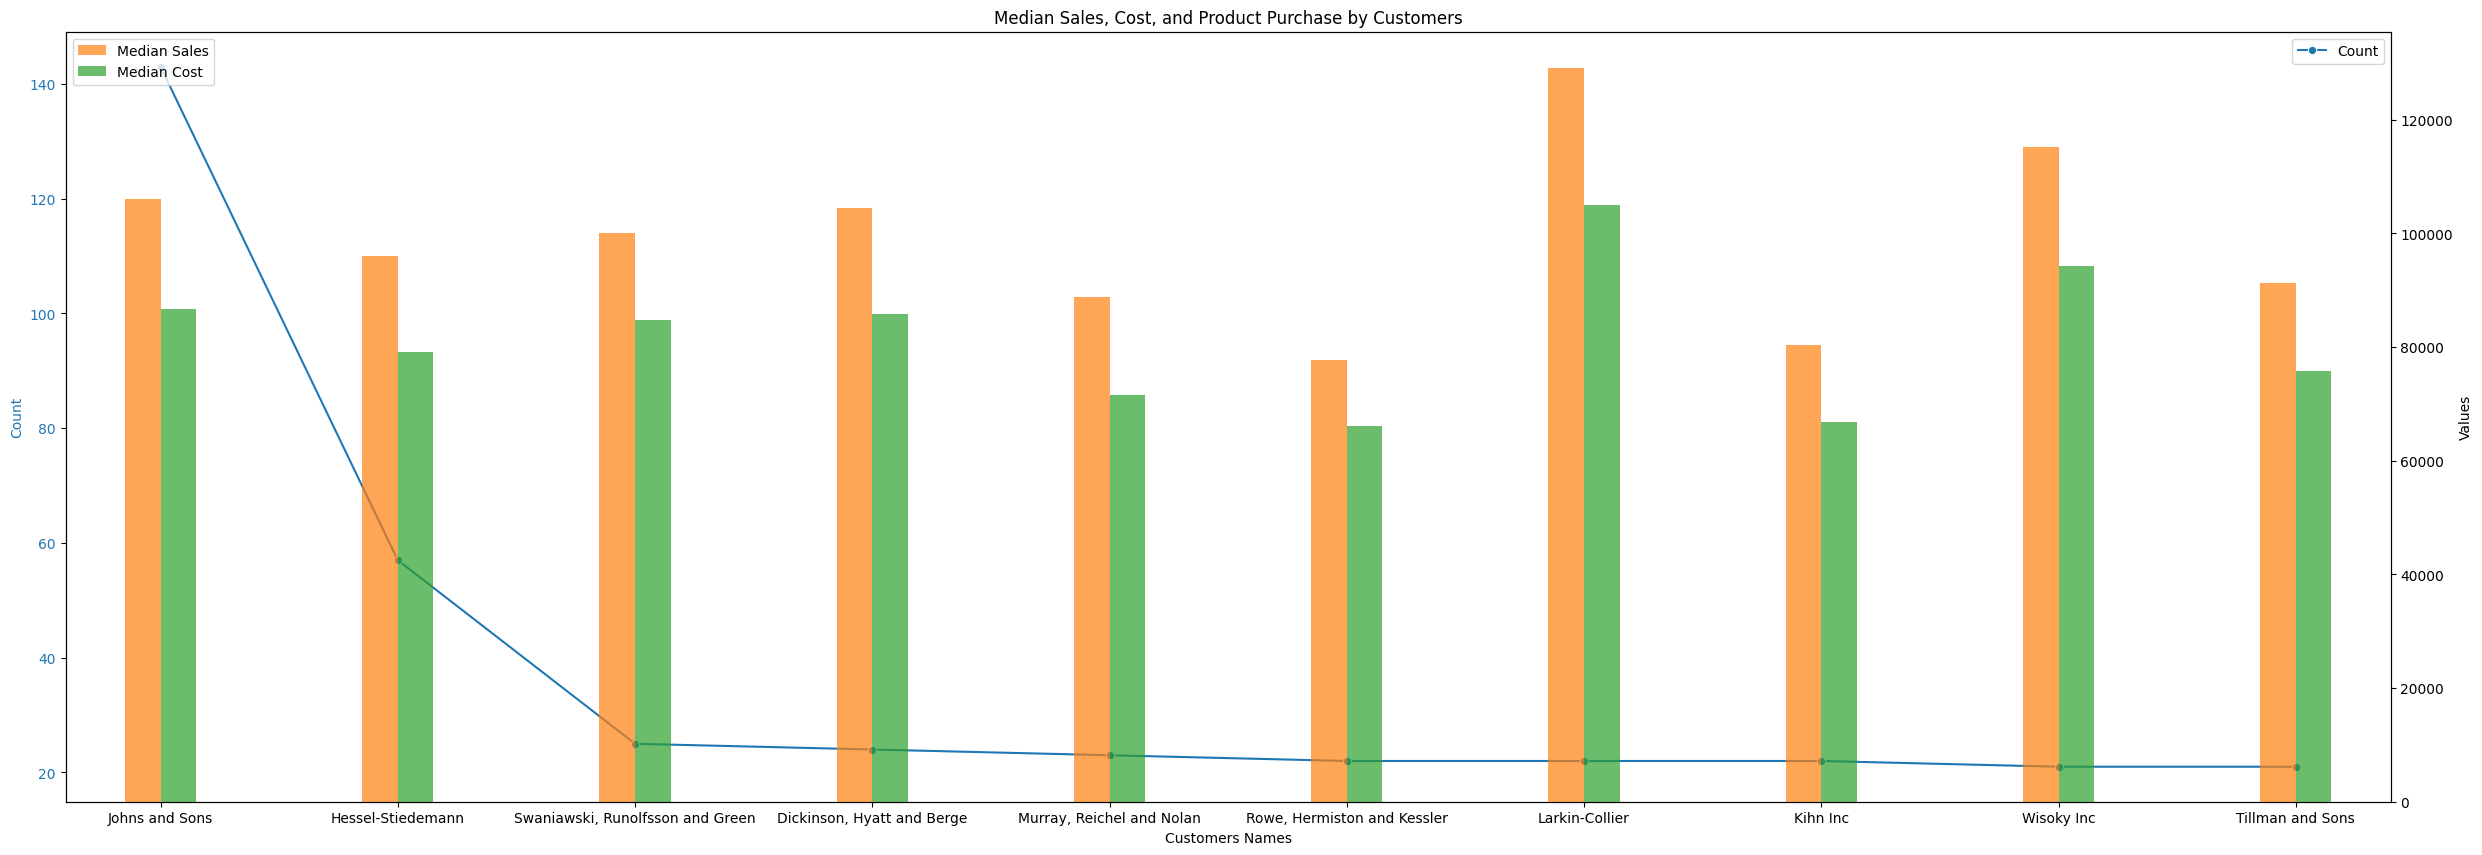

In [80]:
# Create a figure with two subplots
fig, ax1 = plt.subplots(figsize=(30, 10))

# Plot the count in a line plot
sns.lineplot(data=top_10['Count'], marker='o', ax=ax1, color='tab:blue', label='Count')
ax1.set_xlabel('Customers Names')
ax1.set_ylabel('Count', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for the bar plots
ax2 = ax1.twinx()

# Plot the median sales and median cost in bar plots
bar_plot = top_10[['Median_Sales', 'Median_Cost']].plot(kind='bar', ax=ax2, width=0.3, color=['tab:orange', 'tab:green'], alpha=0.7)
ax2.set_ylabel('Values', color='black')
ax2.tick_params(axis='y', labelcolor='black')
bar_plot.set_xticklabels(top_10.index, rotation=90, ha='center')

# Customize the plot
plt.title('Median Sales, Cost, and Product Purchase by Customers')
ax2.legend(loc='upper left', labels=['Median Sales', 'Median Cost'])

# Show the plot
plt.show()

In [81]:
#Under which sales manager, which product category has the highest sales volume?

crosstab = pd.crosstab(dfs_imputed['sales_extra_variables_extra_data']['sales_manager'], dfs_imputed['sales_extra_variables_extra_data']['category'])
crosstab

category          Accessories  Appliances  Beauty  Books  Clothing  \
sales_manager                                                        
Celine Tumasian             8          30      27     27        40   
Charil Alpe                 1           4       2      6         3   
Denice Amberg               0           2       1      4         6   
Emalia Dinse                0           1       4      1         5   
Glenine Suttaby             1           3       6      3         6   
Hube Corey                  1           8       6      2         8   
Ilsa Kob                    2           2       3      3         3   
Jessamine Apark             7          11      10     14        18   
Lambert Norheny             1           2       0      0         1   
Maxie Marrow                5          22      26     21        32   
Modestia Byfford            0           2       0      4         2   
Orsa Geekin                 0           0       0      0         0   
Othello Bowes               6          40      30     30        29   
Piggy Roscrigg              0           1       0      3         1   
Rickard Doogood             4           5       1      1         3   

category          Electronics  Games  Other  Outdoors  Smartphones  
sales_manager                                                       
Celine Tumasian            28     40      6        13           23  
Charil Alpe                 4      5      0         2            3  
Denice Amberg               4      4      0         2            5  
Emalia Dinse                7      5      2         1            2  
Glenine Suttaby             7      6      2         3            6  
Hube Corey                  5     12      1         2            0  
Ilsa Kob                    2      3      0         2            2  
Jessamine Apark             8     14      2        10            8  
Lambert Norheny             0      1      0         0            1  
Maxie Marrow               28     19      7         7           16  
Modestia Byfford            1      1      0         0            1  
Orsa Geekin                 1      1      0         0            0  
Othello Bowes              33     24      8         7           26  
Piggy Roscrigg              0      3      1         0            1  
Rickard Doogood             6      2      0         1            1

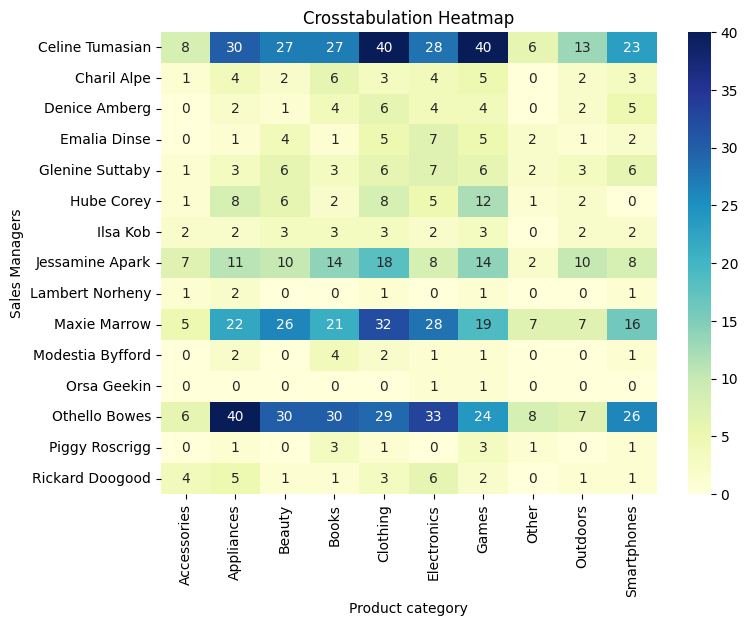

In [82]:
# Visualize the crosstabulation as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab, annot=True, cmap="YlGnBu", fmt='d', cbar=True)
plt.title('Crosstabulation Heatmap')
plt.xlabel('Product category')
plt.ylabel('Sales Managers')

# Show the plot
plt.show()

In [83]:
#In which country did a particular sales representative achieve the highest sales volume?

crosstab_sales_rep = pd.crosstab(dfs_imputed['sales_extra_variables_extra_data']['sales_rep'], dfs_imputed['sales_extra_variables_extra_data']['country'])
crosstab_sales_rep

country              Austria  Belgium  Bulgaria  Denmark  Finland  France  \
sales_rep                                                                   
Alyosha Meah               0        0         0        0        0       0   
Amelina Piscopiello        0        0         0        0        0      56   
Anita Woakes               0        0         0        0        0       0   
Aurelie Wren               0        0         0        0        0       0   
Avrit Chanders             0        0         0        0        0      43   
Bank Coumbe                2        0         0        0        0       0   
Bernadine Fullagar         0        0        15        0        0       0   
Bertha Walbrook            0        0         0        0        0       0   
Brynn Dempster             0        0         0        0        0       0   
Bunnie Tonbridge           0        0         0        0        0       0   
Caro Morfield              0        0         0        0        0       0   
Case Desorts               0        0         0        6        0       0   
Casie MacBain              0        0         0        0        0       0   
Cobby Andersen             0        0         0        5        0       0   
Collin Mackness            0        6         0        0        0       0   
Corene Shirer              0        0         0        0        0       0   
Crysta Halls               0        0         0        0        0      47   
Genevra Charrisson         0        0         0        0        0       0   
Hortense Gerring           0        0         0        0        0       0   
Jay Morefield              0        0         0        0        0       0   
Jocelyn Laurentino         0        0         0        0        0       0   
Joshua Prevost             0        0         0        0        0       0   
Madelon Bront              0        0         0        0        0       0   
Maighdiln Upcraft          0        0         0        0        0      37   
Manuel Goudie              0        0         0        0        0       0   
Mellicent Mattys           0        0         0        0       21       0   
Nero Harbisher             0        0         0        0        0       0   
Ora Grennan                0        0         0        0        0      50   
Palm Wetherald             0        0         0        0        0       0   
Perri Aldersley            0        0         0        0        0       0   
Shermy McGready            0        0        15        0        0       0   
Smitty Culverhouse         0        0         0        0        0       0   
Tarrah Castelletti         0        0         0        0        0       0   
Wat Bowkley                0        0         0        0       24       0   
Winny Agnolo               0        0         0        0        0       0   

country              Germany  Ireland  Italy  Luxembourg  Netherlands  \
sales_rep                                                               
Alyosha Meah               0        0      0           0            0   
Amelina Piscopiello        0        0      0           0            0   
Anita Woakes               0        0      0           0            0   
Aurelie Wren               0        0      0           0            0   
Avrit Chanders             0        0      0           0            0   
Bank Coumbe                0        0      0           0            0   
Bernadine Fullagar         0        0      0           0            0   
Bertha Walbrook            0        0      0           0            0   
Brynn Dempster             0        0      0           0            0   
Bunnie Tonbridge           0       23      0           0            0   
Caro Morfield              0        0      0           0            0   
Case Desorts               0        0      0           0            0   
Casie MacBain             24        0      0           0            0   
Cobby Andersen             0        0      0           

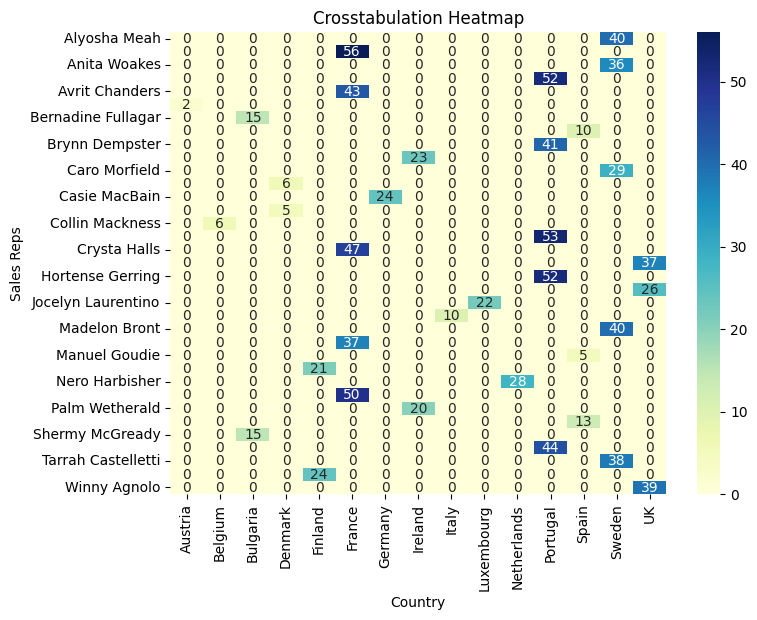

In [84]:
# Visualize the crosstabulation as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab_sales_rep, annot=True, cmap="YlGnBu", fmt='d', cbar=True)
plt.title('Crosstabulation Heatmap')
plt.xlabel('Country')
plt.ylabel('Sales Reps')

# Show the plot
plt.show()

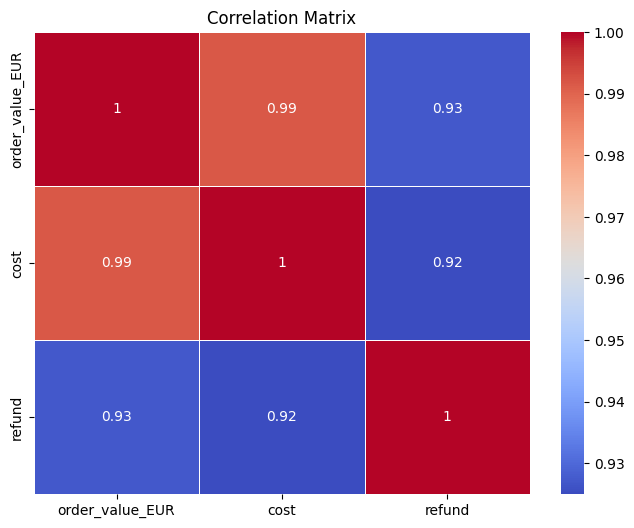

In [85]:
#Find the relationship between order value, cost and refund amount.

# Calculate the correlation matrix
correlation_matrix = dfs_imputed['sales_extra_variables_extra_data'][['order_value_EUR', 'cost', 'refund']].corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Change over time analysis
- Analyze how a measure evolves over time.
- Helps track rends and identify seasonality in your data.
- Sum(Measure) By (Date Dimension)

### Revenue Over Time (Core Business Trend)
DataFrame: fact_sales
Measure: sales_amount
Date: order_date

- How has total revenue evolved over time (monthly/yearly)?
- Is revenue growing consistently year over year?
- Are there seasonal peaks in revenue?
- Which months generate the highest revenue?
- Is revenue volatility increasing over time?
- Are there declining revenue periods?

### Sales Volume Over Time
DataFrame: fact_sales
Measure: quantity
Date: order_date

- How does total quantity sold evolve over time?
- Is growth driven by volume or price?
- Are there seasonal spikes in quantity?
- Is demand becoming more stable over time?

### Refund Trend Over Time
DataFrame: extra_data
Measure: refund
Date: date

- Are refunds increasing over time?
- Is there seasonality in refund behavior?
- Do refund spikes follow sales spikes?
- Is refund growth proportional to revenue growth?

### Cost Evolution Over Time
DataFrame: extra_data
Measure: cost
Date: date

- Is operational cost increasing over time?
- Is cost growth aligned with revenue growth?
- Are there periods where cost grows faster than revenue?

### Customer Acquisition Trend
DataFrame: dim_customers
Measure: customer_key (count)
Date: create_date

- How many customers are acquired each month?
- Is customer acquisition accelerating?
- Are there seasonal patterns in new registrations?
- Is customer growth slowing down?

### Product Launch & Performance Over Time
DataFrame: dim_products + fact_sales
Measure: sales_amount
Date: start_date or order_date

- Do newly launched products generate increasing revenue over time?
- How long does a product take to gain traction?
- Do older products lose revenue momentum?
- Is product lifecycle shortening?

### Order Processing & Logistics Trend
DataFrame: fact_sales
Measures:

- Order processing time (shipping_date - order_date)
- Delivery delay (due_date - shipping_date)
- Is delivery time improving over time?
- Are shipping delays increasing?
- Is logistics efficiency correlated with revenue growth?
- Do delays spike during high-sales periods?

### Revenue by Category Over Time
DataFrame: fact_sales + dim_products
Measure: sales_amount
Date: order_date
Dimension: category

- How does revenue evolve by category over time?
- Are some categories growing faster than others?
- Is category dominance changing?
- Are emerging categories gaining share?

### Revenue by Country Over Time
DataFrame: fact_sales + dim_customers
Measure: sales_amount
Date: order_date
Dimension: country

- Which countries are growing fastest?
- Is revenue diversification improving?
- Are we becoming dependent on fewer countries?

### Clinical Dataset (sample)

Even though not business-focused:

Measure: mean area or worst area
Compare by target over time (if time existed)

- Are tumor severity measures trending differently across target classes?
- Is there pattern difference between malignant vs benign cases?

### Strategic Business Questions from Change Over Time

- Is growth sustainable?
- Are we scaling efficiently?
- Is seasonality predictable?
- Are we facing structural decline?
- Is customer acquisition supporting revenue growth?
- Is refund growth a warning signal?
- Are costs eroding margin over time?

### Why Change Over Time Analysis Matters

It helps:

- Identify growth phases
- Detect decline early
- Reveal seasonality
- Evaluate business health
- Support forecasting
- Inform strategic planningphases
Detect decline early
Reveal seasonality
Evaluate business health
Support forecasting
Inform strategic planning

In [86]:
df = dfs_imputed["fact_sales"].copy()

# Garantir formato datetime
df["order_date"] = pd.to_datetime(df["order_date"], errors="coerce")

# Remover nulos (equivalente ao WHERE order_date IS NOT NULL)
df = df[df["order_date"].notna()]

In [87]:
year_month_analysis = (
    df
    .assign(
        order_year=df["order_date"].dt.year,
        order_month=df["order_date"].dt.month
    )
    .groupby(["order_year", "order_month"])
    .agg(
        total_sales=("sales_amount", "sum"),
        total_customers=("customer_key", "nunique"),
        total_quantity=("quantity", "sum")
    )
    .reset_index()
    .sort_values(["order_year", "order_month"])
)

year_month_analysis

order_year  order_month  total_sales  total_customers  total_quantity
0         2010           12      43419.0               14            14.0
1         2011            1     469795.0              144           144.0
2         2011            2     466307.0              144           144.0
3         2011            3     485165.0              150           150.0
4         2011            4     502042.0              157           157.0
5         2011            5     561647.0              174           174.0
6         2011            6     737793.0              230           230.0
7         2011            7     596710.0              188           188.0
8         2011            8     614516.0              193           193.0
9         2011            9     603047.0              185           185.0
10        2011           10     708164.0              221           221.0
11        2011           11     660507.0              208           208.0
12        2011           12     669395.0              222           222.0
13        2012            1     495363.0              252           252.0
14        2012            2     506992.0              260           260.0
15        2012            3     373478.0              212           212.0
16        2012            4     400324.0              219           219.0
17        2012            5     358866.0              207           207.0
18        2012            6     555142.0              318           318.0
19        2012            7     444533.0              246           246.0
20        2012            8     523887.0              294           294.0
21        2012            9     486149.0              269           269.0
22        2012           10     535125.0              313           313.0
23        2012           11     537918.0              324           324.0
24        2012           12     624454.0              354           483.0
25        2013            1     857758.0              627          1677.0
26        2013            2     771218.0             1373          3454.0
27        2013            3    1049732.0             1631          4087.0
28        2013            4    1045860.0             1564          3979.0
29        2013            5    1284456.0             1719          4400.0
30        2013            6    1642948.0             1948          5025.0
31        2013            7    1371595.0             1796          4673.0
32        2013            8    1545910.0             1898          4848.0
33        2013            9    1447324.0             1832          4616.0
34        2013           10    1673261.0             2073          5304.0
35        2013           11    1780688.0             2036          5224.0
36        2013           12    1874128.0             2133          5520.0
37        2014            1      45642.0              834          1970.0

In [88]:
monthly_analysis = (
    df
    .assign(order_date=df["order_date"].dt.to_period("M").dt.to_timestamp())
    .groupby("order_date")
    .agg(
        total_sales=("sales_amount", "sum"),
        total_customers=("customer_key", "nunique"),
        total_quantity=("quantity", "sum")
    )
    .reset_index()
    .sort_values("order_date")
)

monthly_analysis

order_date  total_sales  total_customers  total_quantity
0  2010-12-01      43419.0               14            14.0
1  2011-01-01     469795.0              144           144.0
2  2011-02-01     466307.0              144           144.0
3  2011-03-01     485165.0              150           150.0
4  2011-04-01     502042.0              157           157.0
5  2011-05-01     561647.0              174           174.0
6  2011-06-01     737793.0              230           230.0
7  2011-07-01     596710.0              188           188.0
8  2011-08-01     614516.0              193           193.0
9  2011-09-01     603047.0              185           185.0
10 2011-10-01     708164.0              221           221.0
11 2011-11-01     660507.0              208           208.0
12 2011-12-01     669395.0              222           222.0
13 2012-01-01     495363.0              252           252.0
14 2012-02-01     506992.0              260           260.0
15 2012-03-01     373478.0              212           212.0
16 2012-04-01     400324.0              219           219.0
17 2012-05-01     358866.0              207           207.0
18 2012-06-01     555142.0              318           318.0
19 2012-07-01     444533.0              246           246.0
20 2012-08-01     523887.0              294           294.0
21 2012-09-01     486149.0              269           269.0
22 2012-10-01     535125.0              313           313.0
23 2012-11-01     537918.0              324           324.0
24 2012-12-01     624454.0              354           483.0
25 2013-01-01     857758.0              627          1677.0
26 2013-02-01     771218.0             1373          3454.0
27 2013-03-01    1049732.0             1631          4087.0
28 2013-04-01    1045860.0             1564          3979.0
29 2013-05-01    1284456.0             1719          4400.0
30 2013-06-01    1642948.0             1948          5025.0
31 2013-07-01    1371595.0             1796          4673.0
32 2013-08-01    1545910.0             1898          4848.0
33 2013-09-01    1447324.0             1832          4616.0
34 2013-10-01    1673261.0             2073          5304.0
35 2013-11-01    1780688.0             2036          5224.0
36 2013-12-01    1874128.0             2133          5520.0
37 2014-01-01      45642.0              834          1970.0

In [89]:
formatted_analysis = (
    df
    .assign(order_date=df["order_date"].dt.strftime("%Y-%b"))
    .groupby("order_date")
    .agg(
        total_sales=("sales_amount", "sum"),
        total_customers=("customer_key", "nunique"),
        total_quantity=("quantity", "sum")
    )
    .reset_index()
    .sort_values("order_date")
)

formatted_analysis

order_date  total_sales  total_customers  total_quantity
0    2010-Dec      43419.0               14            14.0
1    2011-Apr     502042.0              157           157.0
2    2011-Aug     614516.0              193           193.0
3    2011-Dec     669395.0              222           222.0
4    2011-Feb     466307.0              144           144.0
5    2011-Jan     469795.0              144           144.0
6    2011-Jul     596710.0              188           188.0
7    2011-Jun     737793.0              230           230.0
8    2011-Mar     485165.0              150           150.0
9    2011-May     561647.0              174           174.0
10   2011-Nov     660507.0              208           208.0
11   2011-Oct     708164.0              221           221.0
12   2011-Sep     603047.0              185           185.0
13   2012-Apr     400324.0              219           219.0
14   2012-Aug     523887.0              294           294.0
15   2012-Dec     624454.0              354           483.0
16   2012-Feb     506992.0              260           260.0
17   2012-Jan     495363.0              252           252.0
18   2012-Jul     444533.0              246           246.0
19   2012-Jun     555142.0              318           318.0
20   2012-Mar     373478.0              212           212.0
21   2012-May     358866.0              207           207.0
22   2012-Nov     537918.0              324           324.0
23   2012-Oct     535125.0              313           313.0
24   2012-Sep     486149.0              269           269.0
25   2013-Apr    1045860.0             1564          3979.0
26   2013-Aug    1545910.0             1898          4848.0
27   2013-Dec    1874128.0             2133          5520.0
28   2013-Feb     771218.0             1373          3454.0
29   2013-Jan     857758.0              627          1677.0
30   2013-Jul    1371595.0             1796          4673.0
31   2013-Jun    1642948.0             1948          5025.0
32   2013-Mar    1049732.0             1631          4087.0
33   2013-May    1284456.0             1719          4400.0
34   2013-Nov    1780688.0             2036          5224.0
35   2013-Oct    1673261.0             2073          5304.0
36   2013-Sep    1447324.0             1832          4616.0
37   2014-Jan      45642.0              834          1970.0

# Cumulative analysis
- Aggregate the data progressively ove time.
- Helps o understand whether our business is growing or decining.
- Example
- Sum(Cumulative Measure) by (Date dimension)

### Cumulative Revenue Growth
DataFrame: fact_sales
Measure: sales_amount
Date: order_date

- How does cumulative revenue evolve month over month?
- Is cumulative revenue accelerating or flattening?
- Does cumulative revenue show consistent growth?
- Are there inflection points in cumulative sales?
- Is business growth linear or exponential?

### Cumulative Sales Volume
DataFrame: fact_sales
Measure: quantity
Date: order_date

- How does cumulative quantity sold grow over time?
- Is volume growth consistent?
- Does cumulative volume growth match revenue growth?
- Are we growing through higher volume or higher prices?

### Cumulative Customer Acquisition
DataFrame: dim_customers
Measure: COUNT(customer_key)
Date: create_date

- How does cumulative customer acquisition evolve?
- Is customer base growth accelerating?
- Are we reaching a saturation point?
- Is revenue growth aligned with customer growth?

### Cumulative Revenue by Category
DataFrame: fact_sales + dim_products
Measure: sales_amount
Date: order_date
Dimension: category

- Which category drives cumulative revenue growth?
- Are some categories growing faster cumulatively?
- Is category dominance changing over time?
- Do new categories gain cumulative share?

### Cumulative Revenue by Country
DataFrame: fact_sales + dim_customers
Measure: sales_amount
Date: order_date
Dimension: country

- Which countries contribute most to cumulative growth?
- Is growth geographically diversified?
- Are we becoming dependent on one country?

### Cumulative Refund Impact
DataFrame: extra_data
Measure: refund
Date: date

- How does cumulative refund amount evolve?
- Is cumulative refund growth proportional to revenue growth?
- Are refunds increasing faster than sales?
- Is refund trend a warning signal?

### Cumulative Cost Growth
DataFrame: extra_data
Measure: cost
Date: date

- Is cumulative cost increasing faster than cumulative revenue?
- Are margins improving or shrinking over time?
- Is cost growth sustainable?

### Product Lifecycle Cumulative Analysis
DataFrame: fact_sales + dim_products
Measure: sales_amount
Date: order_date
Dimension: product_line

- Which product lines show the strongest cumulative growth?
- Do newly launched products show accelerating cumulative revenue?
- Do older products plateau over time?

### Cumulative Revenue per Customer
DataFrame: fact_sales
Measure: sales_amount
Date: order_date
Dimension: customer_key

- How does cumulative revenue per customer evolve?
- Are high-value customers increasing over time?
- Is customer lifetime value increasing?

### Operational Efficiency (Cumulative Orders)
DataFrame: fact_sales
Measure: COUNT(order_number)
Date: order_date

- How does cumulative number of orders grow?
- Is order growth accelerating?
- Are we improving conversion over time?

### Strategic Business Insights from Cumulative Analysis

Cumulative analysis helps answer:

- Is the business truly growing?
- Is growth stable or volatile?
- Is customer acquisition sustainable?
- Are refunds eroding long-term growth?
- Is margin improving over time?
- Are we scaling efficiently?
- Are we hitting maturity?

### Executive-Level Questions

Is cumulative revenue outpacing cumulative cost?
- Is cumulative revenue outpacing cumulative cost?
- Is customer growth supporting revenue growth?
- Are we compounding growth year over year?
- Is the business entering a plateau phase?

In [90]:
# Copiar dataframe
df = dfs_imputed["fact_sales"].copy()

# Garantir datetime
df["order_date"] = pd.to_datetime(df["order_date"], errors="coerce")

# Remover datas nulas
df = df[df["order_date"].notna()]

# Equivalente ao subquery (DATETRUNC(year))
yearly = (
    df
    .assign(order_date=df["order_date"].dt.to_period("Y").dt.to_timestamp())
    .groupby("order_date")
    .agg(
        total_sales=("sales_amount", "sum"),
        avg_price=("price", "mean")
    )
    .reset_index()
    .sort_values("order_date")
)

# Running Total (SUM() OVER ORDER BY)
yearly["running_total_sales"] = yearly["total_sales"].cumsum()

# Moving Average (AVG() OVER ORDER BY)
yearly["moving_average_price"] = yearly["avg_price"].expanding().mean()

yearly

order_date  total_sales    avg_price  running_total_sales  \
0 2010-01-01      43419.0  3101.357143              43419.0   
1 2011-01-01    7075088.0  3192.729242            7118507.0   
2 2012-01-01    5842231.0  1719.820724           12960738.0   
3 2013-01-01   16344878.0   309.657421           29305616.0   
4 2014-01-01      45642.0    23.168528           29351258.0   

   moving_average_price  
0           3101.357143  
1           3147.043192  
2           2671.302370  
3           2080.891132  
4           1669.346612

# Performance analysis
- Comparing the current value to a target value.
- Helps measure success and compare performance.
- Example:
- Current(Measure) - Target(Measure)

### Revenue Performance
DataFrame: fact_sales
Measure: sales_amount

- Is current revenue meeting the monthly target?
- What is the revenue gap vs target by year?
- Which product category exceeded its revenue target?
- Which country is underperforming against sales goals?
- Are we achieving expected growth rates?
- What is the revenue variance vs forecast?

Business insight:
Identifica áreas que precisam de ação imediata.

### Sales Volume Performance
DataFrame: fact_sales
Measure: quantity

- Is current sales volume aligned with projections?
- Which products are below expected volume?
- Are high-cost products underperforming in units sold?
- Are we compensating lower volume with higher price?

### Price Performance
DataFrame: fact_sales
Measure: price

- Is average selling price above or below target?
- Are discounts reducing margin?
- Are premium products achieving expected pricing?
- Is pricing strategy aligned with revenue goals?

### Customer Acquisition Performance
DataFrame: dim_customers
Measure: COUNT(customer_key)
Date: create_date

- Are we acquiring customers at the planned rate?
- Is customer growth below forecast?
- Which country is missing acquisition targets?
- Is acquisition accelerating or slowing?

### Customer Revenue Performance
DataFrame: fact_sales

- Are top customers meeting expected revenue contribution?
- Is revenue per customer above benchmark?
- Are high-value customers increasing?
- Is churn affecting revenue performance?

### Product Performance vs Target
DataFrame: fact_sales + dim_products

- Which product lines are below sales targets?
- Are newly launched products reaching expected performance?
- Are low-cost products meeting margin expectations?
- Which category is exceeding expectations?

### Cost & Margin Performance
DataFrame: dim_products + extra_data

- Is cost growth exceeding planned budget?
- Is margin meeting strategic targets?
- Are refunds reducing expected profitability?
- Is operational cost aligned with revenue growth?

### Refund Performance
DataFrame: extra_data

- Is refund rate above acceptable threshold?
- Which category exceeds refund tolerance?
- Are refund trends worsening?
- Is refund cost impacting profitability target?

### Sales Team Performance
DataFrame: sales

- Are sales reps meeting revenue quotas?
- Which manager is exceeding targets?
- Who is underperforming against quota?
- Is performance evenly distributed across team?

### Country Performance
DataFrame: sales + fact_sales

- Which countries are below growth target?
- Is international expansion meeting expectations?
- Are certain regions declining?

### Portfolio Efficiency Performance
DataFrame: dim_products

- Are high-cost products generating expected return?
- Are some product lines failing to meet ROI targets?
- Should underperforming products be discontinued?

### Strategic Executive-Level Questions

- Is overall business performance aligned with strategic goals?
- Are we overachieving revenue but underachieving margin?
- Is growth sustainable relative to cost structure?
- Are performance gaps structural or temporary?
- Where should leadership intervene?

### Performance Analysis Mindset

Perguntas-chave sempre seguem estrutura:

- What is the current value?
- What was the target?
- What is the variance?
- Why is there a gap?
- What action should be taken?

### Example

- Revenue Gap = Current Revenue – Target Revenue
- Refund Variance = Actual Refund – Acceptable Refund Threshold
- Customer Growth Gap = Actual New Customers – Forecasted New Customers

In [91]:
# Carregar dataframes
df_fact = dfs_imputed["fact_sales"].copy()
df_products = dfs_imputed["dim_products"].copy()

# Garantir datetime
df_fact["order_date"] = pd.to_datetime(df_fact["order_date"], errors="coerce")

# Remover nulos
df_fact = df_fact[df_fact["order_date"].notna()]

# 1 Yearly product sales (equivalente à CTE)
yearly_product_sales = (
    df_fact
    .merge(df_products[["product_key", "product_name"]], 
           on="product_key", how="left")
    .assign(order_year=df_fact["order_date"].dt.year)
    .groupby(["order_year", "product_name"])["sales_amount"]
    .sum()
    .reset_index(name="current_sales")
)

# 2 Average sales per product (PARTITION BY product_name)
yearly_product_sales["avg_sales"] = (
    yearly_product_sales
    .groupby("product_name")["current_sales"]
    .transform("mean")
)

# Difference vs average
yearly_product_sales["diff_avg"] = (
    yearly_product_sales["current_sales"] 
    - yearly_product_sales["avg_sales"]
)

# Above / Below Avg
yearly_product_sales["avg_change"] = yearly_product_sales["diff_avg"].apply(
    lambda x: "Above Avg" if x > 0 
    else ("Below Avg" if x < 0 else "Avg")
)

# 3 Year-over-Year (LAG equivalent)
yearly_product_sales = yearly_product_sales.sort_values(
    ["product_name", "order_year"]
)

yearly_product_sales["py_sales"] = (
    yearly_product_sales
    .groupby("product_name")["current_sales"]
    .shift(1)
)

yearly_product_sales["diff_py"] = (
    yearly_product_sales["current_sales"] 
    - yearly_product_sales["py_sales"]
)

yearly_product_sales["py_change"] = yearly_product_sales["diff_py"].apply(
    lambda x: "Increase" if x > 0 
    else ("Decrease" if x < 0 else "No Change")
)

# Ordenar resultado final
final_result = yearly_product_sales.sort_values(
    ["product_name", "order_year"]
)

final_result

order_year                product_name  current_sales  avg_sales  \
49       2012.0                AWC Logo Cap           72.0     6570.0   
132      2013.0                AWC Logo Cap        18891.0     6570.0   
234      2014.0                AWC Logo Cap          747.0     6570.0   
50       2012.0      All-Purpose Bike Stand          159.0    13197.0   
133      2013.0      All-Purpose Bike Stand        37683.0    13197.0   
..          ...                         ...            ...        ...   
283      2014.0  Women's Mountain Shorts- L         1540.0    12705.0   
232      2013.0  Women's Mountain Shorts- M        23310.0    12285.0   
284      2014.0  Women's Mountain Shorts- M         1260.0    12285.0   
233      2013.0  Women's Mountain Shorts- S        20160.0    10605.0   
285      2014.0  Women's Mountain Shorts- S         1050.0    10605.0   

     diff_avg avg_change  py_sales  diff_py  py_change  
49    -6498.0  Below Avg       NaN      NaN  No Change  
132   12321.0  Above Avg      72.0  18819.0   Increase  
234   -5823.0  Below Avg   18891.0 -18144.0   Decrease  
50   -13038.0  Below Avg       NaN      NaN  No Change  
133   24486.0  Above Avg     159.0  37524.0   Increase  
..        ...        ...       ...      ...        ...  
283  -11165.0  Below Avg   23870.0 -22330.0   Decrease  
232   11025.0  Above Avg       NaN      NaN  No Change  
284  -11025.0  Below Avg   23310.0 -22050.0   Decrease  
233    9555.0  Above Avg       NaN      NaN  No Change  
285   -9555.0  Below Avg   20160.0 -19110.0   Decrease  

[286 rows x 9 columns]

# Part-to-Whole
- Analyze how an individual aprt is performing comapred to the overrall, allowing us to understand which category has the greatest impact on the business

### Revenue Contribution Analysis
DataFrame: fact_sales
Measure: sales_amount

- What percentage of total revenue comes from each product?
- Which category contributes the highest share of total revenue?
- What is the revenue share by product line?
- What percentage of total revenue comes from the top 10 products?
- Do 20% of products generate 80% of revenue (Pareto principle)?
- What is each country's share of total revenue?
- What percentage of revenue comes from the top 5 customers?
- How much revenue is generated by each sales rep as a share of total revenue?

Business insight:
Identifica concentração de receita e risco estrutural.

### Volume Contribution (Sales Quantity)
DataFrame: fact_sales
Measure: quantity

- What percentage of total units sold comes from each category?
- Which product contributes most to total volume?
- Does high volume correspond to high revenue share?
- Which country contributes most to total sales volume?

### Refund Impact Share
DataFrame: extra_data
Measure: refund

- What percentage of total refunds comes from each category?
- Which product accounts for the highest refund share?
- Which country contributes most to refund losses?
- What share of total revenue is lost to refunds?

Business insight:
Identifica categorias que prejudicam margem.

### Cost Structure Contribution
DataFrame: dim_products
Measure: cost

- What percentage of total cost is driven by each product line?
- Which category accounts for most of the cost base?
- Is cost concentration aligned with revenue concentration?
- Which products contribute heavily to cost but little to revenue?

### Customer Contribution Analysis
DataFrame: fact_sales + dim_customers

- What percentage of revenue comes from each customer segment (gender, marital status)?
- What share of total revenue comes from top 5% customers?
- Is revenue evenly distributed or concentrated?
- Which country contributes the largest share of active customers?

### Portfolio Impact Analysis
DataFrame: fact_sales + dim_products

- What share of total revenue comes from each product line?
- Do a few subcategories dominate the portfolio?
- Are new products increasing their share of total revenue?
- Which categories have declining share over time?

### Sales Team Contribution
DataFrame: sales

- What percentage of total sales is generated by each sales manager?
- Is revenue concentrated in a few sales reps?
- Which rep contributes the largest share of company revenue?

### Device Contribution Analysis
DataFrame: sales

- What percentage of revenue comes from mobile vs desktop?
- Is mobile share increasing over time?
- Does one channel dominate revenue generation?

### Geographic Contribution
DataFrame: sales or dim_customers

- What percentage of total revenue comes from each country?
- Are we dependent on one primary market?
- Is geographic diversification improving?

### Clinical Dataset (sample)

- Even though not business-oriented:
- What percentage of cases are malignant vs benign?
- Which morphological measures contribute most to classification separation?

### Strategic Executive Questions

- Is revenue highly concentrated?
- What part of the business sustains most of the value?
- Are we exposed to concentration risk?
- Which categories have disproportionate impact?
- Where should we allocate resources?
- Which areas should be optimized or reduced?

### Why Part-to-Whole Analysis Matters

It helps to:

- Detect excessive dependency
- Identify the real business drivers
- Prioritize investments
- Reduce structural risk
- Apply Pareto analysis (80/20)
- Understand the true impact of each segment

In [92]:
category_sales = (
    df_fact
    .merge(df_products[["product_key", "category"]],
           on="product_key",
           how="left")
    .groupby("category", as_index=False)["sales_amount"]
    .sum()
    .rename(columns={"sales_amount": "total_sales"})
)

overall = category_sales["total_sales"].sum()

category_sales = (
    category_sales
    .assign(
        overall_sales=overall,
        percentage_of_total=lambda x: 
            (x["total_sales"] / overall * 100).round(2)
    )
    .sort_values("total_sales", ascending=False)
)

category_sales

category  total_sales  overall_sales  percentage_of_total
1        Bikes   28311657.0     29351258.0                96.46
0  Accessories     699909.0     29351258.0                 2.38
2     Clothing     339692.0     29351258.0                 1.16

# Data Segmentation
- Group the data absed on a specific range
- helps understand the correlation between two measures
- Example
- (Measure) By (Measure)

### Revenue Segmentation by Price Range
DataFrame: fact_sales
Measures: sales_amount, price

- How does total revenue vary across price ranges?
- Do higher-priced products generate proportionally more revenue?
- Is revenue concentrated in low, mid, or high price bands?
-Does price range influence quantity sold?

- segmentation example:

- Low price (< 50)

- Mid price (50–200)

- High price (> 200)

### Revenue by Quantity Segments
DataFrame: fact_sales
Measures: sales_amount, quantity

- How does revenue vary by order size?
- Do large-quantity orders contribute disproportionately to revenue?
- Is revenue driven by high volume or high price?
- segmentation example:
- Small orders (1–5 units)
- Medium orders (6–20)
- Large orders (> 20)

### Refund by Revenue Segments
DataFrame: extra_data
Measures: refund, order_value_EUR

- Are higher-value orders more likely to be refunded?
- Does refund percentage increase with order value?
- Which revenue segment generates most refund losses?

### Customer Revenue Segmentation
DataFrame: fact_sales
Measures: sales_amount (aggregated per customer)

- How is total revenue distributed across customer value segments?
- What percentage of customers fall into low, medium, and high-value tiers?
- Do high-value customers grow faster over time?

- example segmentation:

- Low-value customers (< $1,000)
- Mid-value customers ($1,000–$10,000)
- High-value customers (> $10,000)

### Cost vs Revenue Segmentation
DataFrame: dim_products + fact_sales
Measures: cost, sales_amount

- How does revenue behave across different cost segments?
- Are high-cost products generating proportional revenue?
- Is margin higher in specific cost bands?

### Category Revenue vs Quantity Segmentation
DataFrame: fact_sales + dim_products
Measures: sales_amount, quantity

- Do high-volume categories generate high revenue?
- Are some categories high-volume but low-revenue?
- Is there correlation between volume and revenue?

### Sales Performance by Customer Demographics
DataFrame: fact_sales + dim_customers
Measures: sales_amount, quantity
Segments: gender, marital_status

- Does revenue differ significantly by gender?
- Do married customers spend more than single customers?
- Is order size different across demographic groups?

### Country Revenue Segmentation
DataFrame: fact_sales + dim_customers

- Are high-revenue countries also high-volume countries?
- Is average order value higher in specific regions?
- Does refund behavior differ by country revenue tier?

### Device Revenue Segmentation
DataFrame: sales

- Does mobile generate smaller but more frequent purchases?
- Is desktop associated with higher average order value?
- Which device segment drives higher revenue per transaction?

### Product Performance Segmentation
DataFrame: fact_sales + dim_products

- Do premium products generate higher cumulative revenue?
- Are some subcategories high price but low volume?
- Which product segments show strongest growth?

### Clinical Dataset Segmentation (sample)
Measures: mean area, worst concavity
Segment: target

- Do malignant cases have significantly higher concavity values?
- Is area strongly correlated with tumor classification?
- Which morphological measures show strongest separation?

### Strategic Business Questions from Segmentation

- Is revenue driven by price or volume?
- Are refunds correlated with high-value orders?
- Which segment is most profitable?
- Are we targeting the right customer tier?
- Which cost band yields highest return?
- Where should we focus marketing efforts?

### Why Data Segmentation Matters

It helps to:

- Identify hidden patterns
- Understand correlations between metrics
- Detect optimization opportunities
- Adjust pricing strategy
- Refine customer segmentation
- Improve resource allocation

In [93]:
df_products = dfs_imputed["dim_products"].copy()

# Garantir que cost é float
df_products["cost"] = df_products["cost"].astype(float)

# Criar segmentação
df_products["cost_range"] = pd.cut(
    df_products["cost"],
    bins=[-float("inf"), 100, 500, 1000, float("inf")],
    labels=["Below 100", "100-500", "500-1000", "Above 1000"]
)

# Contar produtos por segmento
product_segments = (
    df_products
    .groupby("cost_range")["product_key"]
    .count()
    .reset_index(name="total_products")
    .sort_values("total_products", ascending=False)
)

product_segments

C:\Users\User\AppData\Local\Temp\ipykernel_2888\3386294367.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("cost_range")["product_key"]


cost_range  total_products
0   Below 100             110
1     100-500             101
2    500-1000              45
3  Above 1000              39

In [94]:
df_fact = dfs_imputed["fact_sales"].copy()
df_customers = dfs_imputed["dim_customers"].copy()

# Garantir datetime
df_fact["order_date"] = pd.to_datetime(df_fact["order_date"], errors="coerce")

# Customer spending summary (equivalente à CTE)
customer_spending = (
    df_fact
    .groupby("customer_key")
    .agg(
        total_spending=("sales_amount", "sum"),
        first_order=("order_date", "min"),
        last_order=("order_date", "max")
    )
    .reset_index()
)

# Calcular lifespan em meses
customer_spending["lifespan"] = (
    (customer_spending["last_order"].dt.year - customer_spending["first_order"].dt.year) * 12 +
    (customer_spending["last_order"].dt.month - customer_spending["first_order"].dt.month)
)

# Criar segmentação
def segment_customer(row):
    if row["lifespan"] >= 12 and row["total_spending"] > 5000:
        return "VIP"
    elif row["lifespan"] >= 12 and row["total_spending"] <= 5000:
        return "Regular"
    else:
        return "New"

customer_spending["customer_segment"] = customer_spending.apply(
    segment_customer, axis=1
)

# Contar clientes por segmento
customer_segments = (
    customer_spending
    .groupby("customer_segment")["customer_key"]
    .count()
    .reset_index(name="total_customers")
    .sort_values("total_customers", ascending=False)
)

customer_segments

customer_segment  total_customers
0              New            14631
1          Regular             2198
2              VIP             1655

# BUILD CUSTOMR REPORT

In [95]:
# ============================
# 1️⃣ Base Query
# ============================

df_fact = dfs_imputed["fact_sales"].copy()
df_customers = dfs_imputed["dim_customers"].copy()

# Garantir datetime
df_fact["order_date"] = pd.to_datetime(df_fact["order_date"], errors="coerce")
df_customers["birthdate"] = pd.to_datetime(df_customers["birthdate"], errors="coerce")

# Remover pedidos sem data
df_fact = df_fact[df_fact["order_date"].notna()]

# Join
base_query = (
    df_fact
    .merge(df_customers, on="customer_key", how="left")
)

# Criar nome completo
base_query["customer_name"] = (
    base_query["first_name"] + " " + base_query["last_name"]
)

# Calcular idade
today = pd.Timestamp.today()

base_query["age"] = (
    (today - base_query["birthdate"]).dt.days // 365
)

# ============================
# 2️⃣ Customer Aggregation
# ============================

customer_aggregation = (
    base_query
    .groupby([
        "customer_key",
        "customer_number",
        "customer_name",
        "age"
    ])
    .agg(
        total_orders=("order_number", "nunique"),
        total_sales=("sales_amount", "sum"),
        total_quantity=("quantity", "sum"),
        total_products=("product_key", "nunique"),
        last_order_date=("order_date", "max"),
        first_order_date=("order_date", "min")
    )
    .reset_index()
)

# Lifespan em meses
customer_aggregation["lifespan"] = (
    (customer_aggregation["last_order_date"].dt.year -
     customer_aggregation["first_order_date"].dt.year) * 12 +
    (customer_aggregation["last_order_date"].dt.month -
     customer_aggregation["first_order_date"].dt.month)
)

# ============================
# 3️⃣ Age Group
# ============================

def age_group(age):
    if age < 20:
        return "Under 20"
    elif 20 <= age <= 29:
        return "20-29"
    elif 30 <= age <= 39:
        return "30-39"
    elif 40 <= age <= 49:
        return "40-49"
    else:
        return "50 and above"

customer_aggregation["age_group"] = customer_aggregation["age"].apply(age_group)

# ============================
# 4️⃣ Customer Segment
# ============================

def segment(row):
    if row["lifespan"] >= 12 and row["total_sales"] > 5000:
        return "VIP"
    elif row["lifespan"] >= 12 and row["total_sales"] <= 5000:
        return "Regular"
    else:
        return "New"

customer_aggregation["customer_segment"] = customer_aggregation.apply(segment, axis=1)

# ============================
# 5️⃣ Recency
# ============================

customer_aggregation["recency"] = (
    (today.year - customer_aggregation["last_order_date"].dt.year) * 12 +
    (today.month - customer_aggregation["last_order_date"].dt.month)
)

# ============================
# 6️⃣ KPIs
# ============================

# Average Order Value
customer_aggregation["avg_order_value"] = (
    customer_aggregation["total_sales"] /
    customer_aggregation["total_orders"]
).fillna(0)

# Average Monthly Spend
customer_aggregation["avg_monthly_spend"] = (
    customer_aggregation.apply(
        lambda row: row["total_sales"]
        if row["lifespan"] == 0
        else row["total_sales"] / row["lifespan"],
        axis=1
    )
)

# ============================
# Final Report
# ============================

report_customers = customer_aggregation[[
    "customer_key",
    "customer_number",
    "customer_name",
    "age",
    "age_group",
    "customer_segment",
    "last_order_date",
    "recency",
    "total_orders",
    "total_sales",
    "total_quantity",
    "total_products",
    "lifespan",
    "avg_order_value",
    "avg_monthly_spend"
]]

report_customers

customer_key customer_number      customer_name   age     age_group  \
0               1.0      AW00011000           Jon Yang  54.0  50 and above   
1               2.0      AW00011001       Eugene Huang  49.0         40-49   
2               3.0      AW00011002       Ruben Torres  55.0  50 and above   
3               4.0      AW00011003        Christy Zhu  52.0  50 and above   
4               5.0      AW00011004  Elizabeth Johnson  46.0         40-49   
...             ...             ...                ...   ...           ...   
18460       18479.0      AW00029478     Darren Carlson  61.0  50 and above   
18461       18480.0      AW00029479         Tommy Tang  56.0  50 and above   
18462       18481.0      AW00029480          Nina Raji  48.0         40-49   
18463       18482.0      AW00029481          Ivan Suri  60.0  50 and above   
18464       18483.0      AW00029482      Clayton Zhang  61.0  50 and above   

      customer_segment last_order_date  recency  total_orders  total_sales  \
0                  VIP      2013-05-03      153             3       8249.0   
1                  VIP      2013-12-10      146             3       6384.0   
2                  VIP      2013-02-23      156             3       8114.0   
3                  VIP      2013-05-10      153             3       8139.0   
4                  VIP      2013-05-01      153             3       8196.0   
...                ...             ...      ...           ...          ...   
18460              New      2013-06-26      152             1       2398.0   
18461              New      2012-09-04      161             1       2049.0   
18462              New      2013-07-17      151             1       2442.0   
18463              New      2011-08-13      174             1       3375.0   
18464              New      2012-09-18      161             1       2049.0   

       total_quantity  total_products  lifespan  avg_order_value  \
0                 8.0               8        28      2749.666667   
1                11.0              10        35      2128.000000   
2                 4.0               4        25      2704.666667   
3                 9.0               9        29      2713.000000   
4                 6.0               6        28      2732.000000   
...               ...             ...       ...              ...   
18460             3.0               3         0      2398.000000   
18461             1.0               1         0      2049.000000   
18462             5.0               5         0      2442.000000   
18463             1.0               1         0      3375.000000   
18464             1.0               1         0      2049.000000   

       avg_monthly_spend  
0             294.607143  
1             182.400000  
2             324.560000  
3             280.655172  
4             292.714286  
...                  ...  
18460        2398.000000  
18461        2049.000000  
18462        2442.000000  
18463        3375.000000  
18464        2049.000000  

[18465 rows x 15 columns]

# BUILD PRODUCTS REPORT

In [96]:
# ============================
# 1️⃣ Base Query
# ============================

df_fact = dfs_imputed["fact_sales"].copy()
df_products = dfs_imputed["dim_products"].copy()

# Garantir datetime
df_fact["order_date"] = pd.to_datetime(df_fact["order_date"], errors="coerce")

# Remover vendas sem data válida
df_fact = df_fact[df_fact["order_date"].notna()]

# Join fact + products
base_query = (
    df_fact
    .merge(df_products, on="product_key", how="left")
)

# ============================
# 2️⃣ Product Aggregations
# ============================

product_aggregations = (
    base_query
    .groupby([
        "product_key",
        "product_name",
        "category",
        "subcategory",
        "cost"
    ])
    .agg(
        first_sale_date=("order_date", "min"),
        last_sale_date=("order_date", "max"),
        total_orders=("order_number", "nunique"),
        total_customers=("customer_key", "nunique"),
        total_sales=("sales_amount", "sum"),
        total_quantity=("quantity", "sum")
    )
    .reset_index()
)

# Lifespan (months)
product_aggregations["lifespan"] = (
    (product_aggregations["last_sale_date"].dt.year -
     product_aggregations["first_sale_date"].dt.year) * 12 +
    (product_aggregations["last_sale_date"].dt.month -
     product_aggregations["first_sale_date"].dt.month)
)

# Average selling price
product_aggregations["avg_selling_price"] = (
    (product_aggregations["total_sales"] /
     product_aggregations["total_quantity"])
).round(1)

# ============================
# 3️⃣ Recency
# ============================

today = pd.Timestamp.today()

product_aggregations["recency_in_months"] = (
    (today.year - product_aggregations["last_sale_date"].dt.year) * 12 +
    (today.month - product_aggregations["last_sale_date"].dt.month)
)

# ============================
# 4️⃣ Product Segmentation
# ============================

def product_segment(total_sales):
    if total_sales > 50000:
        return "High-Performer"
    elif total_sales >= 10000:
        return "Mid-Range"
    else:
        return "Low-Performer"

product_aggregations["product_segment"] = (
    product_aggregations["total_sales"].apply(product_segment)
)

# ============================
# 5️⃣ KPIs
# ============================

# Average Order Revenue (AOR)
product_aggregations["avg_order_revenue"] = (
    product_aggregations.apply(
        lambda row: 0
        if row["total_orders"] == 0
        else row["total_sales"] / row["total_orders"],
        axis=1
    )
)

# Average Monthly Revenue
product_aggregations["avg_monthly_revenue"] = (
    product_aggregations.apply(
        lambda row: row["total_sales"]
        if row["lifespan"] == 0
        else row["total_sales"] / row["lifespan"],
        axis=1
    )
)

# ============================
# Final Report
# ============================

report_products = product_aggregations[[
    "product_key",
    "product_name",
    "category",
    "subcategory",
    "cost",
    "last_sale_date",
    "recency_in_months",
    "product_segment",
    "lifespan",
    "total_orders",
    "total_sales",
    "total_quantity",
    "total_customers",
    "avg_selling_price",
    "avg_order_revenue",
    "avg_monthly_revenue"
]]

report_products

product_key             product_name     category        subcategory  \
0            3.0   Mountain-100 Black- 38        Bikes     Mountain Bikes   
1            4.0   Mountain-100 Black- 42        Bikes     Mountain Bikes   
2            5.0   Mountain-100 Black- 44        Bikes     Mountain Bikes   
3            6.0   Mountain-100 Black- 48        Bikes     Mountain Bikes   
4            7.0  Mountain-100 Silver- 38        Bikes     Mountain Bikes   
..           ...                      ...          ...                ...   
125        291.0        Touring Tire Tube  Accessories    Tires and Tubes   
126        292.0          Classic Vest- L     Clothing              Vests   
127        293.0          Classic Vest- M     Clothing              Vests   
128        294.0          Classic Vest- S     Clothing              Vests   
129        295.0    Water Bottle - 30 oz.  Accessories  Bottles and Cages   

       cost last_sale_date  recency_in_months product_segment  lifespan  \
0    1898.0     2011-12-27                170  High-Performer        11   
1    1898.0     2011-12-27                170  High-Performer        11   
2    1898.0     2011-12-21                170  High-Performer        11   
3    1898.0     2011-12-26                170  High-Performer        12   
4    1912.0     2011-12-22                170  High-Performer        12   
..      ...            ...                ...             ...       ...   
125     2.0     2014-01-28                145   Low-Performer        13   
126    24.0     2014-01-28                145       Mid-Range        12   
127    24.0     2014-01-27                145       Mid-Range        12   
128    24.0     2014-01-28                145       Mid-Range        13   
129     2.0     2014-01-28                145       Mid-Range        13   

     total_orders  total_sales  total_quantity  total_customers  \
0              49     165375.0            49.0               49   
1              45     151875.0            45.0               45   
2              60     202500.0            60.0               60   
3              57     192375.0            57.0               57   
4              58     197200.0            58.0               58   
..            ...          ...             ...              ...   
125          1487       7435.0          1487.0             1410   
126           195      12480.0           195.0              195   
127           199      12736.0           199.0              199   
128           168      10944.0           171.0              168   
129          4244      21245.0          4249.0             4073   

     avg_selling_price  avg_order_revenue  avg_monthly_revenue  
0               3375.0        3375.000000         15034.090909  
1               3375.0        3375.000000         13806.818182  
2               3375.0        3375.000000         18409.090909  
3               3375.0        3375.000000         16031.250000  
4               3400.0        3400.000000         16433.333333  
..                 ...                ...                  ...  
125                5.0           5.000000           571.923077  
126               64.0          64.000000          1040.000000  
127               64.0          64.000000          1061.333333  
128               64.0          65.142857           841.846154  
129                5.0           5.005891          1634.230769  

[130 rows x 16 columns]

# Descriptive analysis

# DESCRIPTIVE ANALYSIS – QUESTIONS BY DATAFRAME
### DataFrame: sample (Clinical / Numerical Features Dataset)
General Distribution

- What are the mean, median, minimum, and maximum of mean radius?
- How is mean area distributed?
- What is the standard deviation of mean perimeter?
- Which variable shows the highest variability?
- How is the variable target distributed?
- What is the proportion of each class in target?
- Is there a difference in the average mean concavity by target class?
- How is worst radius distributed?
- What is the average mean smoothness per class?
- Which feature has the largest range (max - min)?

Descriptive Comparisons

- Which variables have higher averages when target = 1?
- What is the average of area error?
- How is worst concave points distributed?
- What is the descriptive correlation between mean area and mean perimeter?
- Which variables show the highest skewness?

### DataFrame: sales
Revenue and Costs

- What is the total order_value_EUR?
- What is the total cost?
- What is the total gross margin (order_value_EUR - cost)?
- What is the average order value?
- Which country generates the highest total revenue?
- Which country generates the lowest revenue?
- How are sales distributed by category?
- Which device_type generates the highest revenue?
- How many unique orders exist (order_id)?
- What is the average order value per country?

Commercial Performance

- Which sales_manager has the highest total sales?
- Which sales_rep has the highest accumulated revenue?
- What is the average sales amount per representative?
- How are sales distributed across categories?
- What is the average margin per category?

### DataFrame: extra_variable / extra_data
Refund Analysis

- What is the total value of refund?
- What is the refund rate (refund / total sales)?
- Which country has the highest refund amount?
- Which category has the highest refund volume?
- How many orders have refund > 0?
- What is the average refund value?
- How are refunds distributed by device_type?
- Which sales_rep has the highest refund volume?
- What percentage of orders include refunds?
- Which country has the lowest refund rate?

### DataFrame: fact_sales
Operational Metrics

- What is the total sales_amount?
- What is the total quantity sold (quantity)?
- What is the average price?
- What is the average sales amount per order?
- What is the average quantity per order?
- Which product_key has the highest sales volume?
- Which customer_key has the highest purchase volume?
- How is price distributed?
- What is the standard deviation of price?
- What is the average revenue per product?

### DataFrame: dim_customers
Customer Profile

- How many customers exist?
- What is the distribution of customers by country?
- What is the proportion by gender?
- What is the proportion by marital status?
- Which country has the highest number of customers?
- Is there a gender predominance by country?
- How many customers exist per country + gender combination?
- What is the distribution of customers by marital status?
- Which country has the highest customer diversity?
- What percentage of customers are married?

### DataFrame: dim_products
- Product Portfolio

- How many products exist?
- How many categories exist?
- How many subcategories exist?
- Which category has the largest number of products?
- Which subcategory has the largest number of products?
- What is the average cost per category?
- Which category has the highest average cost?
- Which product_line contains the most products?
- What are the minimum and maximum product costs?
- How are products distributed by maintenance?

### Integrated Descriptive Analysis (Star Schema)
- Revenue by Dimension

- What is the total revenue per category?
- What is the total revenue per subcategory?
- Which country generates the highest revenue?
- Which gender generates the highest revenue?
- Which marital status generates the highest revenue?
- Which product generates the highest revenue?
- Which customer generates the highest revenue?
- What is the average revenue per customer?
- What is the average revenue per product?
- How is revenue distributed by product_line?

### Distribution and Structure Analysis

- Which variable has the highest variance?
- Which variable shows the highest concentration of values?
- Which categories represent the largest percentage of total revenue?
- What are the top 10 products by revenue?
- What are the top 10 customers by revenue?
- Which country represents the highest revenue share?
- Which device_type represents the highest sales volume?
- What percentage of total sales comes from each category?
- What percentage of total sales comes from each sales_manager?
- How is quantity distributed across price ranges?

### Descriptive Efficiency Metrics

- What is the average margin per product?
- What is the average margin per category?
- Which country has the highest average margin?
- Which sales_rep has the highest average margin?
- Which device_type has the highest margin?
- Which category has the highest refund volume?
- What is the average refund per category?
- Which product has the highest average cost?
- Which customer has the highest average ticket value?
- What is the overall distribution of revenue, cost, and margin?

In [97]:
#Find the descriptives of order value, cost and refund.

numeric_columns = ['order_value_EUR', 'cost', 'refund']

# Perform descriptive analysis for the specific numeric variables
numeric_summary = dfs_imputed['sales_extra_variables_extra_data'][numeric_columns].describe()
numeric_summary

order_value_EUR           cost        refund
count      1009.000000    1009.000000   1009.000000
mean     113268.191353   94422.763518  49236.007929
std       61615.827346   51693.620772  28744.989463
min       15100.570000   12113.680000   1009.000000
25%       65760.390000   54635.770000  24597.000000
50%      105419.425000   86928.030000  48652.000000
75%      151012.120000  126080.020000  74664.000000
max      383996.760000  304701.430000  99539.000000

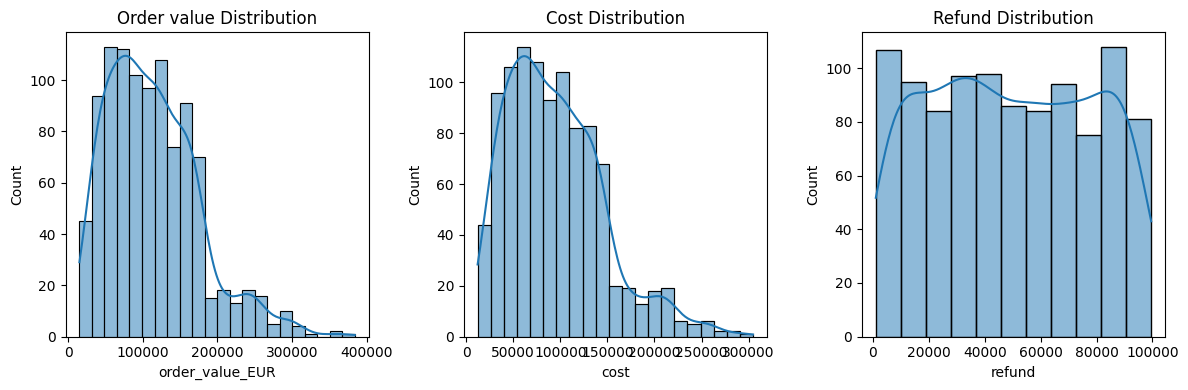

In [98]:

# Create a figure with three subplots for the numeric variables
plt.figure(figsize=(12, 4))

# Plot the distribution of 'Age' in the first subplot
plt.subplot(131)  # 1 row, 3 columns, first subplot
sns.histplot(dfs_imputed['sales_extra_variables_extra_data']['order_value_EUR'], kde=True)
plt.title('Order value Distribution')

# Plot the distribution of 'Salary' in the second subplot
plt.subplot(132)  # 1 row, 3 columns, second subplot
sns.histplot(dfs_imputed['sales_extra_variables_extra_data']['cost'], kde=True)
plt.title('Cost Distribution')

# Plot the distribution of 'Experience' in the third subplot
plt.subplot(133)  # 1 row, 3 columns, third subplot
sns.histplot(dfs_imputed['sales_extra_variables_extra_data']['refund'], kde=True)
plt.title('Refund Distribution')

# Adjust layout and show the figure
plt.tight_layout()
plt.show()

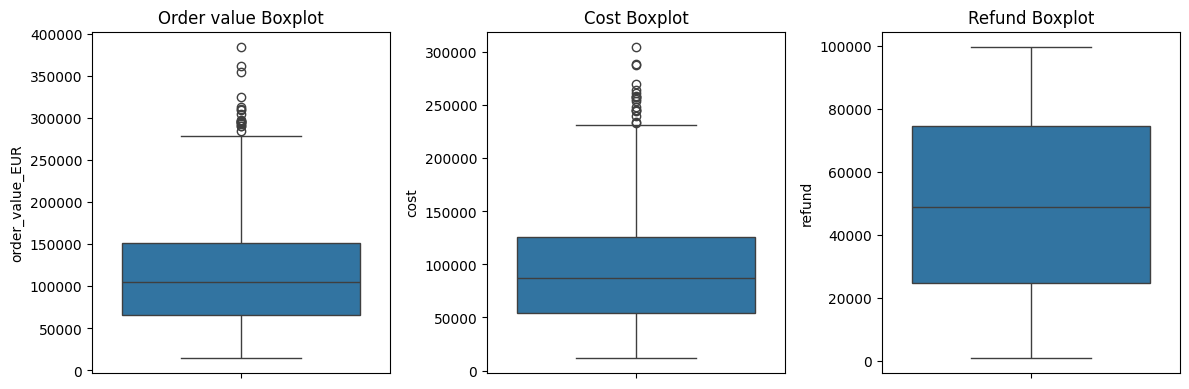

In [99]:
# Create a figure with three subplots for the boxplots
plt.figure(figsize=(12, 4))

# Plot the boxplot for 'Age' in the first subplot
plt.subplot(131)  # 1 row, 3 columns, first subplot
sns.boxplot(data=dfs_imputed['sales_extra_variables_extra_data']['order_value_EUR'])
plt.title('Order value Boxplot')

# Plot the boxplot for 'Salary' in the second subplot
plt.subplot(132)  # 1 row, 3 columns, second subplot
sns.boxplot(data=dfs_imputed['sales_extra_variables_extra_data']['cost'])
plt.title('Cost Boxplot')

# Plot the boxplot for 'Experience' in the third subplot
plt.subplot(133)  # 1 row, 3 columns, third subplot
sns.boxplot(data=dfs_imputed['sales_extra_variables_extra_data']['refund'])
plt.title('Refund Boxplot')

# Adjust layout and show the figure
plt.tight_layout()
plt.show()

# Univariate analysis

# Histogram

In [104]:
dfs_imputed.keys()

dict_keys(['sample', 'sales', 'extra_variable', 'extra_data', 'fact_sales', 'dim_customers', 'dim_products', 'sales_extra_variables', 'sales_extra_variables_extra_data'])

array([[<Axes: title={'center': 'mean radius'}>,
        <Axes: title={'center': 'mean texture'}>,
        <Axes: title={'center': 'mean perimeter'}>,
        <Axes: title={'center': 'mean area'}>,
        <Axes: title={'center': 'mean smoothness'}>],
       [<Axes: title={'center': 'mean compactness'}>,
        <Axes: title={'center': 'mean concavity'}>,
        <Axes: title={'center': 'mean concave points'}>,
        <Axes: title={'center': 'mean symmetry'}>,
        <Axes: title={'center': 'mean fractal dimension'}>],
       [<Axes: title={'center': 'radius error'}>,
        <Axes: title={'center': 'texture error'}>,
        <Axes: title={'center': 'perimeter error'}>,
        <Axes: title={'center': 'smoothness error'}>,
        <Axes: title={'center': 'compactness error'}>],
       [<Axes: title={'center': 'concavity error'}>,
        <Axes: title={'center': 'concave points error'}>,
        <Axes: title={'center': 'symmetry error'}>,
        <Axes: title={'center': 'fractal dimen

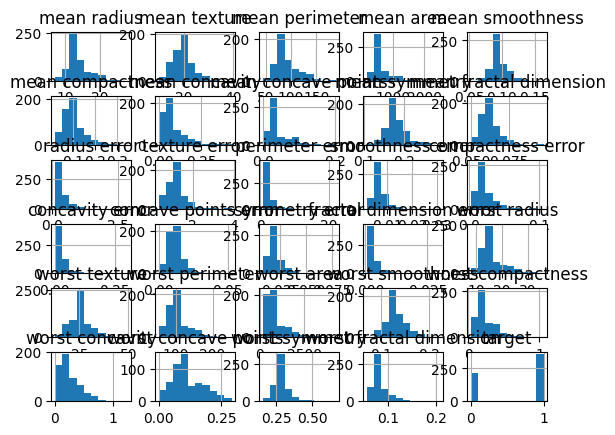

In [105]:
dfs_imputed['sample'].hist()

array([[<Axes: title={'center': 'mean radius'}>,
        <Axes: title={'center': 'mean texture'}>],
       [<Axes: title={'center': 'mean perimeter'}>,
        <Axes: title={'center': 'mean area'}>]], dtype=object)

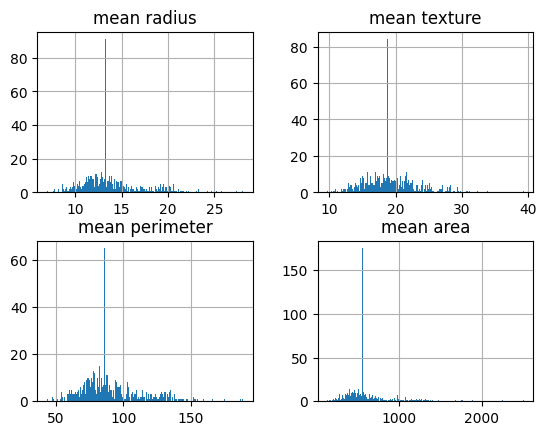

In [114]:
dfs_imputed['sample'].iloc[:,0:4].hist(bins=200)

<Axes: xlabel='area error'>

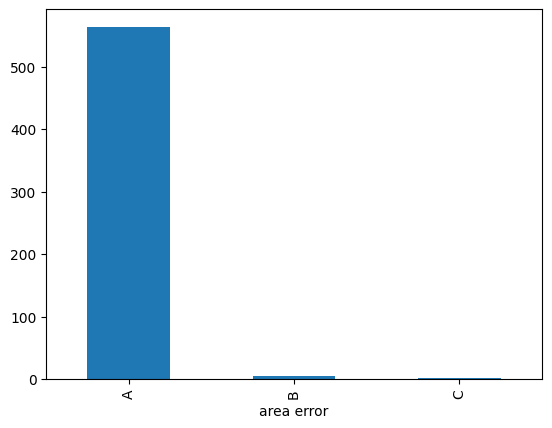

In [115]:
dfs_imputed['sample']['area error'].value_counts().plot(kind='bar')

array([[<Axes: title={'center': 'order_value_EUR'}>,
        <Axes: title={'center': 'cost'}>],
       [<Axes: title={'center': 'date'}>,
        <Axes: title={'center': 'refund'}>]], dtype=object)

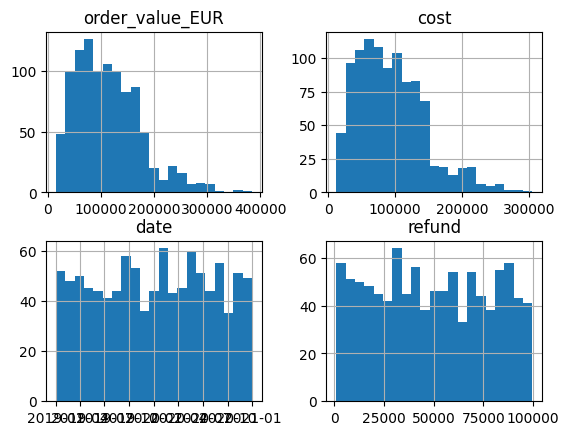

In [113]:
dfs_imputed['sales_extra_variables_extra_data'].hist(bins='rice')

array([[<Axes: title={'center': 'product_key'}>,
        <Axes: title={'center': 'customer_key'}>,
        <Axes: title={'center': 'order_date'}>],
       [<Axes: title={'center': 'shipping_date'}>,
        <Axes: title={'center': 'due_date'}>,
        <Axes: title={'center': 'sales_amount'}>],
       [<Axes: title={'center': 'quantity'}>,
        <Axes: title={'center': 'price'}>, <Axes: >]], dtype=object)

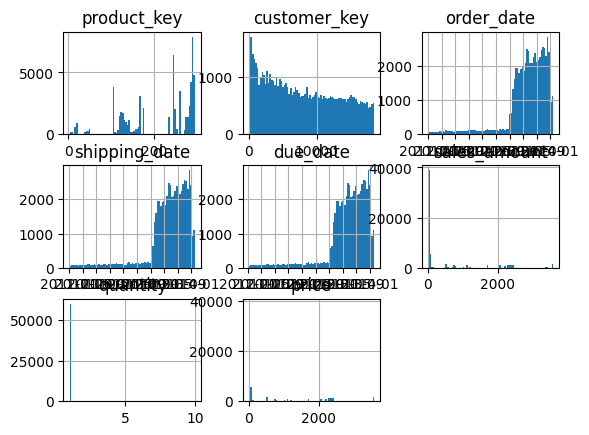

In [112]:
dfs_imputed['fact_sales'].hist(bins='rice')

array([[<Axes: title={'center': 'customer_key'}>,
        <Axes: title={'center': 'customer_id'}>],
       [<Axes: title={'center': 'birthdate'}>,
        <Axes: title={'center': 'create_date'}>]], dtype=object)

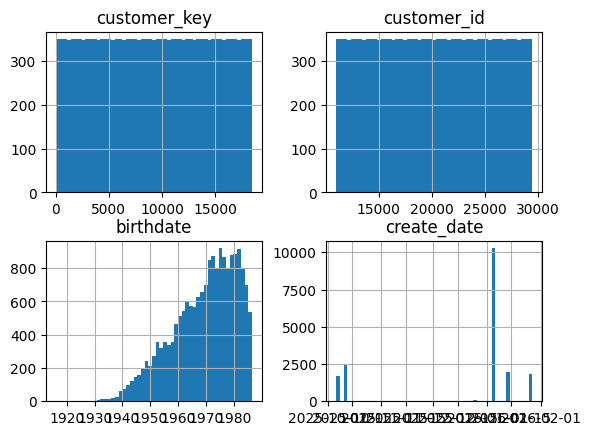

In [111]:
dfs_imputed['dim_customers'].hist(bins='rice')

array([[<Axes: title={'center': 'product_key'}>,
        <Axes: title={'center': 'product_id'}>],
       [<Axes: title={'center': 'cost'}>,
        <Axes: title={'center': 'start_date'}>]], dtype=object)

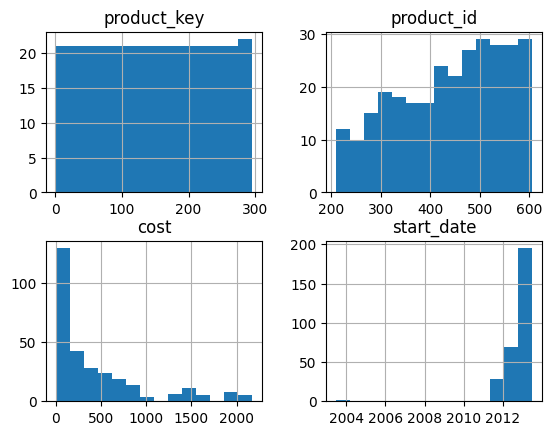

In [110]:
dfs_imputed['dim_products'].hist(bins='rice')

# Boxplots

<Axes: >

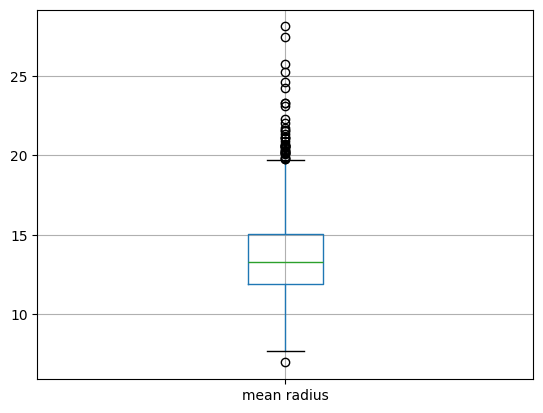

In [117]:
dfs_imputed['sample'][['mean radius']].boxplot()

array([[<Axes: title={'center': 'mean radius'}>]], dtype=object)

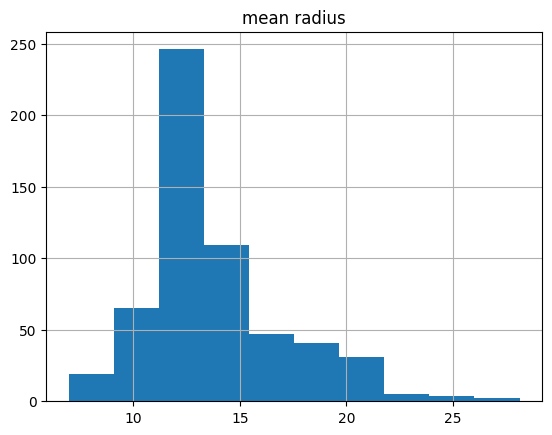

In [118]:
dfs_imputed['sample'][['mean radius']].hist()

<Axes: >

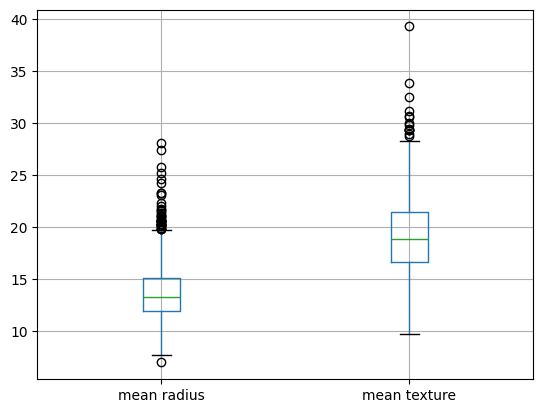

In [119]:
dfs_imputed['sample'][['mean radius', 'mean texture']].boxplot()

<Axes: >

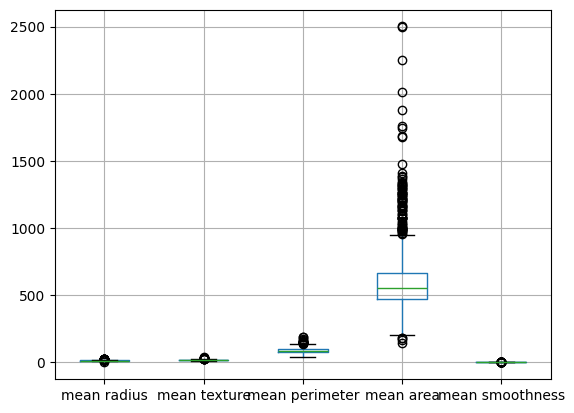

In [120]:
dfs_imputed['sample'].iloc[:, 0:5].boxplot()

# Multivariate analysis

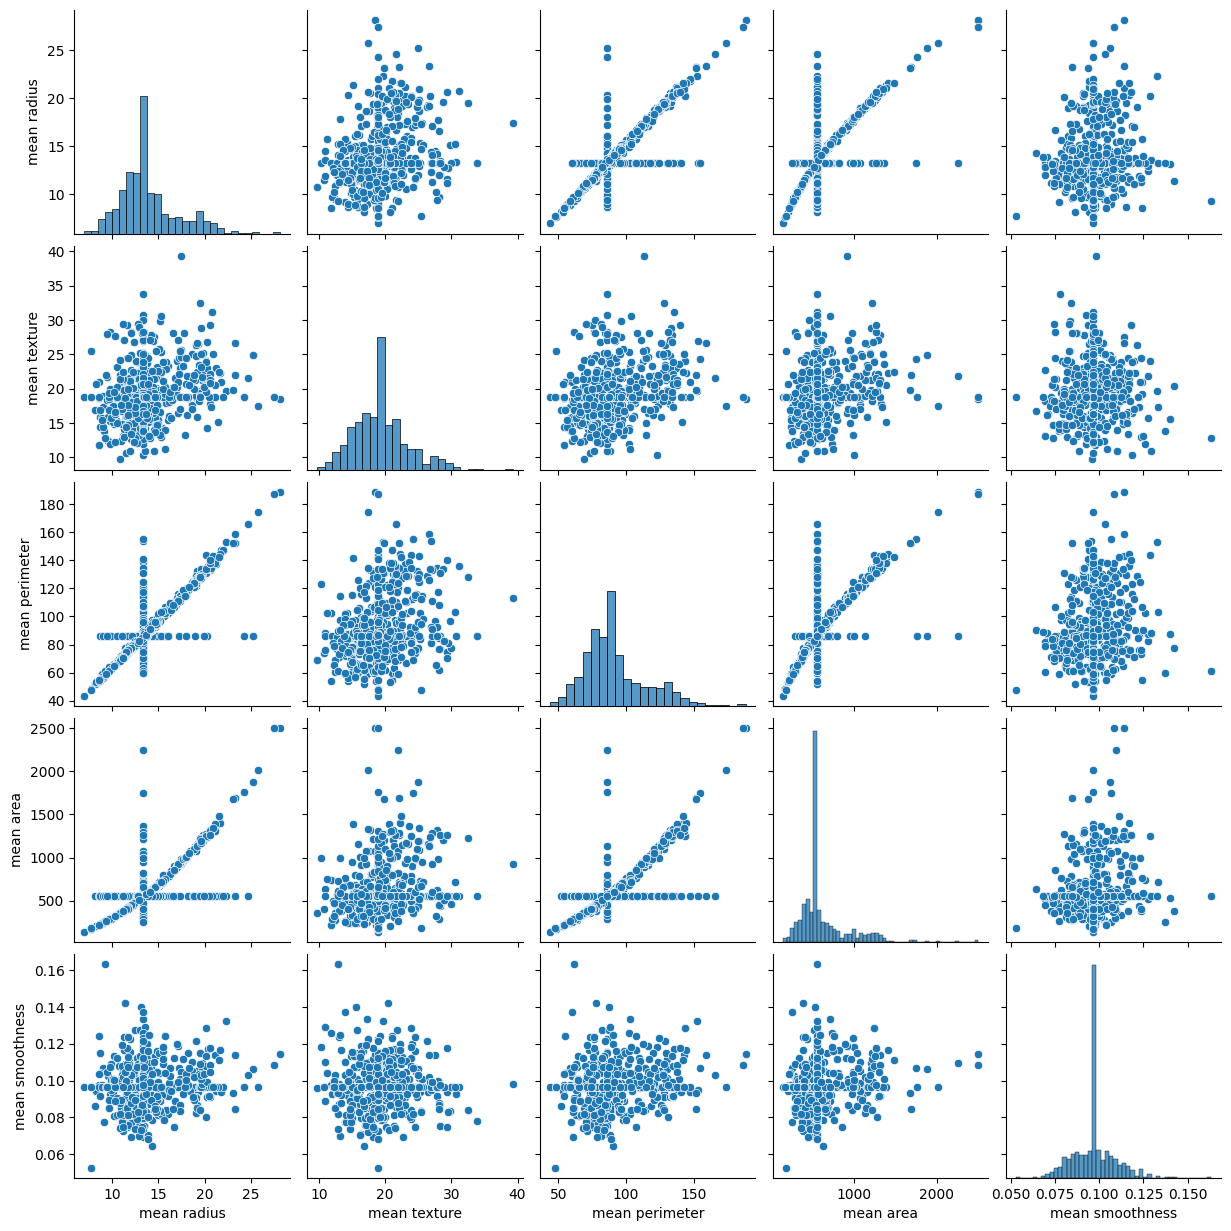

In [122]:
sns.pairplot(dfs_imputed['sample'].iloc[:,0:5])

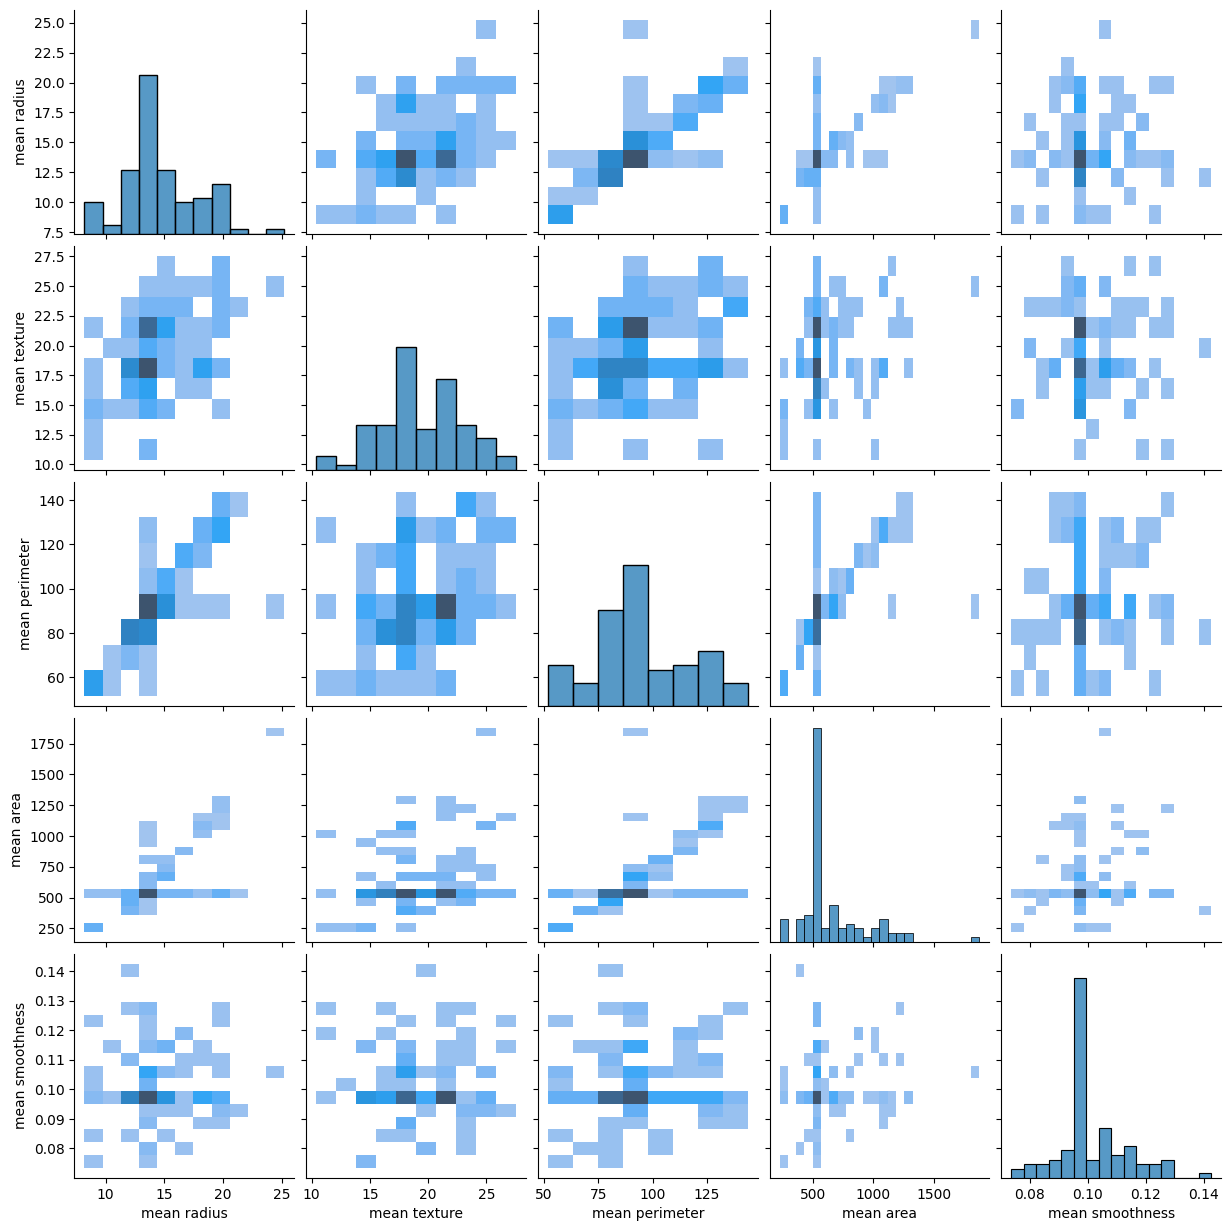

In [123]:
sns.pairplot(dfs_imputed['sample'].iloc[0:100, 0:5], kind='hist')

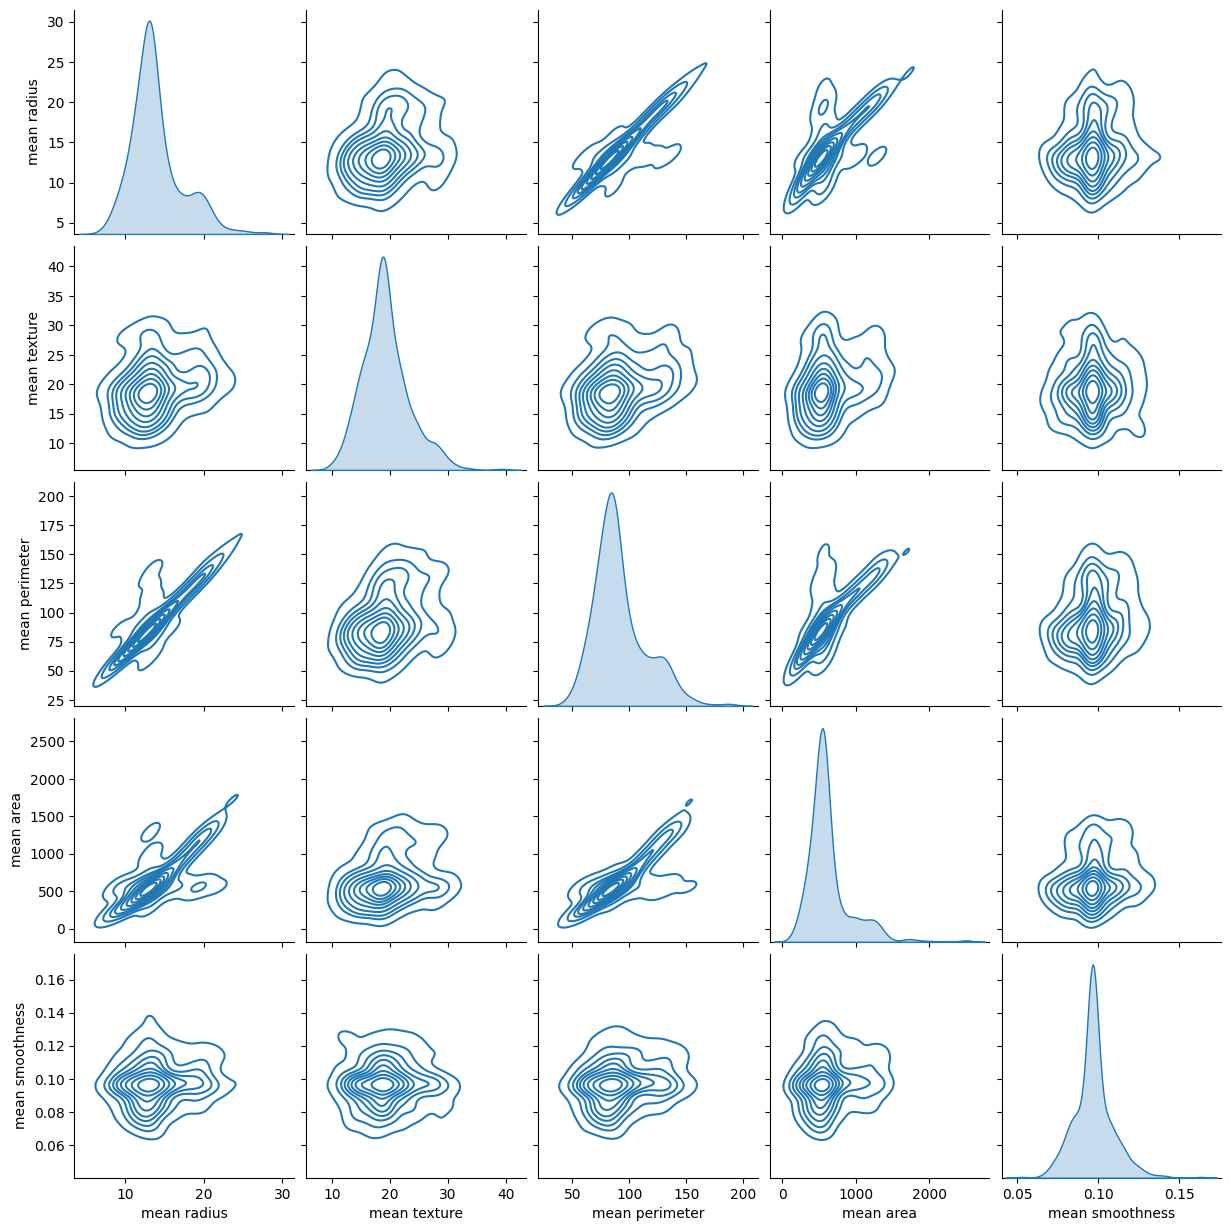

In [124]:
sns.pairplot(dfs_imputed['sample'].iloc[:, 0:5], kind='kde')

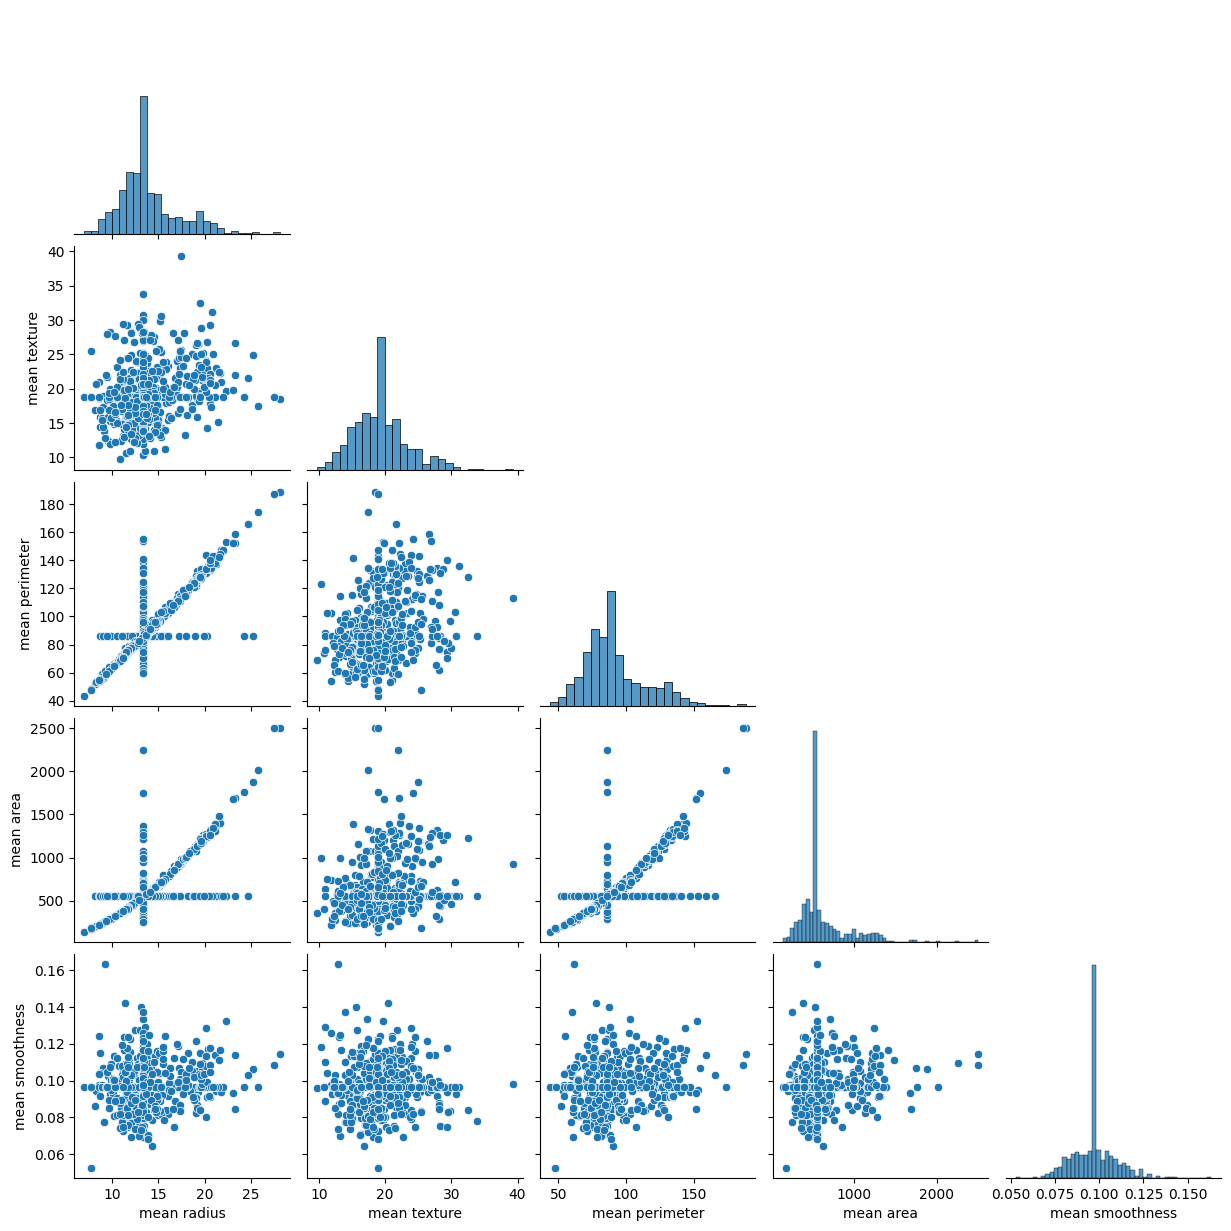

In [125]:
sns.pairplot(dfs_imputed['sample'].iloc[:, 0:5], corner=True)

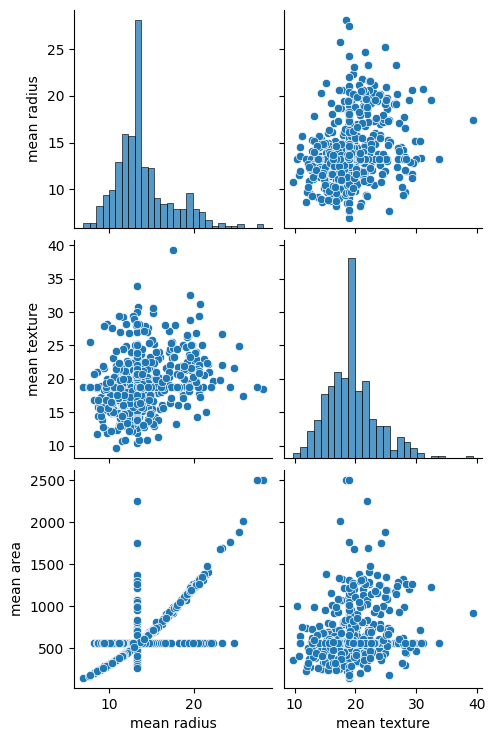

In [127]:
sns.pairplot(
    dfs_imputed['sample'],
    x_vars=['mean radius','mean texture'],
    y_vars=['mean radius','mean texture', 'mean area']
)

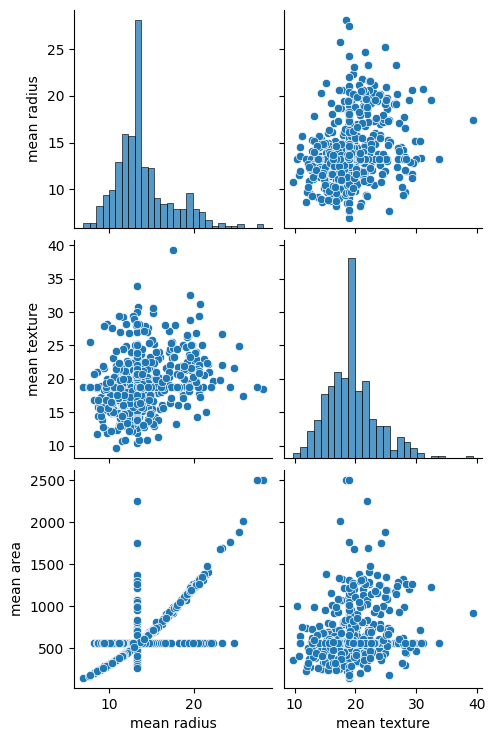

In [128]:
sns.pairplot(
    dfs_imputed['sample'],
    x_vars=['mean radius','mean texture'],
    y_vars=['mean radius','mean texture', 'mean area']
)

# Correlation matrix and histograms

In [129]:
dfs_imputed['sample'].corr(numeric_only=True)

mean radius  mean texture  mean perimeter  mean area  \
mean radius                 1.000000      0.273075        0.871421   0.744918   
mean texture                0.273075      1.000000        0.305546   0.246347   
mean perimeter              0.871421      0.305546        1.000000   0.770736   
mean area                   0.744918      0.246347        0.770736   1.000000   
mean smoothness             0.131356     -0.019655        0.181483   0.164409   
mean compactness            0.450810      0.171614        0.470886   0.403844   
mean concavity              0.568417      0.222431        0.580507   0.553020   
mean concave points         0.549891      0.239891        0.616966   0.564874   
mean symmetry               0.105837      0.039445        0.149849   0.144230   
mean fractal dimension     -0.261293     -0.075068       -0.233397  -0.206648   
radius error                0.565975      0.199796        0.588804   0.648201   
texture error              -0.037158      0.373994       -0.060893  -0.031272   
perimeter error             0.517660      0.190923        0.520183   0.517857   
smoothness error           -0.171054      0.012168       -0.210173  -0.097788   
compactness error           0.189401      0.112022        0.210983   0.176756   
concavity error             0.136039      0.108453        0.139084   0.120610   
concave points error        0.336608      0.106915        0.361754   0.282060   
symmetry error             -0.129356     -0.017398       -0.107097  -0.068320   
fractal dimension error    -0.006513      0.055941       -0.000960   0.006617   
worst radius                0.788933      0.291111        0.830128   0.718378   
worst texture               0.259793      0.724216        0.295087   0.215197   
worst perimeter             0.798573      0.307251        0.810110   0.725992   
worst area                  0.810808      0.309664        0.867912   0.781487   
worst smoothness            0.116402      0.074241        0.124913   0.115949   
worst compactness           0.391374      0.224217        0.418904   0.331515   
worst concavity             0.476856      0.261430        0.520006   0.416819   
worst concave points        0.647983      0.247640        0.683684   0.591005   
worst symmetry              0.129062      0.091001        0.177835   0.119850   
worst fractal dimension     0.007535      0.115462        0.050732   0.003256   
target                     -0.663923     -0.375366       -0.710547  -0.592797   

                         mean smoothness  mean compactness  mean concavity  \
mean radius                     0.131356          0.450810        0.568417   
mean texture                   -0.019655          0.171614        0.222431   
mean perimeter                  0.181483          0.470886        0.580507   
mean area                       0.164409          0.403844        0.553020   
mean smoothness                 1.000000          0.530358        0.407366   
mean compactness                0.530358          1.000000        0.778313   
mean concavity                  0.407366          0.778313        1.000000   
mean concave points             0.375270          0.607280        0.669594   
mean symmetry                   0.419836          0.518045        0.458246   
mean fractal dimension          0.467771          0.484005        0.315005   
radius error                    0.225764          0.394712        0.520333   
texture error                   0.067881          0.114744        0.130073   
perimeter error                 0.194913          0.390191        0.447362   
smoothness error                0.234597          0.137029        0.102947   
compactness error               0.264111          0.599911        0.569171   
concavity error                 0.156810          0.380953        0.473663   
concave points error            0.309858          0.547489        0.583785   
symmetry error                  0.146144          0.191095        0.153258   
fractal dimension error        

In [130]:
dfs_imputed['sample'].corr(method="spearman", numeric_only=True)

mean radius  mean texture  mean perimeter  mean area  \
mean radius                 1.000000      0.297043        0.879150   0.769158   
mean texture                0.297043      1.000000        0.318578   0.275966   
mean perimeter              0.879150      0.318578        1.000000   0.803907   
mean area                   0.769158      0.275966        0.803907   1.000000   
mean smoothness             0.126337      0.036239        0.175967   0.184463   
mean compactness            0.419804      0.219228        0.469685   0.387330   
mean concavity              0.516313      0.276488        0.565212   0.465931   
mean concave points         0.535941      0.258773        0.611304   0.522516   
mean symmetry               0.063694      0.099284        0.124419   0.118778   
mean fractal dimension     -0.284828     -0.049984       -0.258566  -0.225689   
radius error                0.414882      0.283855        0.449067   0.432910   
texture error              -0.078994      0.377570       -0.082527  -0.057280   
perimeter error             0.399581      0.272335        0.418616   0.373419   
smoothness error           -0.289954      0.035129       -0.295065  -0.220907   
compactness error           0.224828      0.207566        0.262379   0.222308   
concavity error             0.247079      0.199853        0.274644   0.248246   
concave points error        0.357425      0.180908        0.396791   0.330846   
symmetry error             -0.244666     -0.022545       -0.224645  -0.171109   
fractal dimension error     0.030449      0.129950        0.046164   0.011843   
worst radius                0.811429      0.313107        0.838393   0.726339   
worst texture               0.270925      0.700324        0.292935   0.217119   
worst perimeter             0.803846      0.325750        0.814186   0.712329   
worst area                  0.860334      0.331538        0.895444   0.778194   
worst smoothness            0.126254      0.095449        0.133159   0.129336   
worst compactness           0.421198      0.230035        0.476982   0.363092   
worst concavity             0.537711      0.301633        0.587423   0.488023   
worst concave points        0.616633      0.282636        0.669535   0.578776   
worst symmetry              0.130300      0.132388        0.167281   0.162866   
worst fractal dimension     0.065585      0.118943        0.112163   0.067427   
target                     -0.669159     -0.424810       -0.714642  -0.620008   

                         mean smoothness  mean compactness  mean concavity  \
mean radius                     0.126337          0.419804        0.516313   
mean texture                    0.036239          0.219228        0.276488   
mean perimeter                  0.175967          0.469685        0.565212   
mean area                       0.184463          0.387330        0.465931   
mean smoothness                 1.000000          0.529754        0.361638   
mean compactness                0.529754          1.000000        0.737497   
mean concavity                  0.361638          0.737497        1.000000   
mean concave points             0.372027          0.625135        0.635816   
mean symmetry                   0.378666          0.440486        0.367044   
mean fractal dimension          0.450048          0.413022        0.234187   
radius error                    0.236968          0.392865        0.438335   
texture error                   0.061136          0.098082        0.090011   
perimeter error                 0.207537          0.408578        0.442981   
smoothness error                0.260808          0.121675        0.068316   
compactness error               0.312717          0.636571        0.566555   
concavity error                 0.232191          0.541036        0.557458   
concave points error            0.346608          0.630795        0.614875   
symmetry error                  0.088974          0.069340        0.038017   
fractal dimension error        

# Heatmap

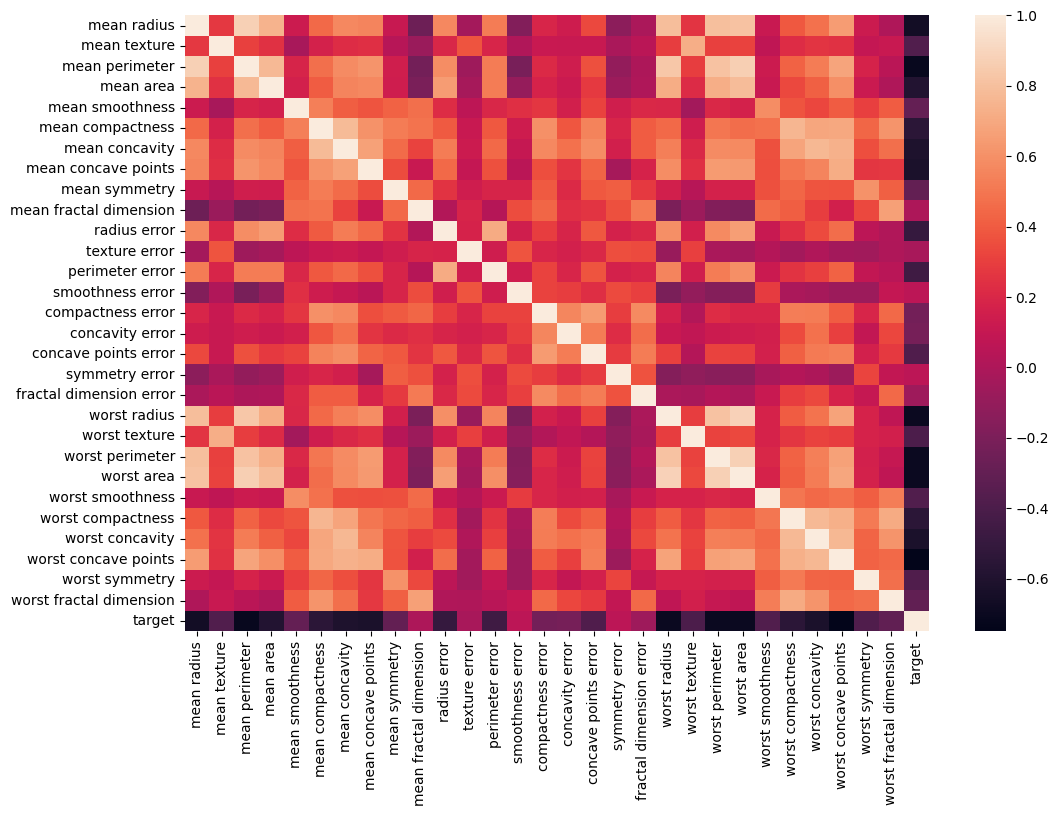

In [131]:
plt.figure(figsize=(12,8))
sns.heatmap(dfs_imputed['sample'].corr(numeric_only=True))
plt.show()

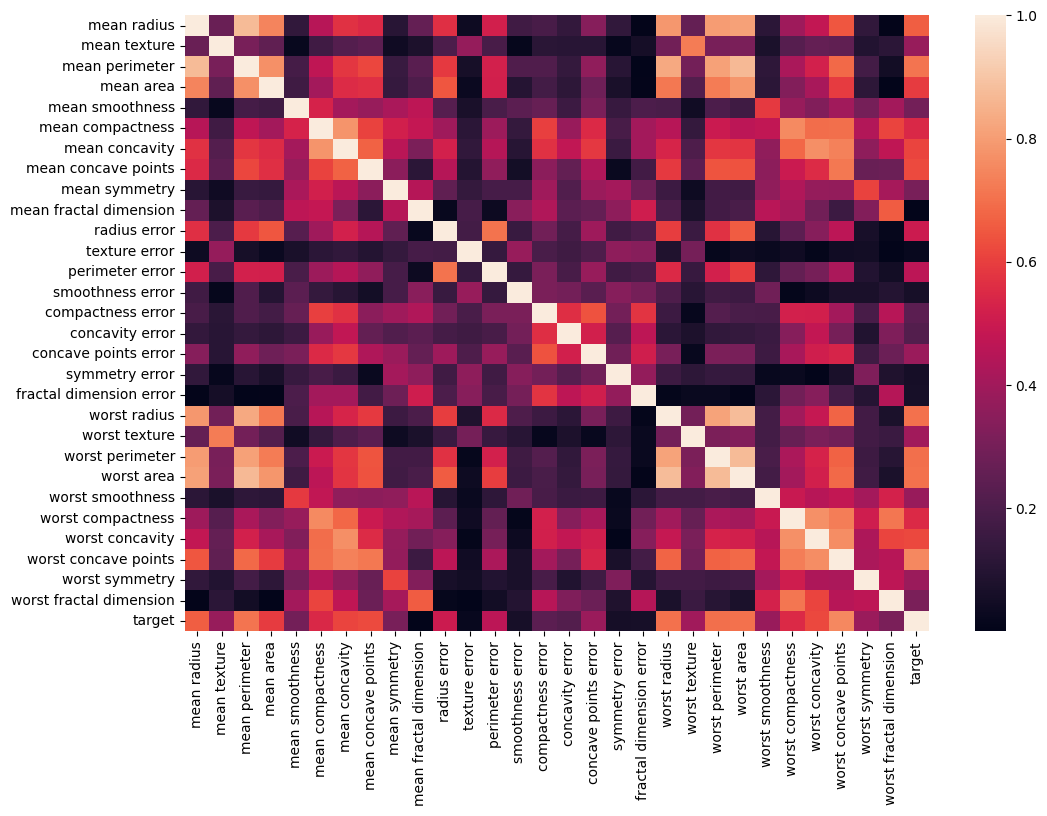

In [132]:
plt.figure(figsize=(12,8))
sns.heatmap(dfs_imputed['sample'].corr(numeric_only=True).abs())
plt.show()

# Stacked histograms

<Axes: xlabel='mean radius', ylabel='Count'>

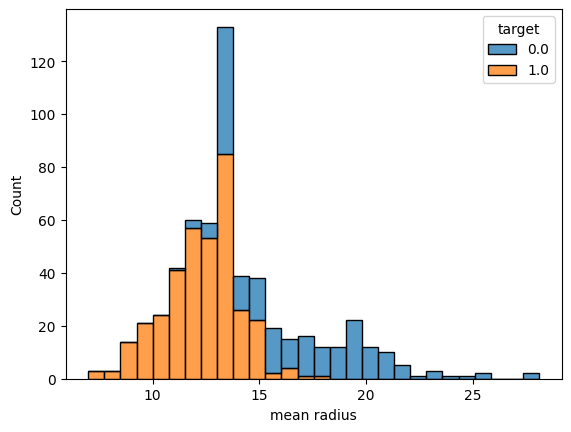

In [133]:
sns.histplot(
    dfs_imputed['sample'],
    x="mean radius",
    hue="target",
    multiple="stack"
)

<Axes: xlabel='worst concavity', ylabel='Count'>

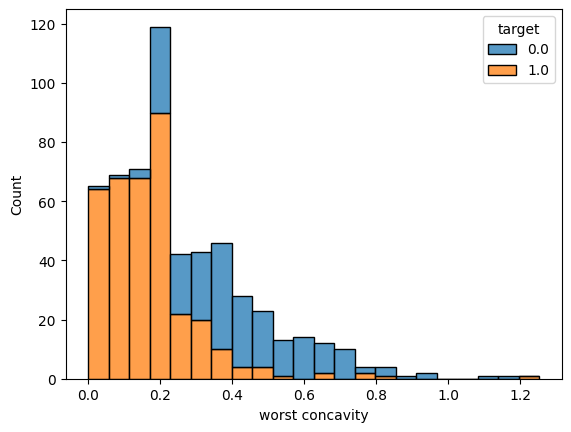

In [134]:
sns.histplot(
    dfs_imputed['sample'],
    x="worst concavity",
    hue="target",
    multiple="stack"
)

In [137]:
columns  = dfs_imputed['sample'].select_dtypes(exclude='object').drop('target', axis=1).columns

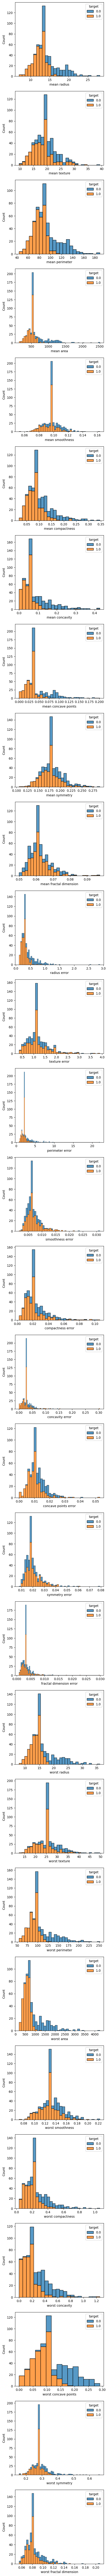

In [139]:
fig, axs = plt.subplots(len(columns), 1, figsize=(5, 5*len(columns)))

for i in range(len(columns)):
    column_name = columns[i]
    sns.histplot(
        dfs_imputed['sample'],
        x=column_name,
        hue='target',
        multiple='stack',
        ax= axs[i]
    )